In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
# Read in weekly financial data
data = pd.read_csv('15_years_US_S&P500_with_metrics.csv', index_col = False)


In [3]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows',200)
data.tail(1)

Date Symbol        Name      Sector  \
371760  2019-07-08    ZTS  Zoetis Inc  Healthcare   

                                        Industry  Adjusted_close     Volume  \
371760  Drug Manufacturers - Specialty & Generic        114.1891  7341000.0   

        accountsPayable  accumulatedAmortization  accumulatedDepreciation  \
371760      235000000.0                      NaN                      NaN   

        accumulatedOtherComprehensiveIncome  additionalPaidInCapital  \
371760                         -619000000.0             1.010000e+09   

        capitalLeaseObligations  capitalSurpluse          cash  \
371760                      NaN              NaN  1.728000e+09   

        cashAndShortTermInvestments  commonStock  commonStockTotalEquity  \
371760                          NaN    5000000.0               5000000.0   

        deferredLongTermAssetCharges  deferredLongTermLiab      goodWill  \
371760                           NaN                   NaN  2.522000e+09   

        intangibleAssets     inventory  liabilitiesAndStockholdersEquity  \
371760      1.989000e+09  1.361000e+09                               NaN   

        longTermDebt  longTermDebtTotal  longTermInvestments  \
371760  6.578000e+09                NaN            2000000.0   

        negativeGoodwill  netReceivables  netTangibleAssets  \
371760               NaN     970000000.0      -2.194000e+09   

        nonCurrentAssetsTotal  nonCurrentLiabilitiesOther  \
371760                    NaN                         NaN   

        nonCurrentLiabilitiesTotal  nonCurrrentAssetsOther  \
371760                         NaN                     NaN   

        noncontrollingInterestInConsolidatedEntity  otherAssets  \
371760                                         NaN  152000000.0   

        otherCurrentAssets  otherCurrentLiab    otherLiab  \
371760         248000000.0       179000000.0  906000000.0   

        otherStockholderEquity  preferredStockRedeemable  \
371760            -598000000.0                       NaN   

        preferredStockTotalEquity  propertyPlantAndEquipmentGross  \
371760                        NaN                             NaN   

        propertyPlantEquipment  retainedEarnings  retainedEarningsTotalEquity  \
371760            1.841000e+09      3.495000e+09                 3.067000e+09   

        shortLongTermDebt  shortTermDebt  shortTermInvestments  \
371760         33000000.0            NaN            65000000.0   

        temporaryEquityRedeemableNoncontrollingInterests   totalAssets  \
371760                                               NaN  1.088300e+10   

        totalCurrentAssets  totalCurrentLiabilities     totalLiab  \
371760        4.379000e+09             1.082000e+09  8.566000e+09   

        totalPermanentEquity  totalStockholderEquity  treasuryStock  warrants  \
371760          2.118000e+09            2.317000e+09   1.345000e+09       NaN   

        sharesMln  capitalExpenditures  cashAndCashEquivalentsChanges  \
371760      483.0           63000000.0                            NaN   

        cashFlowsOtherOperating  changeInCash  changeReceivables  \
371760                      NaN   126000000.0                NaN   

        changeToAccountReceivables  changeToInventory  changeToLiabilities  \
371760                  75000000.0         17000000.0          -79000000.0   

        changeToNetincome  changeToOperatingActivities  depreciation  \
371760         18000000.0                  -52000000.0    98000000.0   

        dividendsPaid  exchangeRateChanges  investments  netBorrowings  \
371760    -79000000.0                  NaN   36000000.0     -9000000.0   

        otherCashflowsFromFinancingActivities  \
371760                             -8000000.0   

        otherCashflowsFromInvestingActivities  salePurchaseOfStock  \
371760                              4000000.0                  0.0   

        totalCashFromFinancingActivities  totalCashFromOperatingActivities  \
371760                      -24300

## Data cleaning

In [4]:
print(data.shape)
print(data.size)

(371761, 124)
46098364


In [5]:
#Checking columns with the highest pecentages of missing values
null_list = data.isnull().sum() / len(data) 
null_list[null_list > 0.9]

accumulatedAmortization              1.000000
accumulatedDepreciation              1.000000
capitalLeaseObligations              1.000000
capitalSurpluse                      0.997894
cashAndShortTermInvestments          0.993681
deferredLongTermAssetCharges         1.000000
liabilitiesAndStockholdersEquity     0.993681
longTermDebtTotal                    0.993681
negativeGoodwill                     1.000000
nonCurrentAssetsTotal                0.993681
nonCurrentLiabilitiesOther           0.993681
nonCurrentLiabilitiesTotal           0.993681
nonCurrrentAssetsOther               0.993681
preferredStockRedeemable             1.000000
propertyPlantAndEquipmentGross       1.000000
shortTermDebt                        0.993681
warrants                             1.000000
cashAndCashEquivalentsChanges        0.991591
cashFlowsOtherOperating              0.991591
changeReceivables                    0.995804
exchangeRateChanges                  0.993698
nonOperatingIncomeNetOther        

In [6]:
#Converting everything from 'Adjusted_Close' to float type
data.iloc[:,5:124] = data.iloc[:,5:124].apply(pd.to_numeric)
#Certain rows has inf value, therefore replacing with nan
data = data.replace([np.inf, -np.inf], np.nan)
#replacing all 0s with nan
data.replace(0, value=np.nan, inplace=True)


In [8]:
#Taking the natural log of the whole data set
data = data.iloc[:,0:5].join(np.log(data.iloc[:,5:114]))

C:\Users\zliu2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [ ]:
data = data.dropna(axis=1, how='all')

In [11]:
data.shape

(371761, 113)

## Metric Histogram Visualization

#### Automating the histogram per Metric

In [12]:
#Defining a graph function that generates six histogram plots 
def graph(nlist):
    figs={}
    axs={}
    for idx,plot in enumerate(nlist):
        figs[idx]=plt.figure(figsize=(13,11))
        
        axs[idx]=figs[idx].add_subplot(231)
        axs[idx].hist(data.iloc[:,plot][pd.notnull(data.iloc[:,plot])], bins = 20, facecolor='blue')
        plt.xlabel(data.columns.values[plot])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(232)
        axs[idx].hist(data.iloc[:,plot+1][pd.notnull(data.iloc[:,plot+1])], bins = 20, facecolor='orange')
        plt.xlabel(data.columns.values[plot+1])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(233)
        axs[idx].hist(data.iloc[:,plot+2][pd.notnull(data.iloc[:,plot+2])], bins = 20, facecolor='green')
        plt.xlabel(data.columns.values[plot+2])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(234)
        axs[idx].hist(data.iloc[:,plot+3][pd.notnull(data.iloc[:,plot+3])], bins = 20, facecolor='red')
        plt.xlabel(data.columns.values[plot+3])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(235)
        axs[idx].hist(data.iloc[:,plot+4][pd.notnull(data.iloc[:,plot+4])], bins = 20, facecolor='purple')
        plt.xlabel(data.columns.values[plot+4])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(236)
        axs[idx].hist(data.iloc[:,plot+5][pd.notnull(data.iloc[:,plot+5])], bins = 50, facecolor='brown')
        plt.xlabel(data.columns.values[plot+5])
        plt.ylabel('Frequency')

        plt.suptitle("S&P 500 Stock Feature Histograms")

    return figs,axs

In [13]:
np.arange(5,113,6) # a set of indexes gapped by 6, just to see which points we should enter. 101 is not included in here

array([  5,  11,  17,  23,  29,  35,  41,  47,  53,  59,  65,  71,  77,
        83,  89,  95, 101, 107])

({0: <Figure size 936x792 with 6 Axes>,
  1: <Figure size 936x792 with 6 Axes>,
  2: <Figure size 936x792 with 6 Axes>,
  3: <Figure size 936x792 with 6 Axes>,
  4: <Figure size 936x792 with 6 Axes>,
  5: <Figure size 936x792 with 6 Axes>,
  6: <Figure size 936x792 with 6 Axes>,
  7: <Figure size 936x792 with 6 Axes>,
  8: <Figure size 936x792 with 6 Axes>,
  9: <Figure size 936x792 with 6 Axes>,
  10: <Figure size 936x792 with 6 Axes>,
  11: <Figure size 936x792 with 6 Axes>,
  12: <Figure size 936x792 with 6 Axes>,
  13: <Figure size 936x792 with 6 Axes>,
  14: <Figure size 936x792 with 6 Axes>,
  15: <Figure size 936x792 with 6 Axes>,
  16: <Figure size 936x792 with 6 Axes>,
  17: <Figure size 936x792 with 6 Axes>},
 {0: <matplotlib.axes._subplots.AxesSubplot at 0x21405dfbb00>,
  1: <matplotlib.axes._subplots.AxesSubplot at 0x214060045c0>,
  2: <matplotlib.axes._subplots.AxesSubplot at 0x214065ea080>,
  3: <matplotlib.axes._subplots.AxesSubplot at 0x2140680eb00>,
  4: <matplotlib.ax

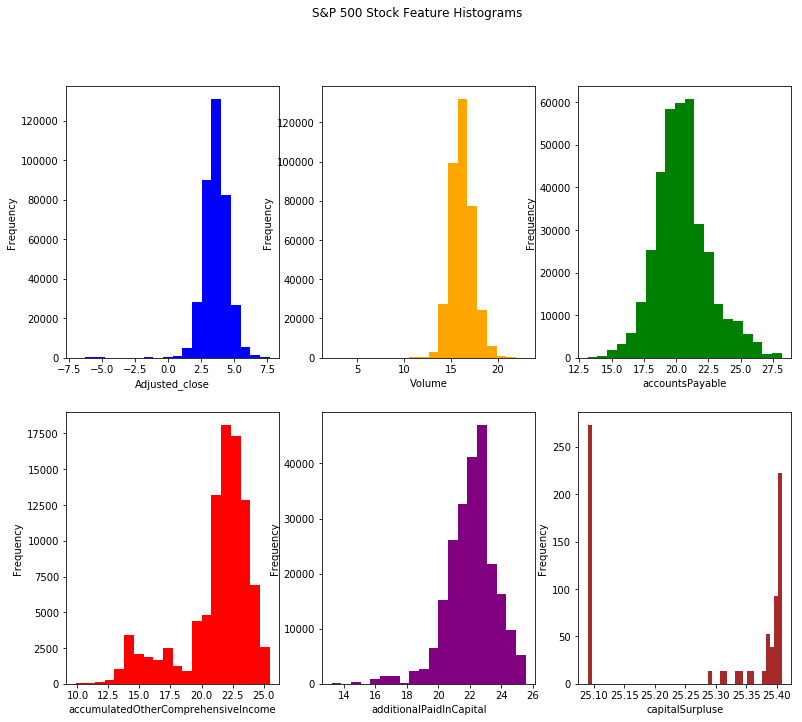

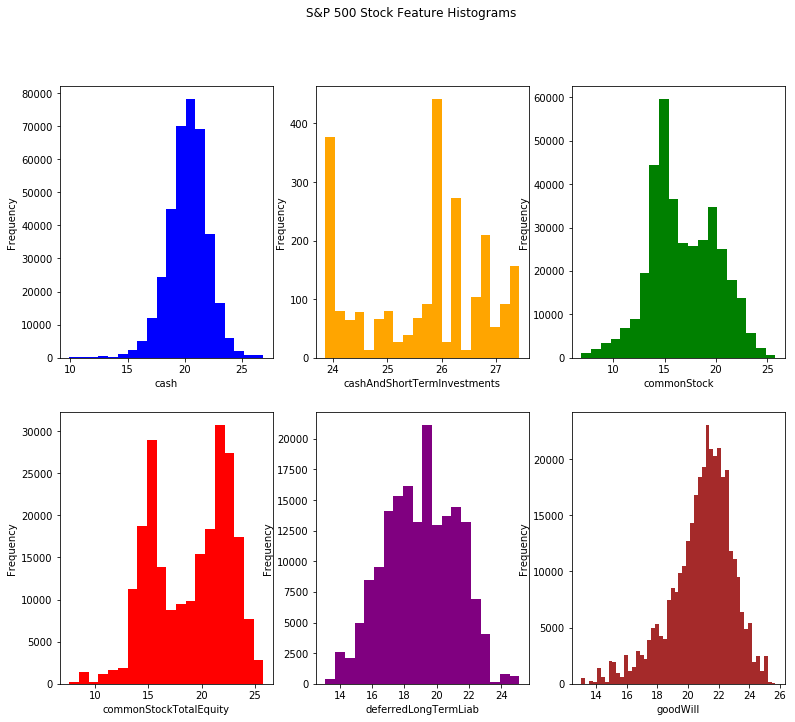

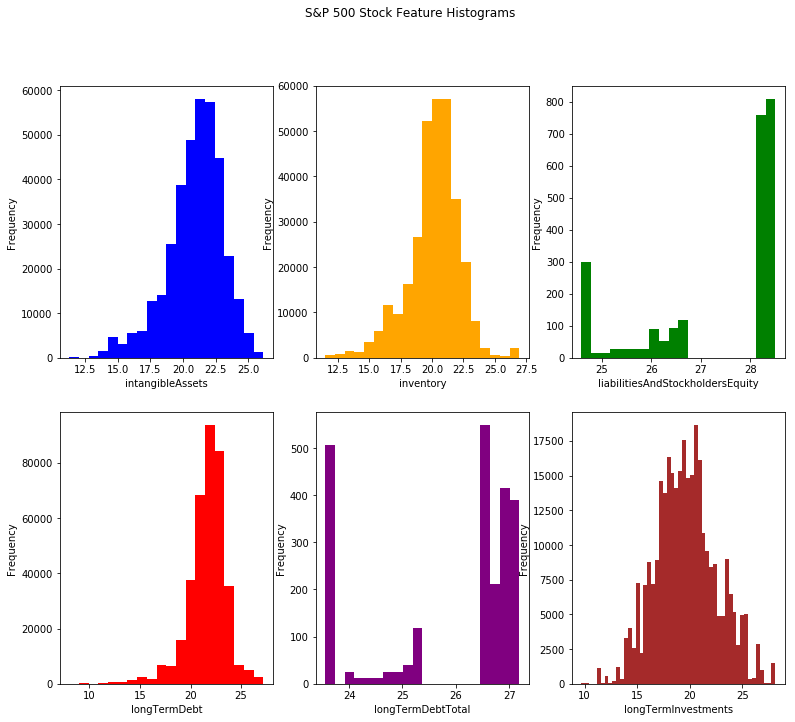

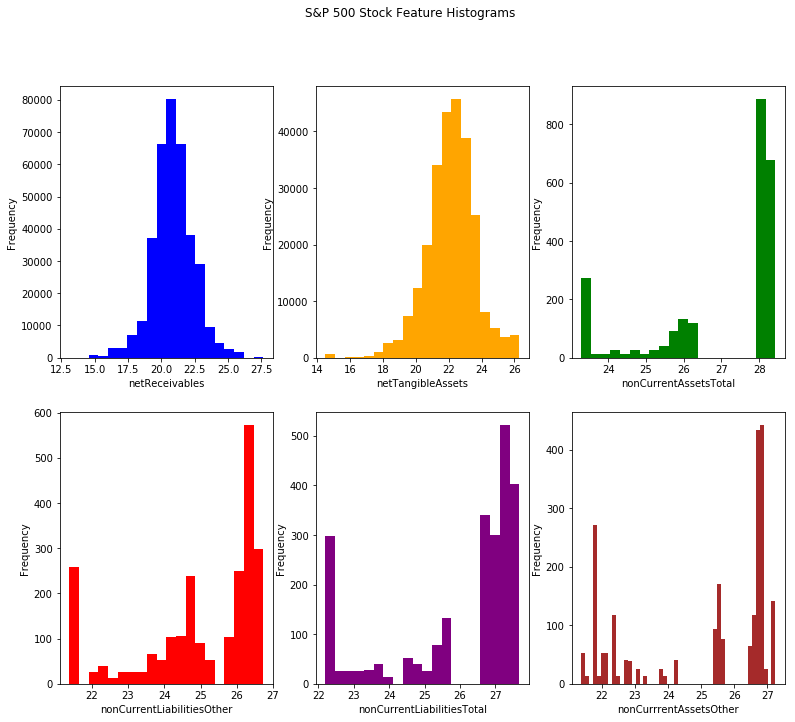

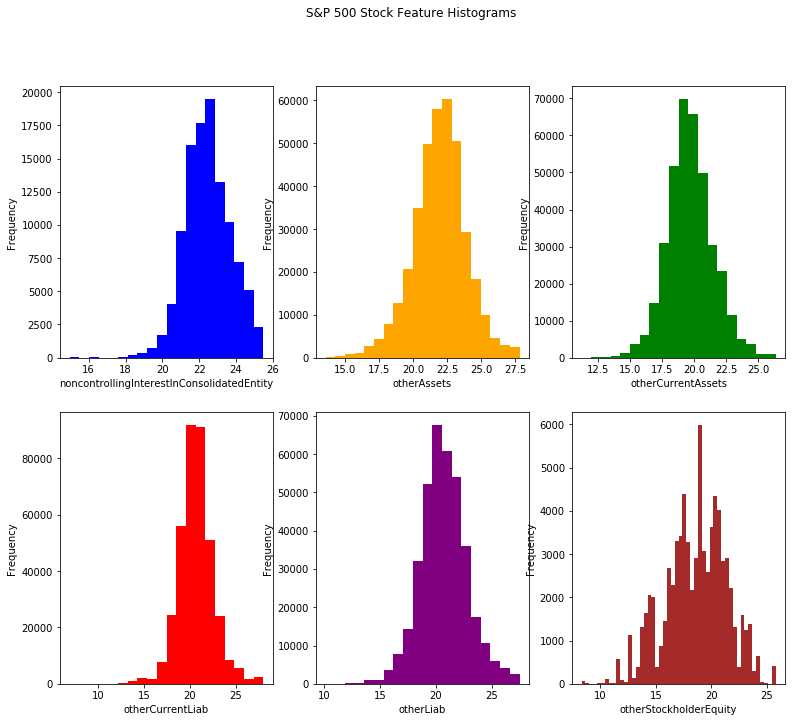

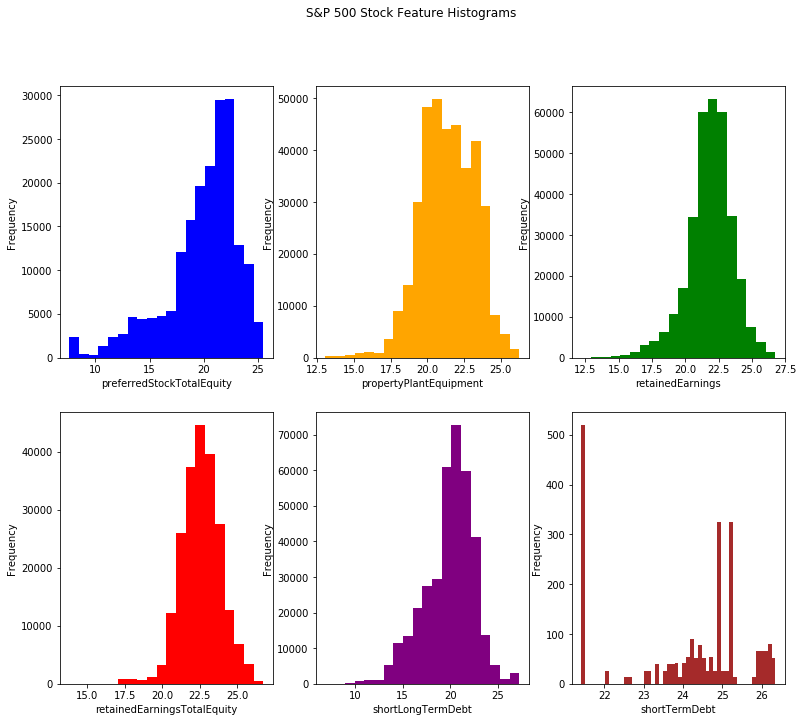

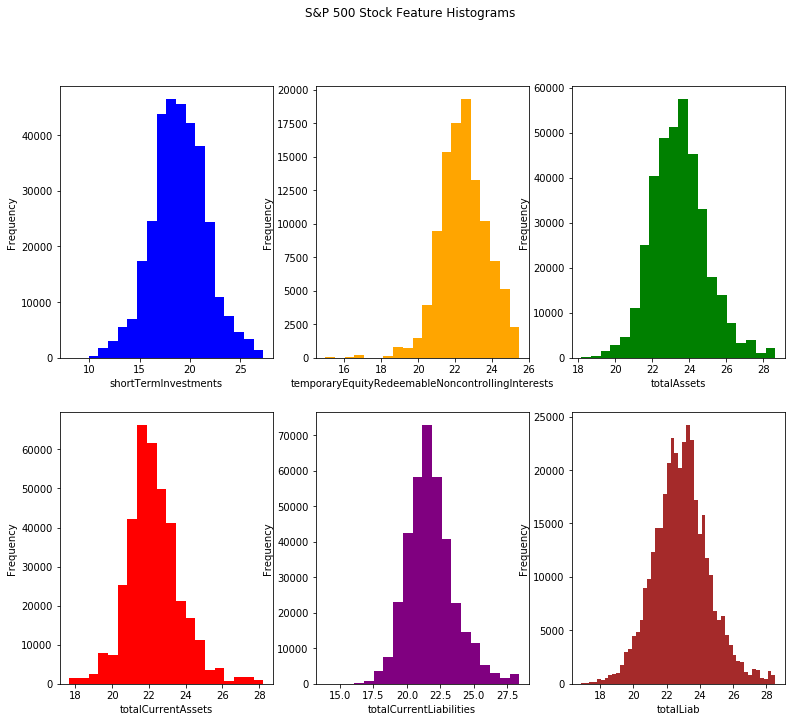

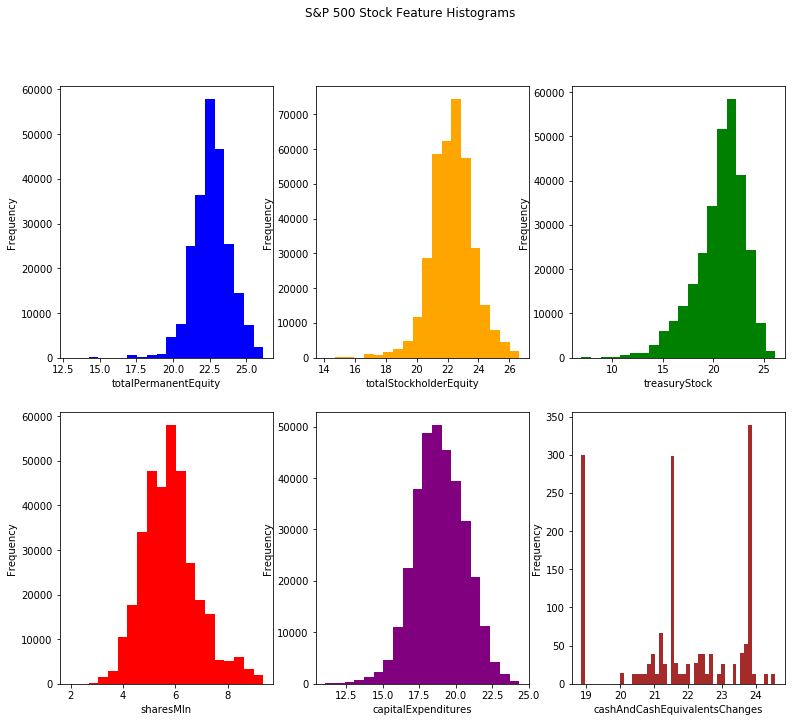

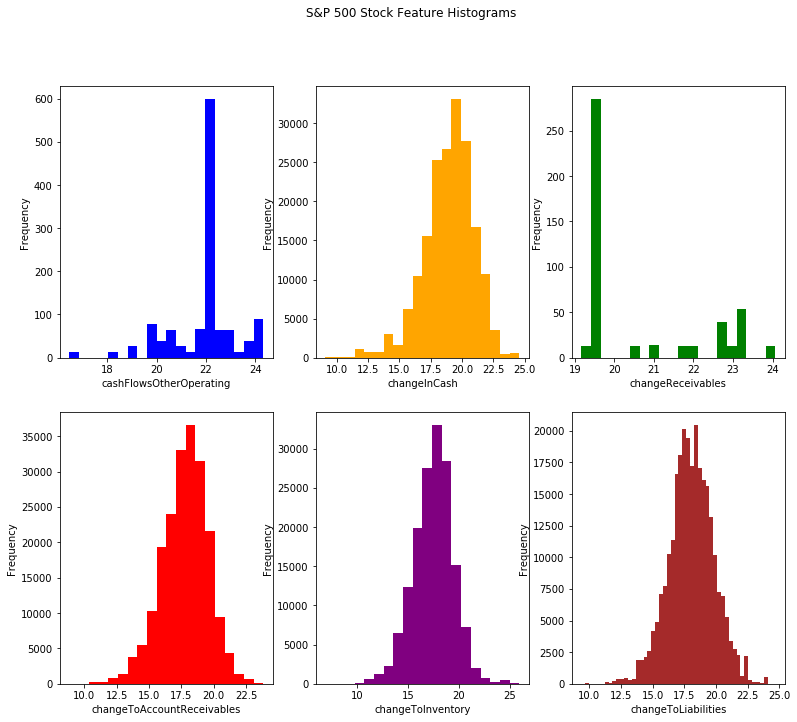

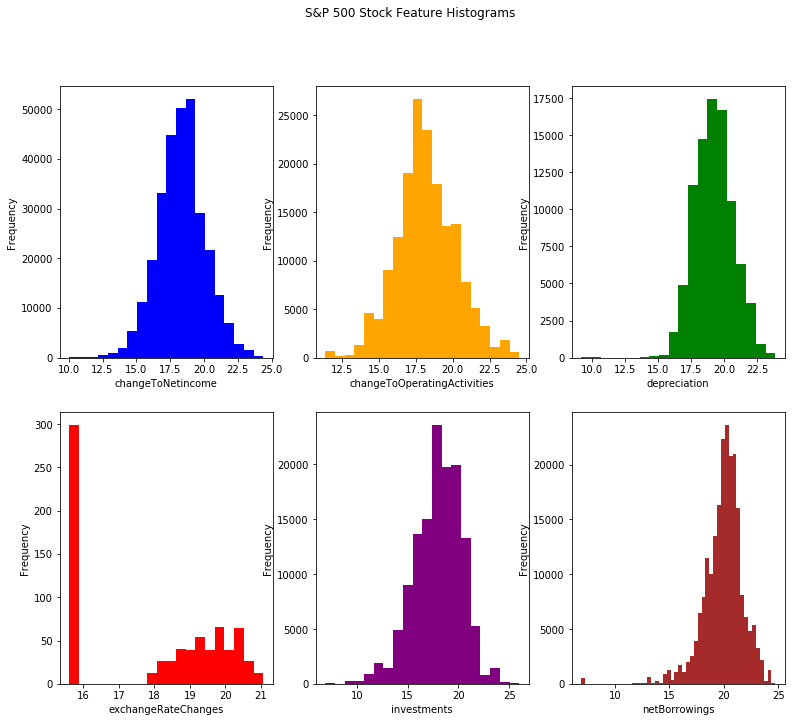

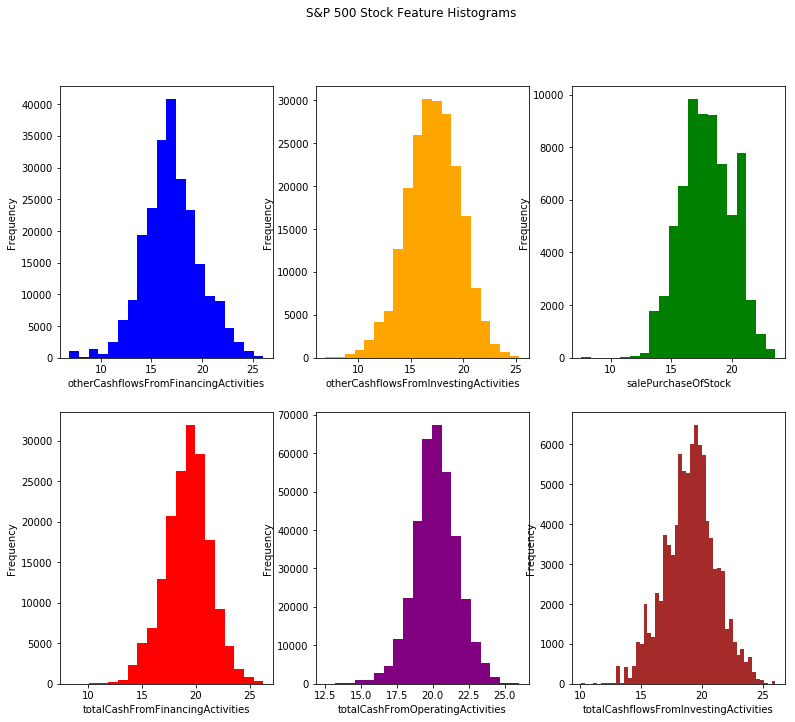

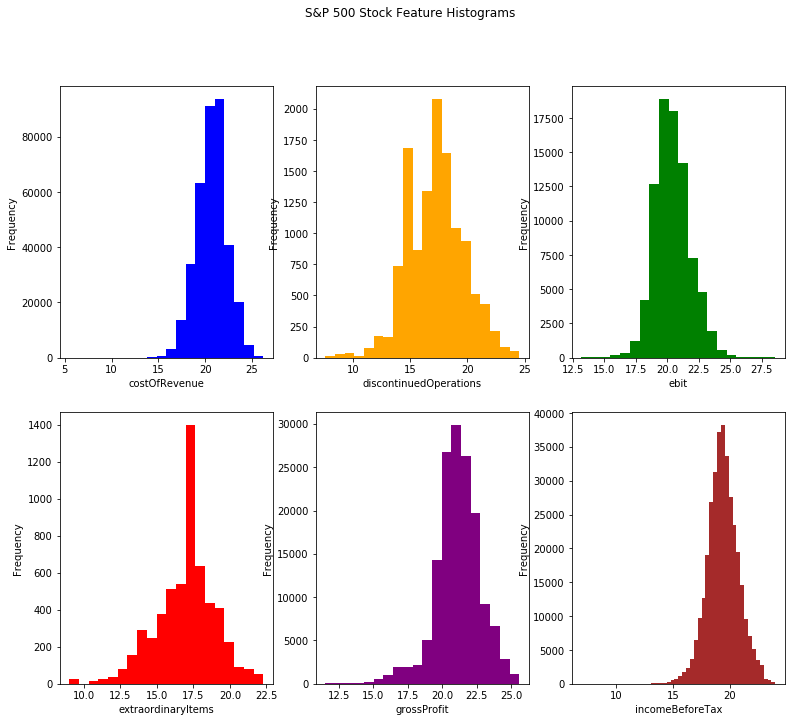

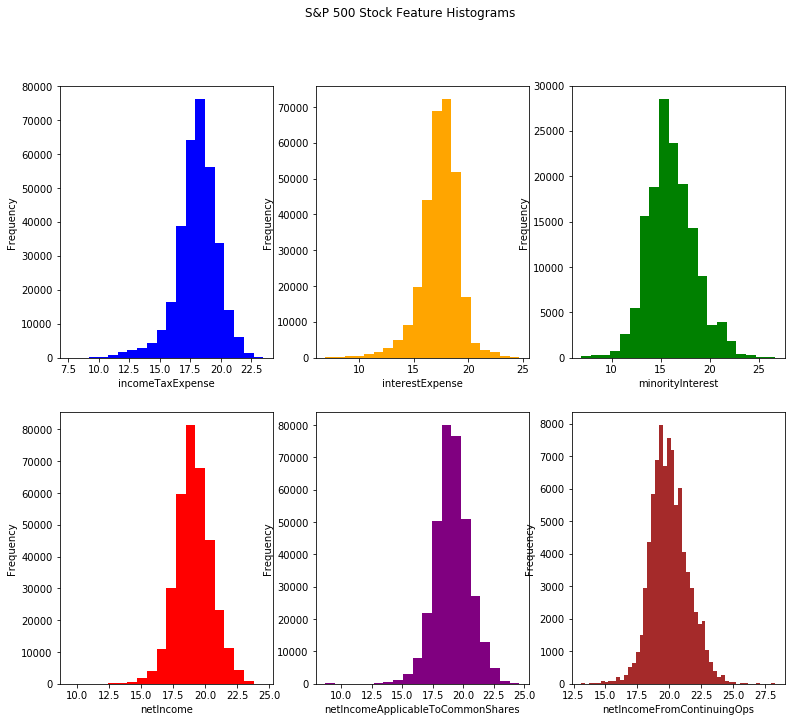

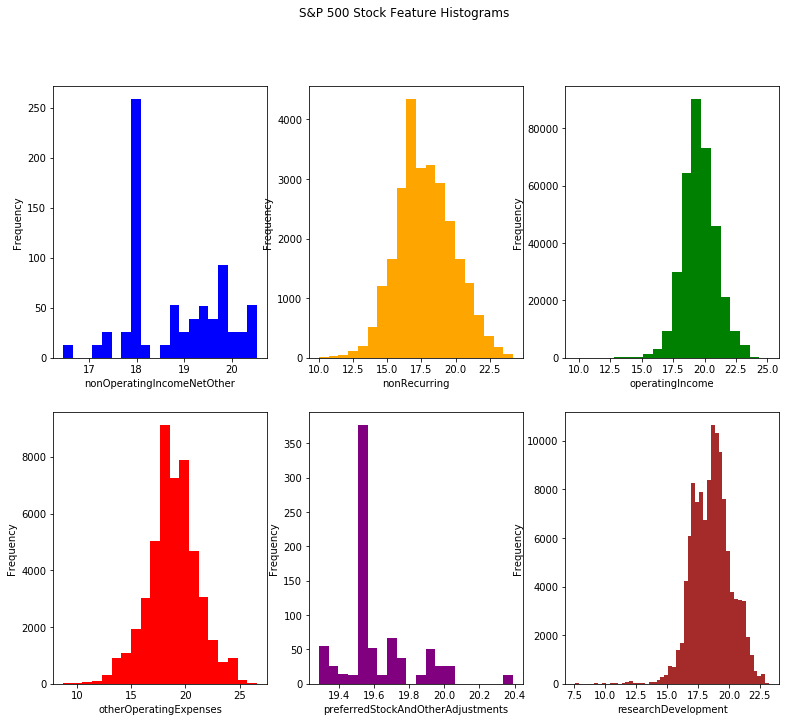

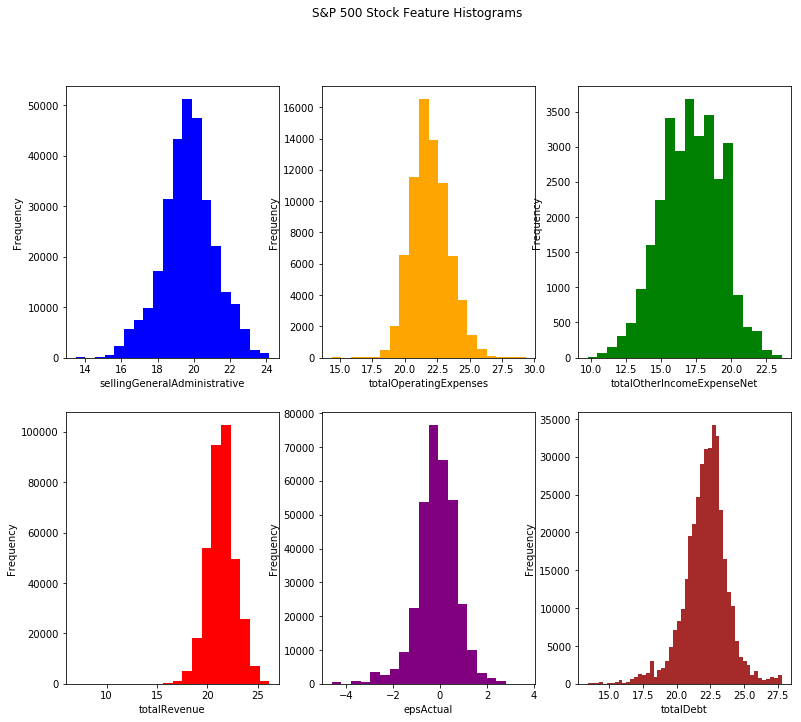

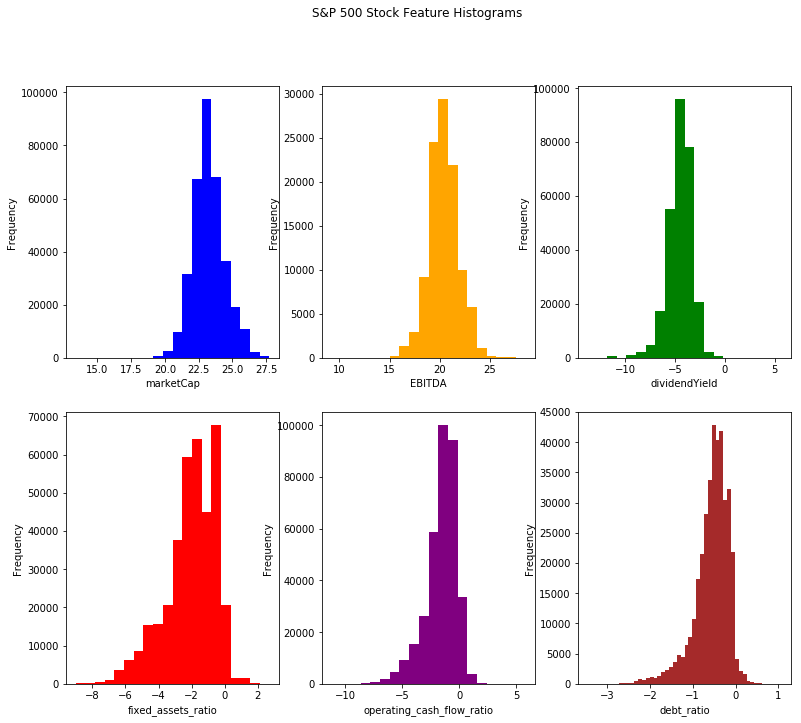

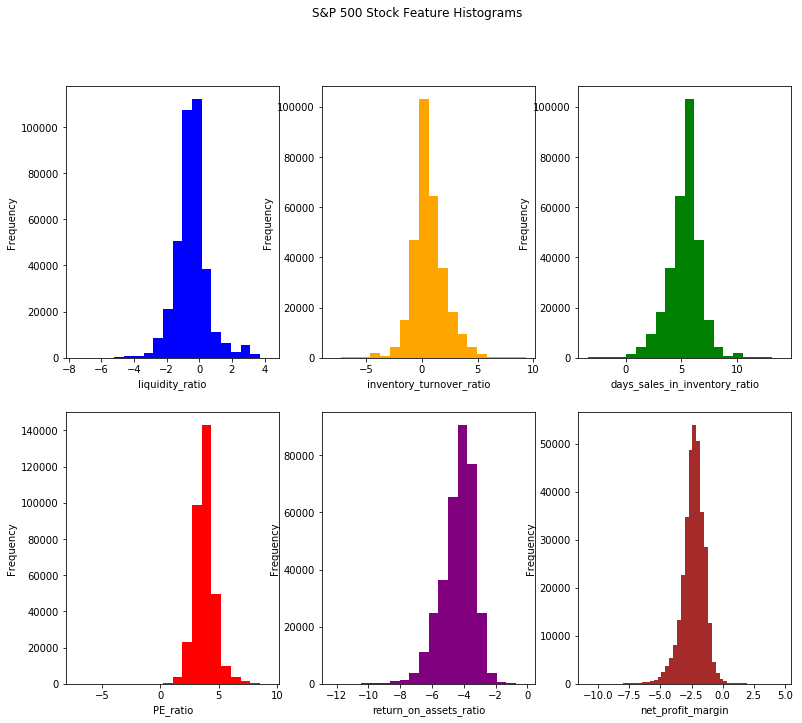

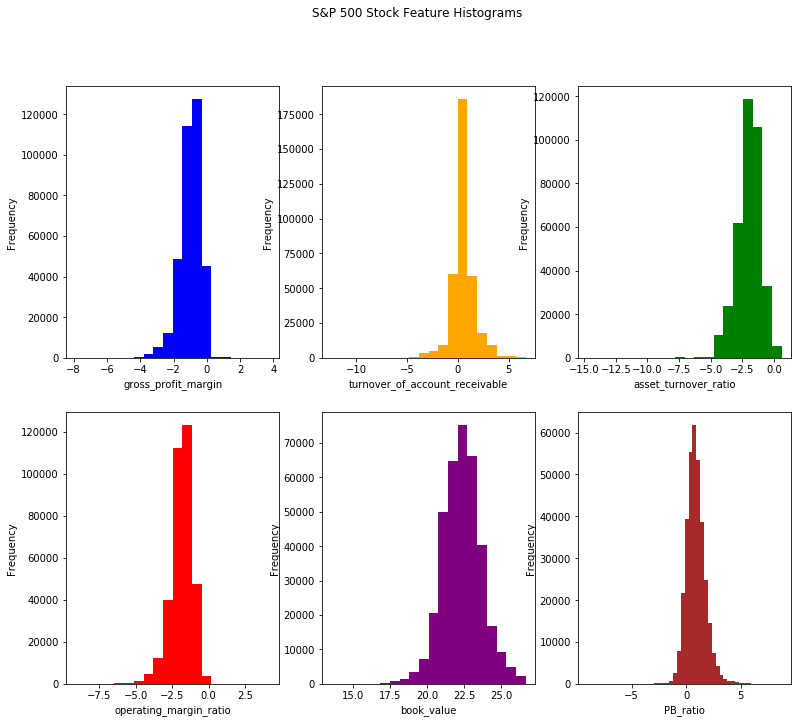

In [14]:
# Generate a list with the corresponding location of the plot
graph(np.arange(5,108,6))

## Sector-wise Histogram Visualization

#### Defining the Sectors

In [15]:
#Checking unique sectors 
data.groupby('Sector')['Symbol'].nunique() 

Sector
Basic Materials           17
Communication Services     7
Consumer Cyclical         78
Consumer Defensive        36
Energy                    29
Financial Services        70
Healthcare                58
Industrials               69
Other                     24
Real Estate               31
Technology                59
Utilities                 27
Name: Symbol, dtype: int64

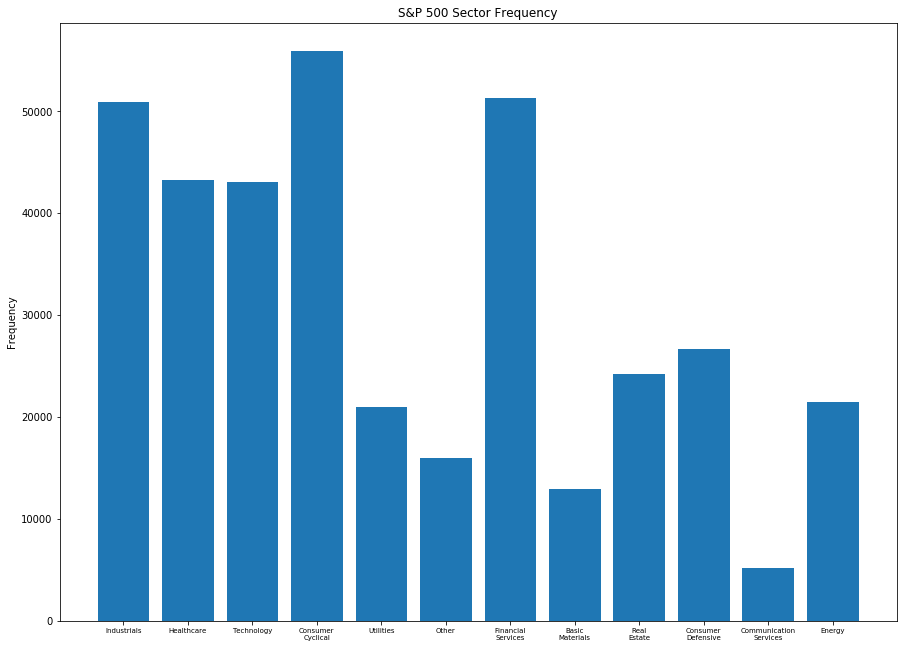

In [16]:
# Create a dictionary of how often a sector appears
sector_freq = {}
for i in range(len(data)):
    sector = data.iloc[i].loc['Sector']
    if sector in list(sector_freq.keys()):
        sector_freq[sector] += 1
    else:
        sector_freq[sector] = 1
        
# Plot frequencies of sectors
x = list(sector_freq.keys())
y = list(sector_freq.values())
for i in range(len(x)):
    x[i] = x[i].replace(' ','\n')
plt.figure(3,figsize=(15,11))
plt.rc('xtick', labelsize = 7)
plt.bar(x, y)
plt.ylabel('Frequency')
plt.title('S&P 500 Sector Frequency')

# Separate data by sector
data_Materials = data[data.loc[:,'Sector']=='Basic Materials'].dropna(how='all')
data_Real_Estate = data[data.loc[:,'Sector']=='Real Estate'].dropna(how='all')
data_Utilities = data[data.loc[:,'Sector']=='Utilities'].dropna(how='all')
data_Telecom = data[data.loc[:,'Sector']=='Communication Services'].dropna(how='all')
data_Cyclical = data[data.loc[:,'Sector']=='Consumer Cyclical'].dropna(how='all')
data_Industrials = data[data.loc[:,'Sector']=='Industrials'].dropna(how='all')
data_Tech = data[data.loc[:,'Sector']=='Technology'].dropna(how='all')
data_Health_Care = data[data.loc[:,'Sector']=='Healthcare'].dropna(how='all')
data_Energy = data[data.loc[:,'Sector']=='Energy'].dropna(how='all')
data_Defensive = data[data.loc[:,'Sector']=='Consumer Defensive'].dropna(how='all')
data_Financials = data[data.loc[:,'Sector']=='Financial Services'].dropna(how='all')
data_Other = data[data.loc[:,'Sector']=='Other'].dropna(how='all')

# Plot feature histogram by sector
colors = ['cyan', 'magenta', 'royalblue', 'darksalmon', 'green', 'blue', 'orange', 'red', 'purple', 'brown', 'grey','yellow']
labels = ['Basic Materials', 'Real Estate','Utilities', 'Communication Services', 'Consumer Cyclical', 'Industrials', 
          'Technology', 'Healthcare', 'Energy','Consumer Defensive',  'Financial Services', 'Other']

def organize_feature_by_sector(feature):
    feature_by_sector = [data_Materials[feature][pd.notnull(data_Materials[feature])], 
        data_Real_Estate[feature][pd.notnull(data_Real_Estate[feature])], 
        data_Cyclical[feature][pd.notnull(data_Cyclical[feature])], 
        data_Industrials[feature][pd.notnull(data_Industrials[feature])],
        data_Tech[feature][pd.notnull(data_Tech[feature])],
        data_Health_Care[feature][pd.notnull(data_Health_Care[feature])],
        data_Energy[feature][pd.notnull(data_Energy[feature])],
        data_Defensive[feature][pd.notnull(data_Defensive[feature])],
        data_Financials[feature][pd.notnull(data_Financials[feature])],
        data_Utilities[feature][pd.notnull(data_Utilities[feature])],
        data_Telecom[feature][pd.notnull(data_Telecom[feature])],
        data_Other[feature][pd.notnull(data_Other[feature])]]

    return feature_by_sector

#### Automating the sector-wise plotting 

In [18]:
#Defining a graph function that generates stacked sector-wise histogram
def s_graph(nlist):
    figs={}
    axs={}
    for idx,plot in enumerate(nlist):
        figs[idx]=plt.figure(figsize=(13,12))
        axs[idx]=figs[idx].add_subplot(111)
        axs[idx].hist(organize_feature_by_sector(data.columns.values[plot]), bins = 30, 
                      histtype = 'bar', stacked = True, color = colors, label = labels)
        plt.title(data.columns.values[plot] + ' ' + 'Histogram by Sector')
        plt.xlabel(data.columns.values[plot])
        plt.ylabel('Frequency')
        plt.legend(loc = 'upper right')

    return figs, axs


C:\Users\zliu2\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


({0: <Figure size 936x864 with 1 Axes>,
  1: <Figure size 936x864 with 1 Axes>,
  2: <Figure size 936x864 with 1 Axes>,
  3: <Figure size 936x864 with 1 Axes>,
  4: <Figure size 936x864 with 1 Axes>,
  5: <Figure size 936x864 with 1 Axes>,
  6: <Figure size 936x864 with 1 Axes>,
  7: <Figure size 936x864 with 1 Axes>,
  8: <Figure size 936x864 with 1 Axes>,
  9: <Figure size 936x864 with 1 Axes>,
  10: <Figure size 936x864 with 1 Axes>,
  11: <Figure size 936x864 with 1 Axes>,
  12: <Figure size 936x864 with 1 Axes>,
  13: <Figure size 936x864 with 1 Axes>,
  14: <Figure size 936x864 with 1 Axes>,
  15: <Figure size 936x864 with 1 Axes>,
  16: <Figure size 936x864 with 1 Axes>,
  17: <Figure size 936x864 with 1 Axes>,
  18: <Figure size 936x864 with 1 Axes>,
  19: <Figure size 936x864 with 1 Axes>,
  20: <Figure size 936x864 with 1 Axes>,
  21: <Figure size 936x864 with 1 Axes>,
  22: <Figure size 936x864 with 1 Axes>,
  23: <Figure size 936x864 with 1 Axes>,
  24: <Figure size 936x864

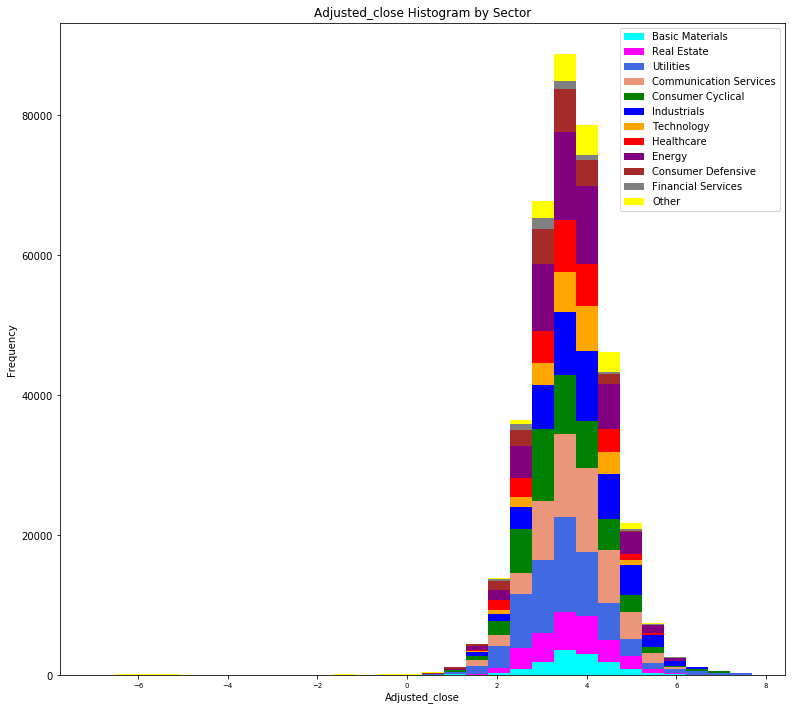

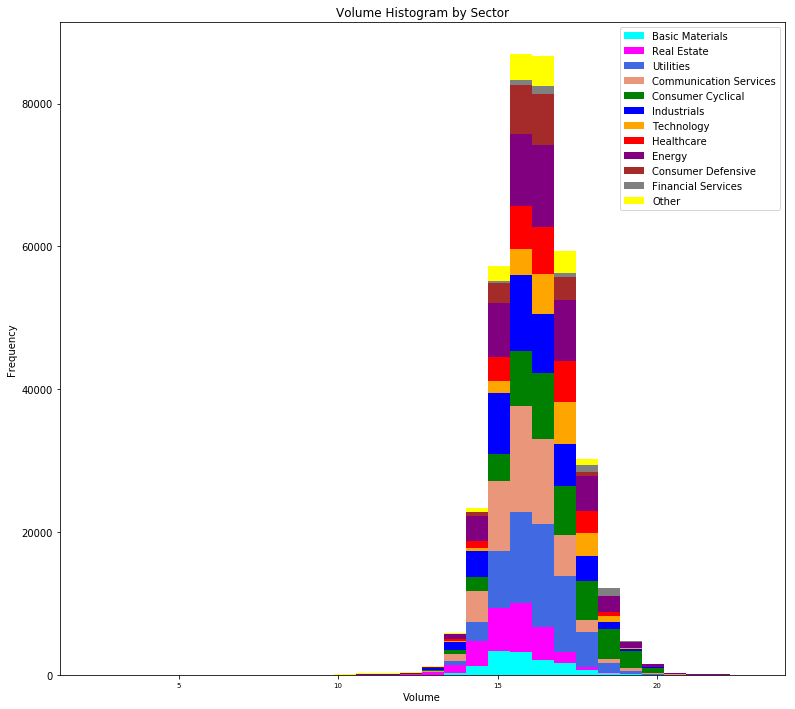

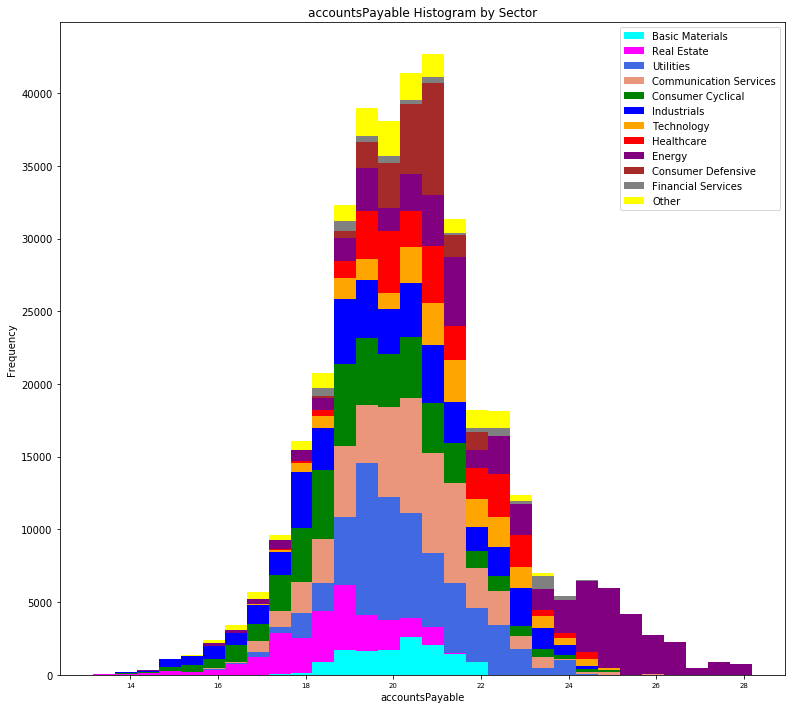

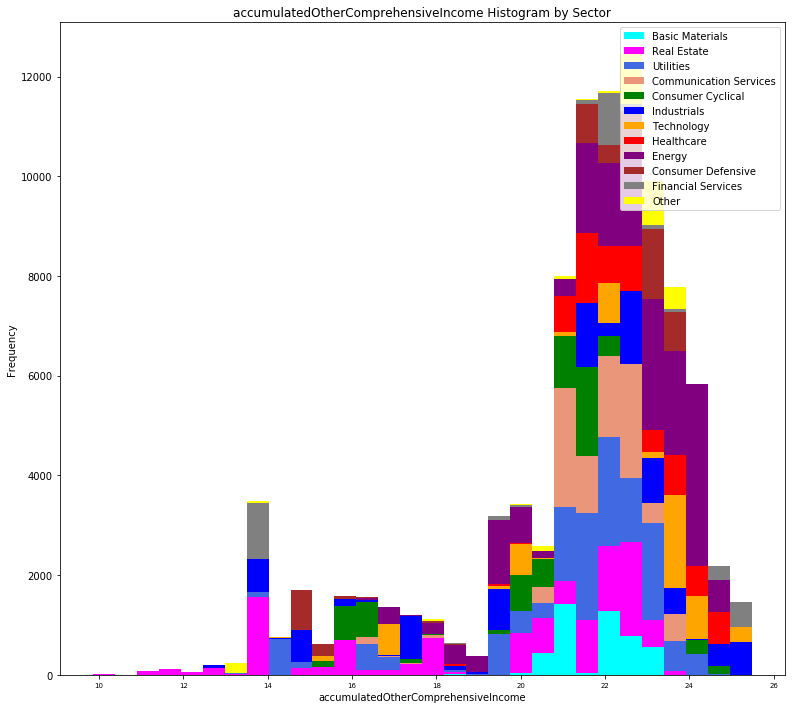

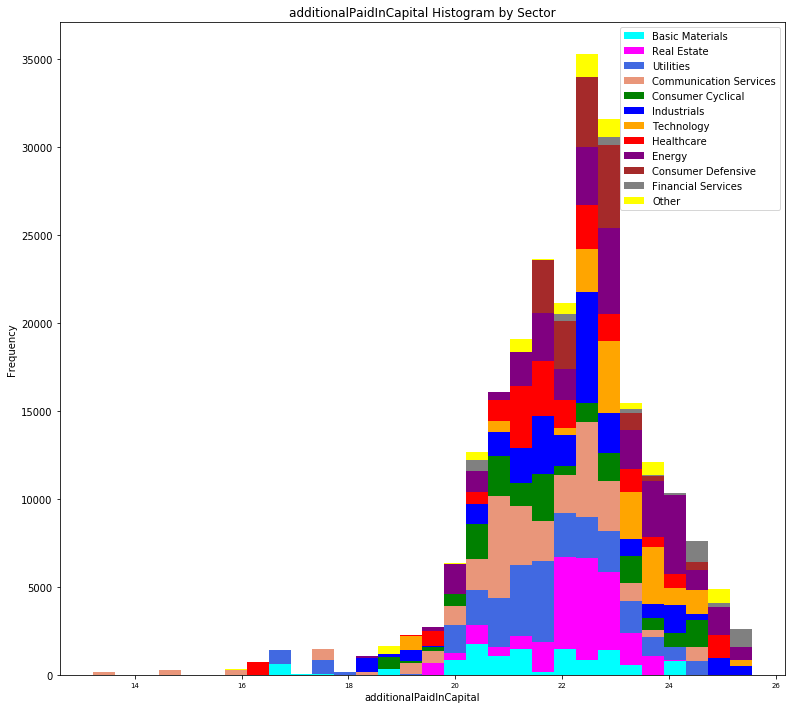

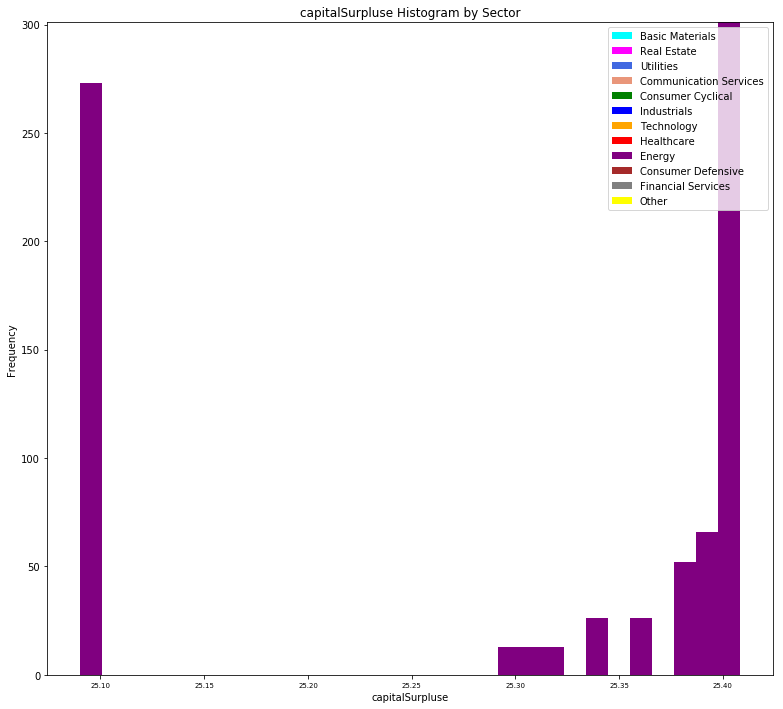

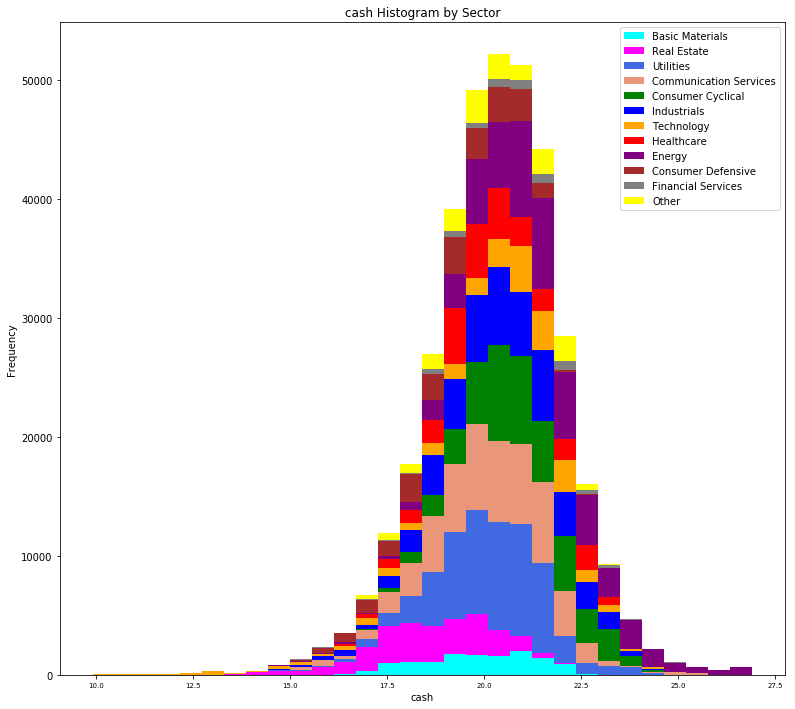

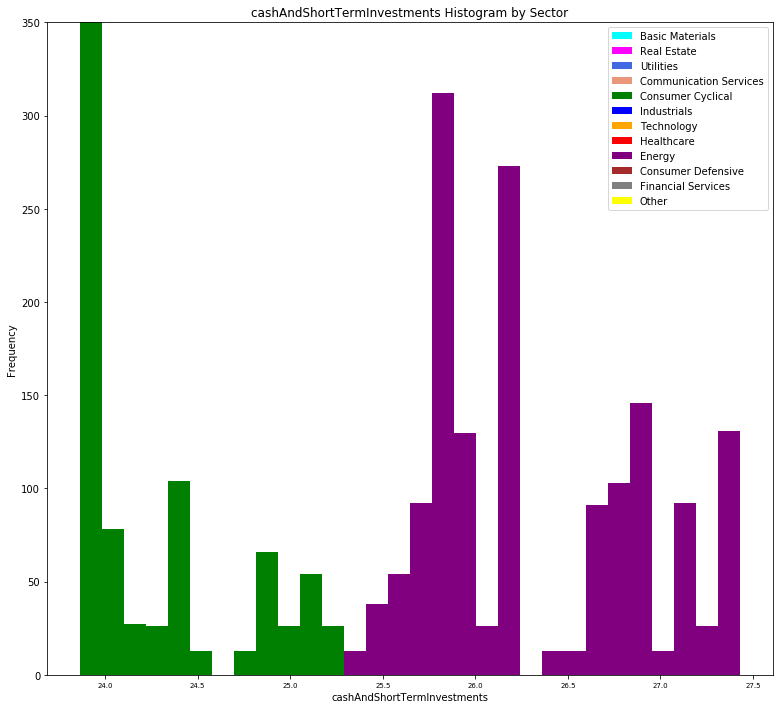

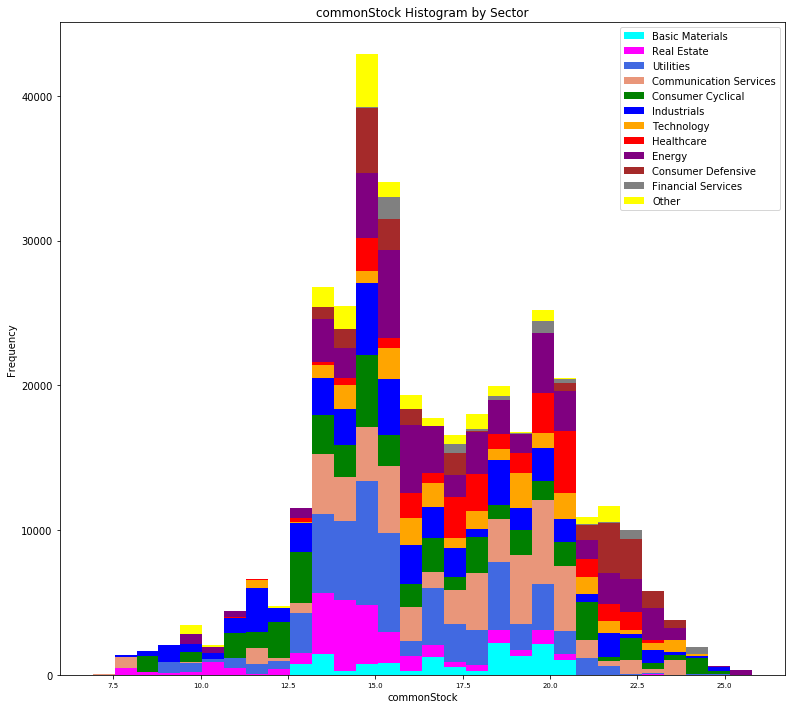

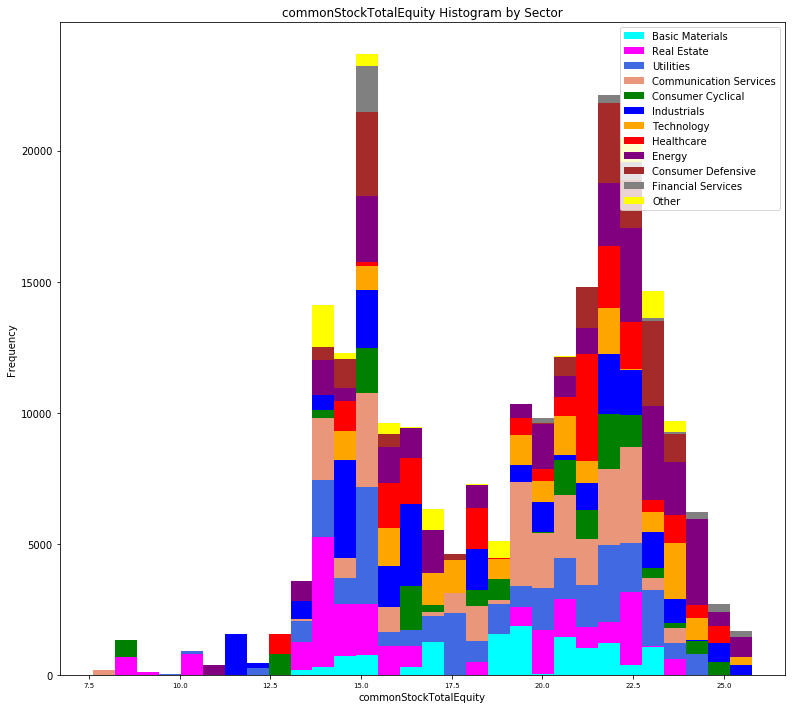

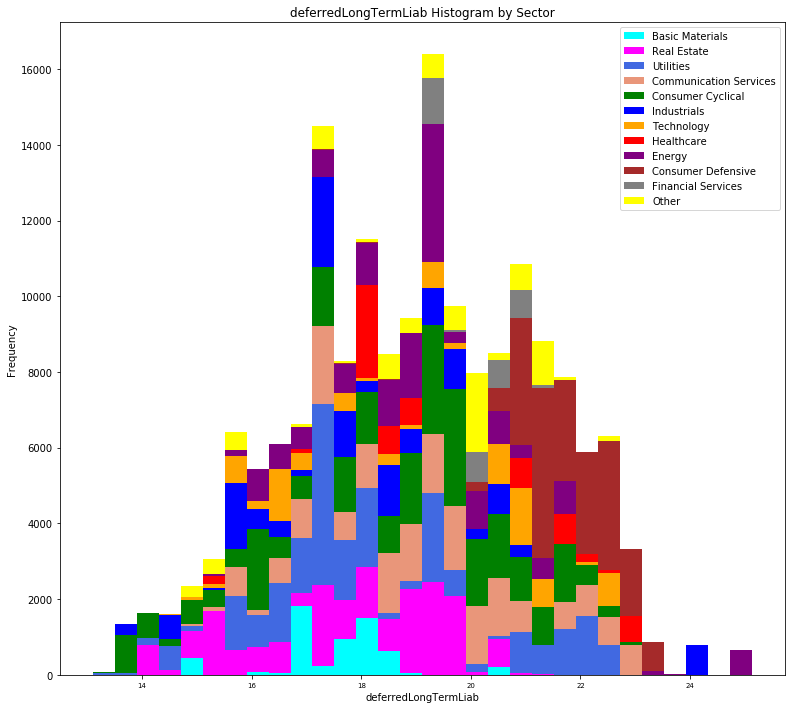

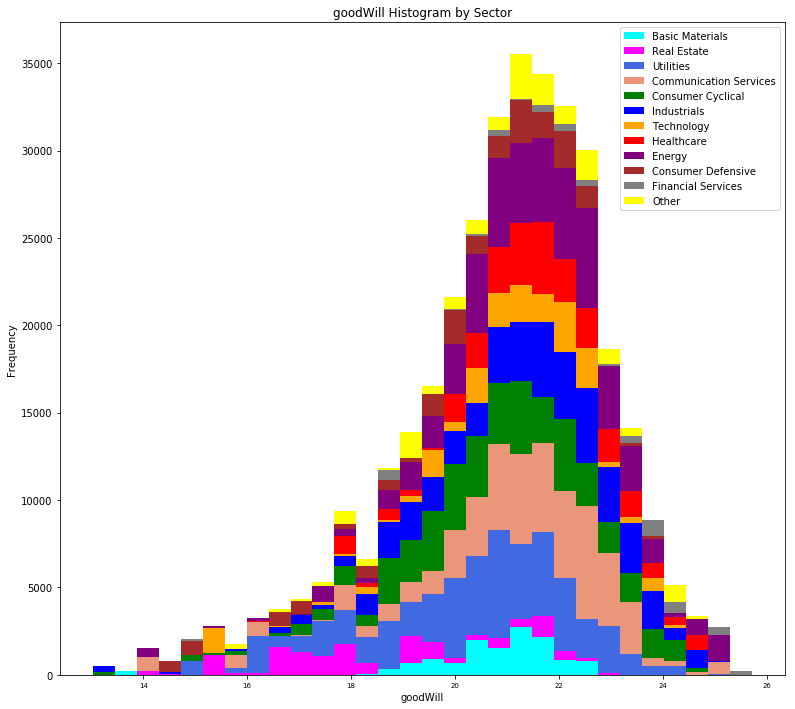

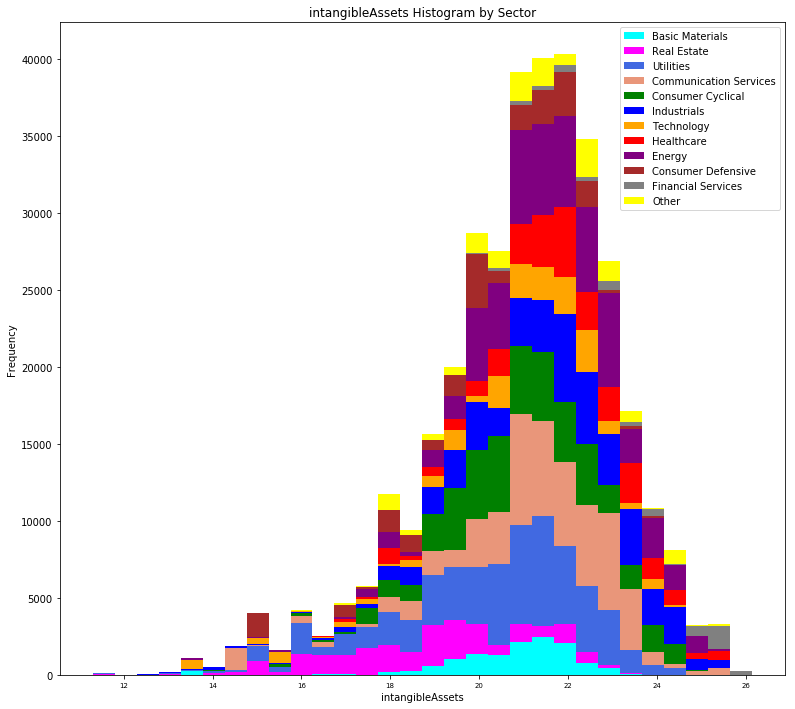

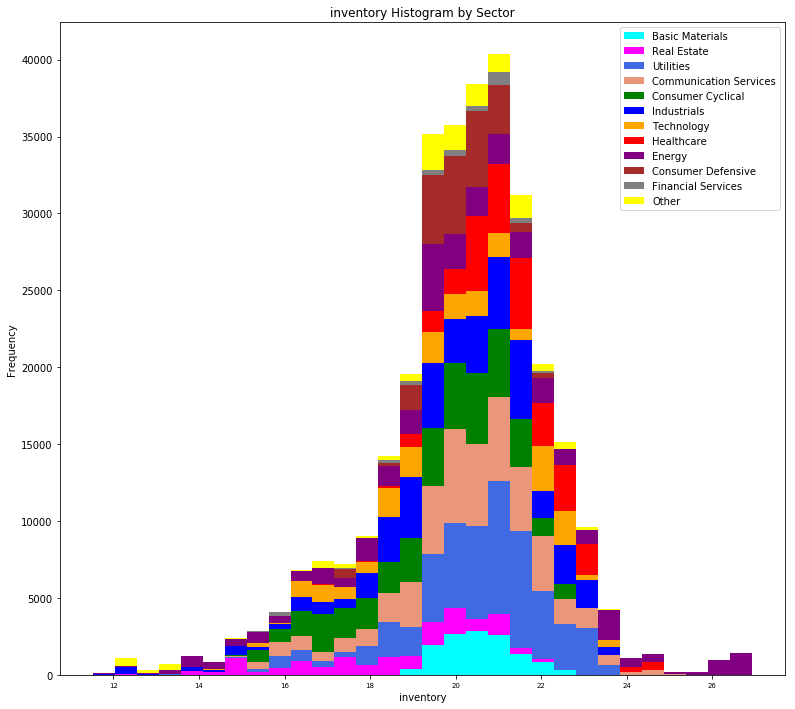

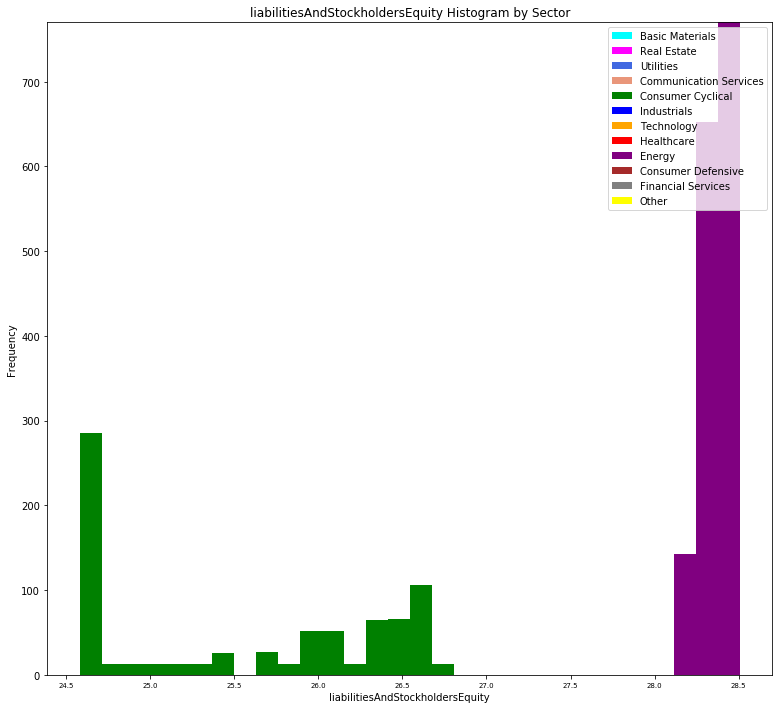

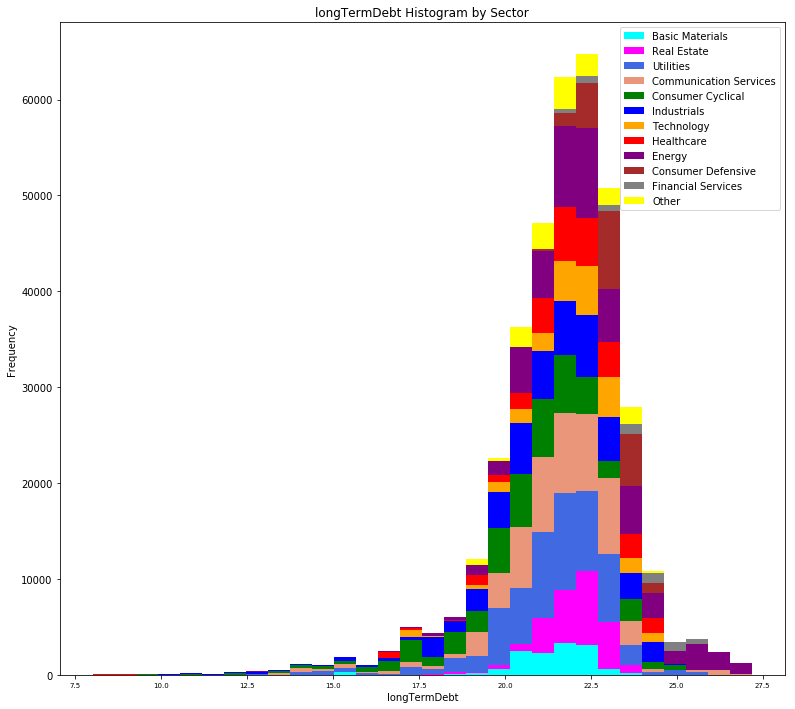

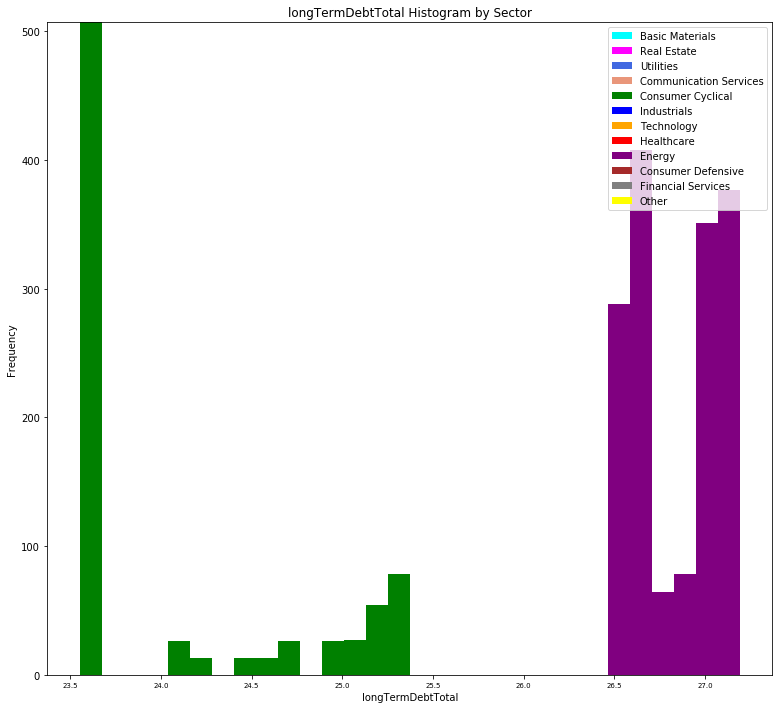

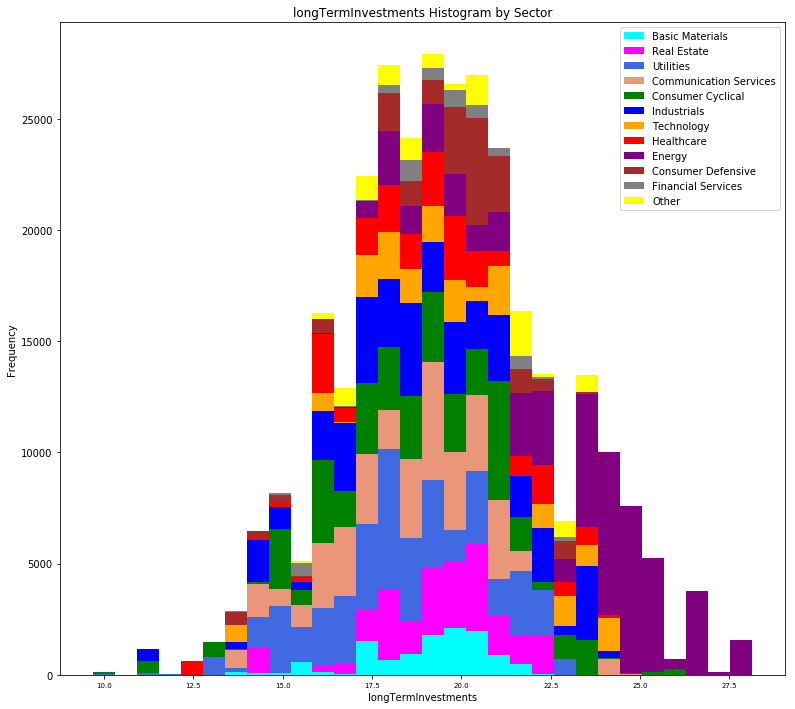

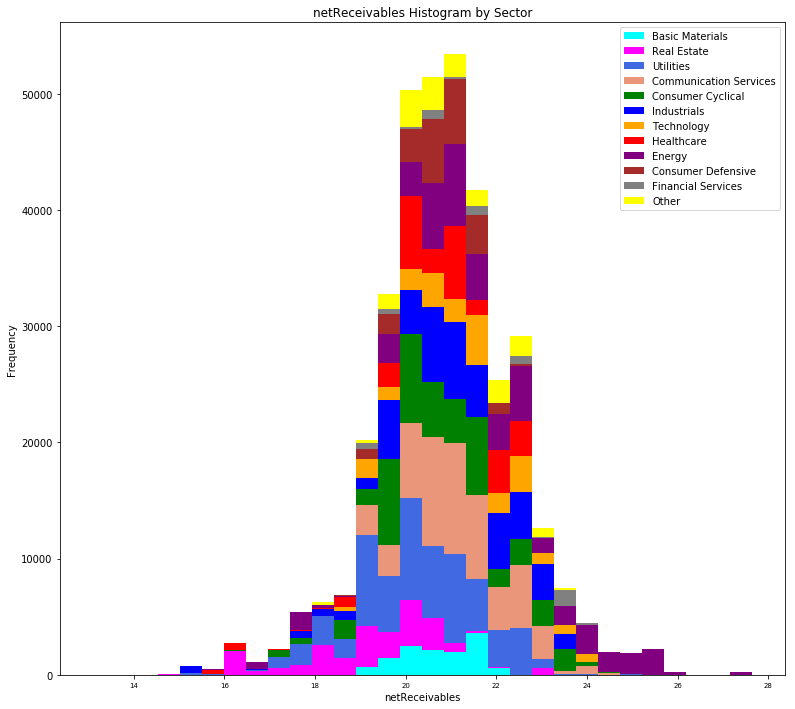

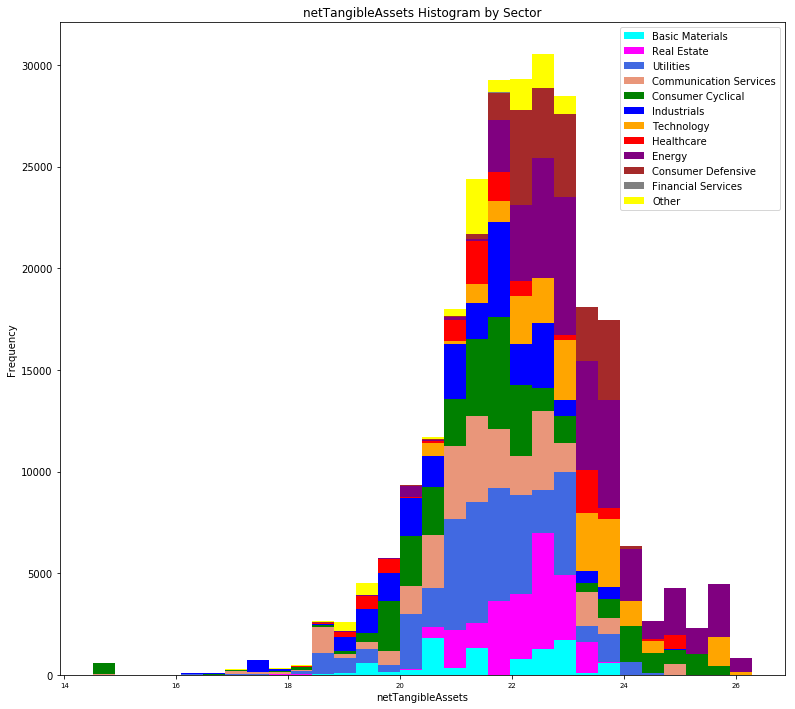

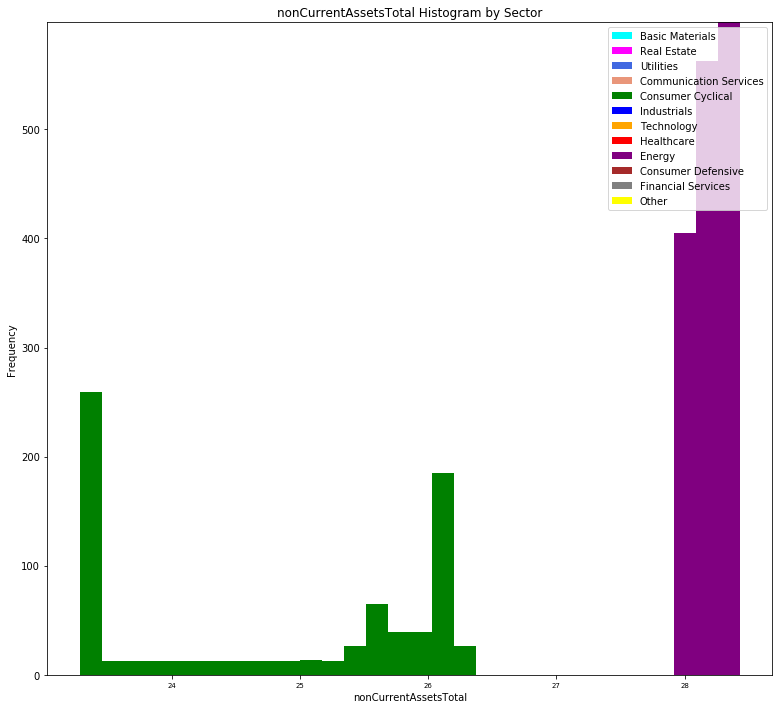

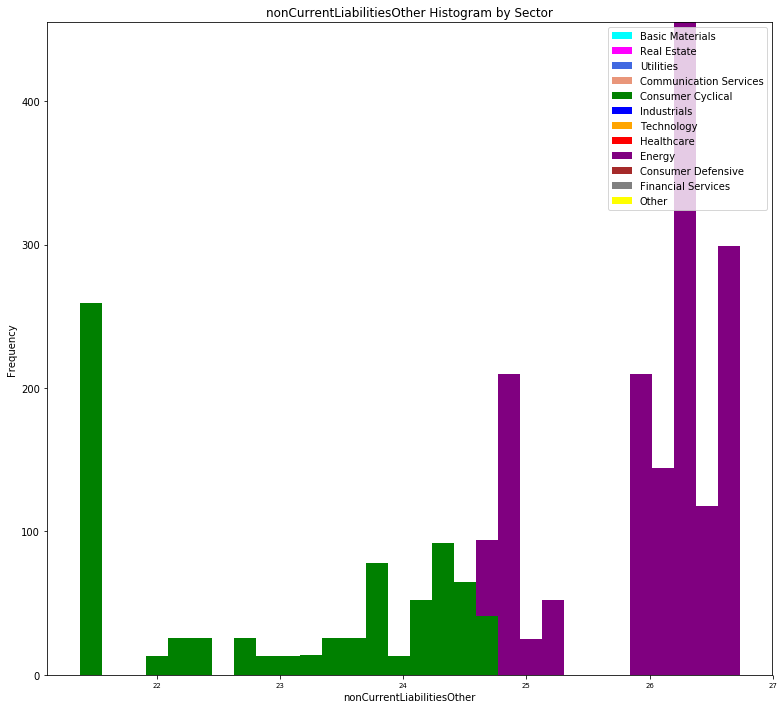

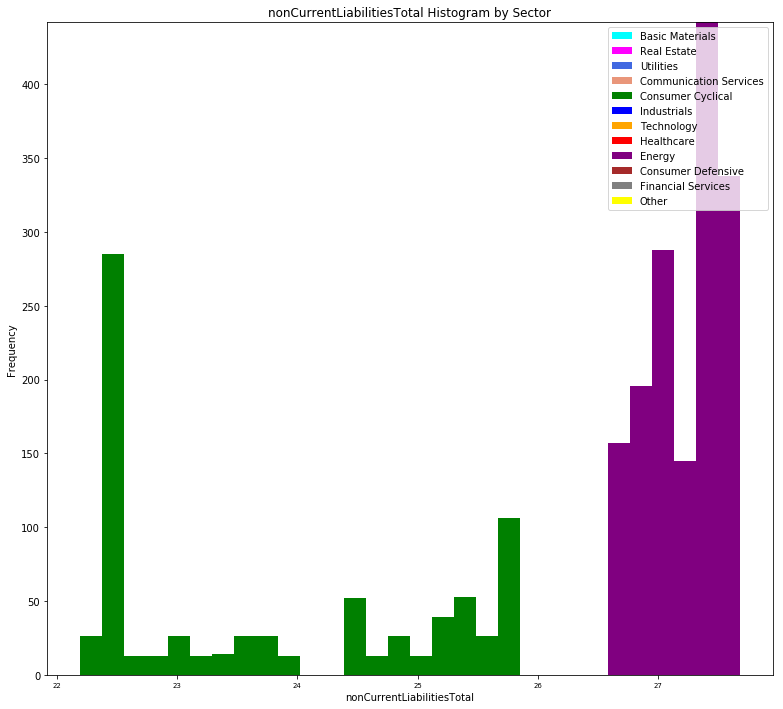

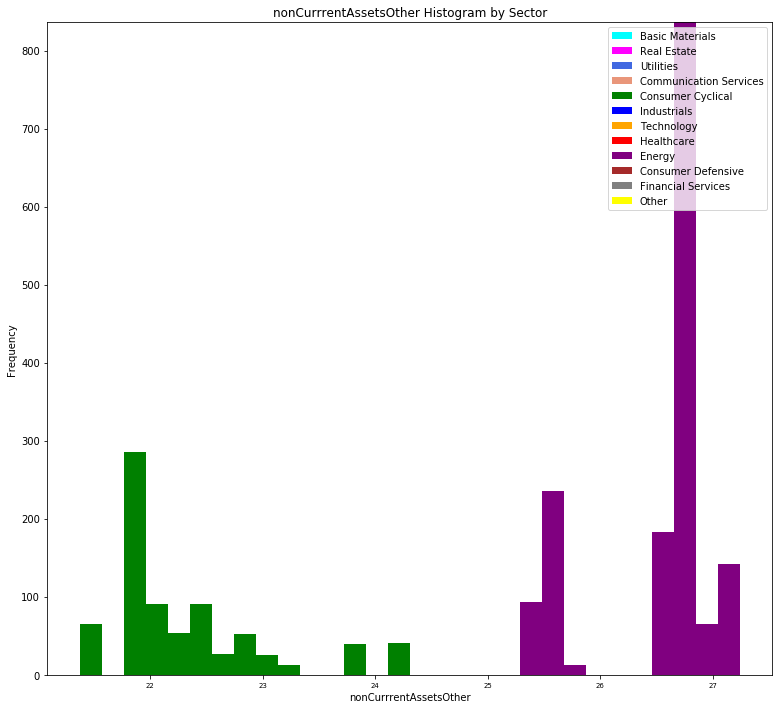

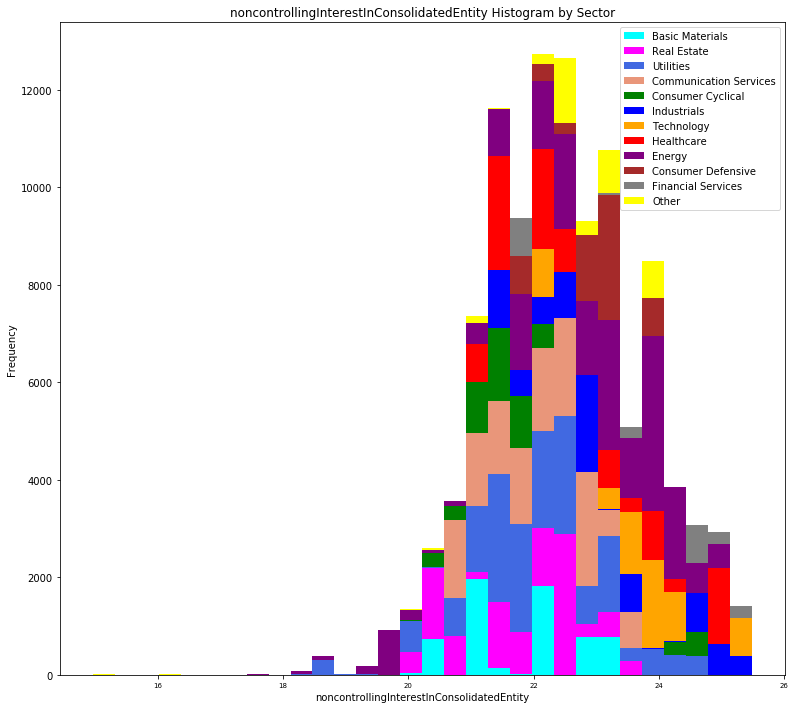

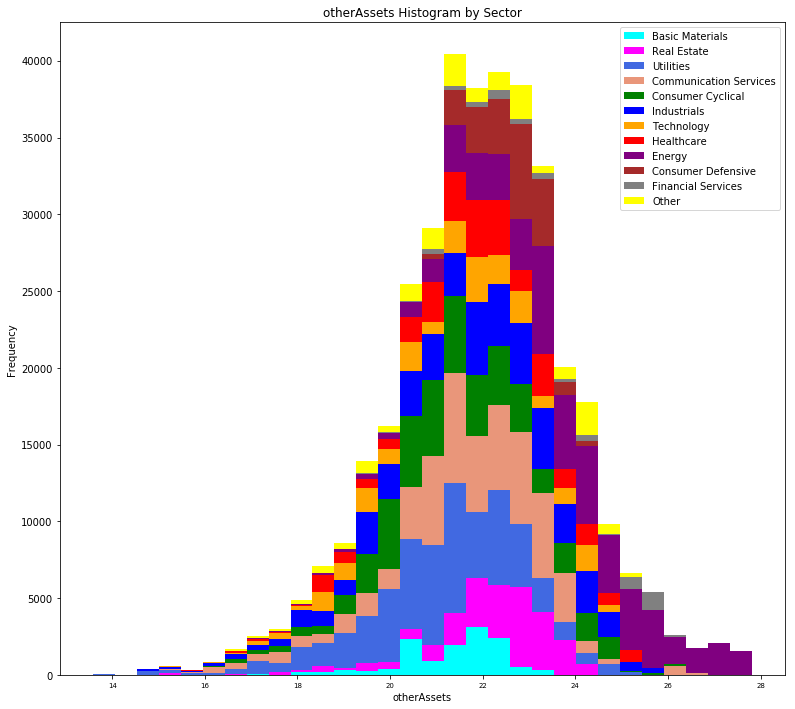

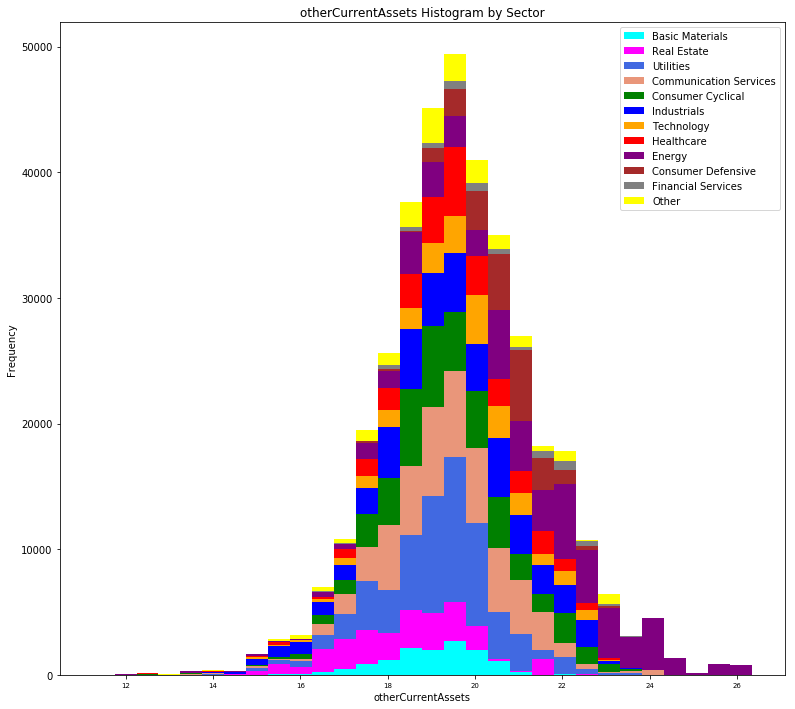

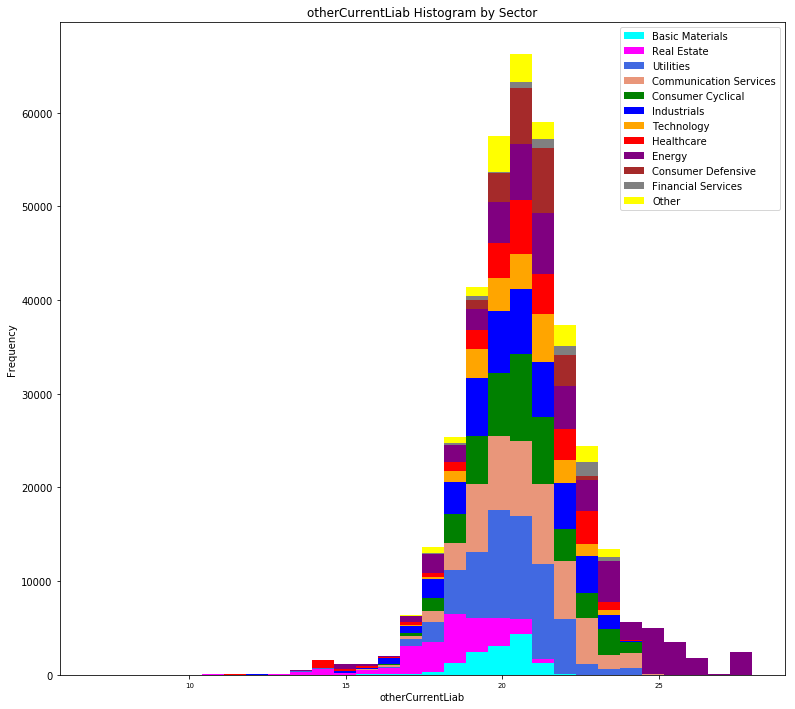

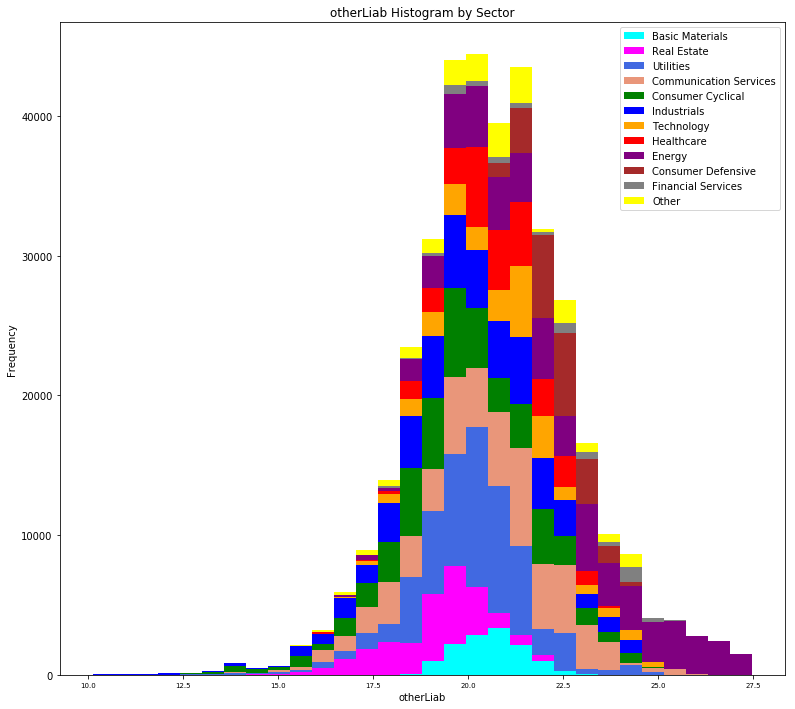

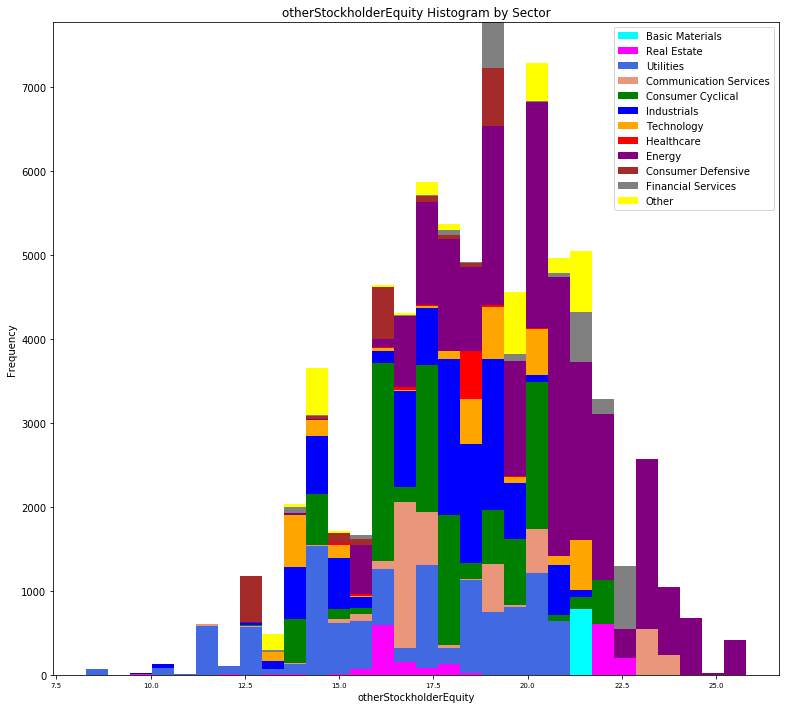

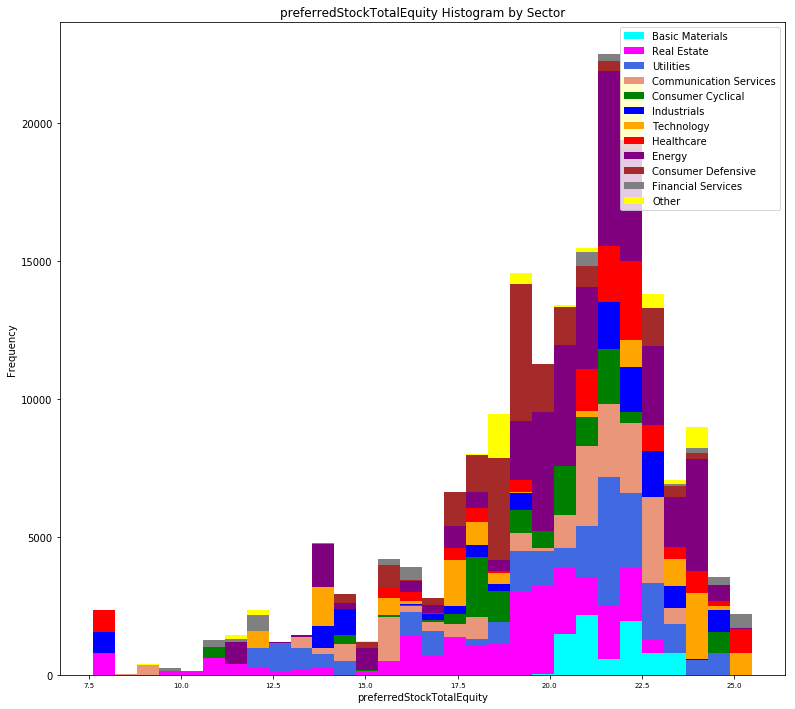

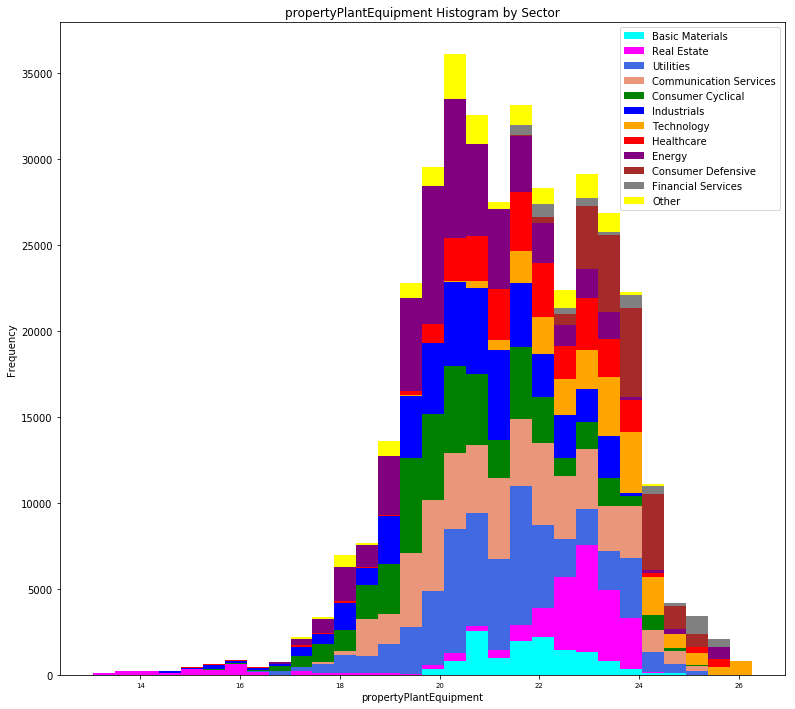

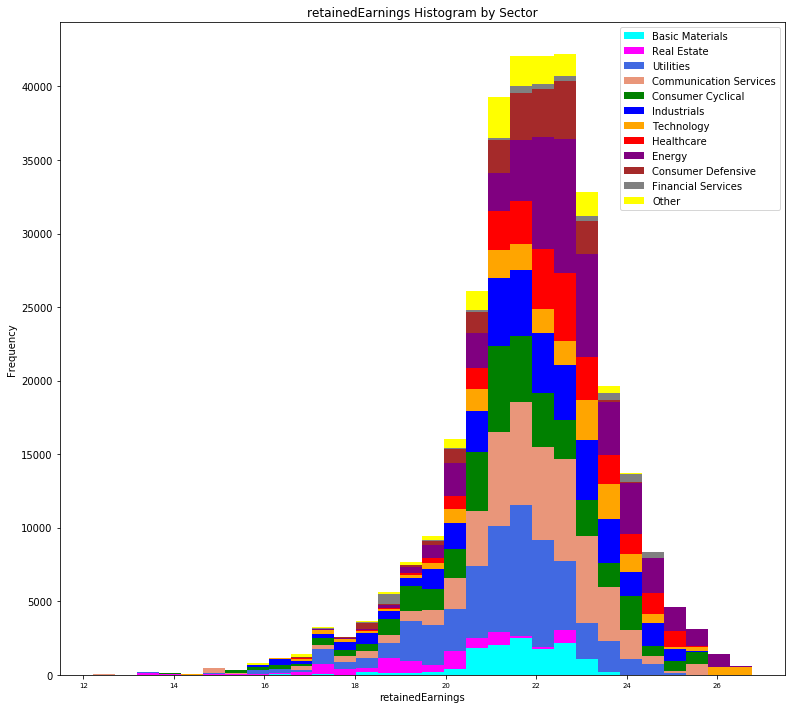

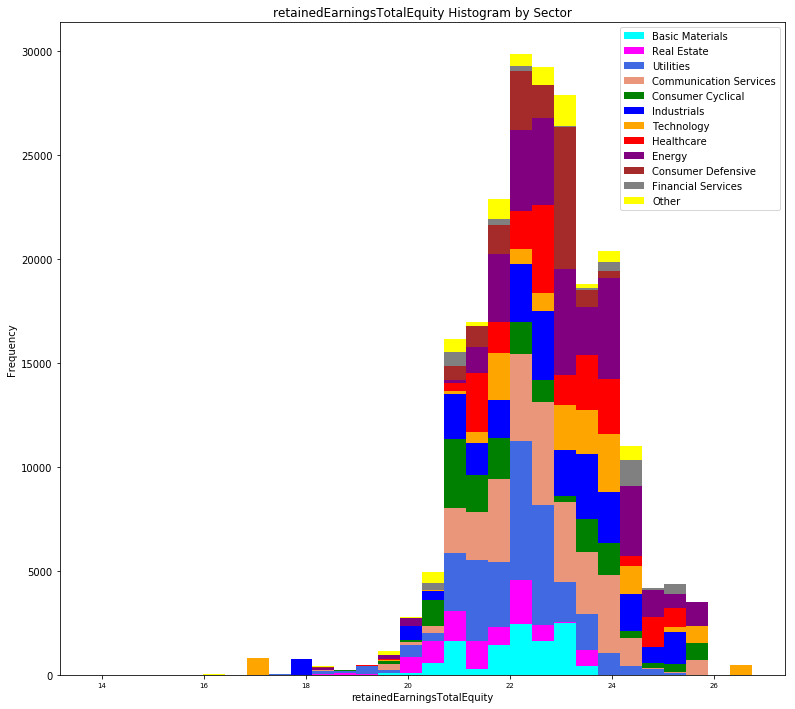

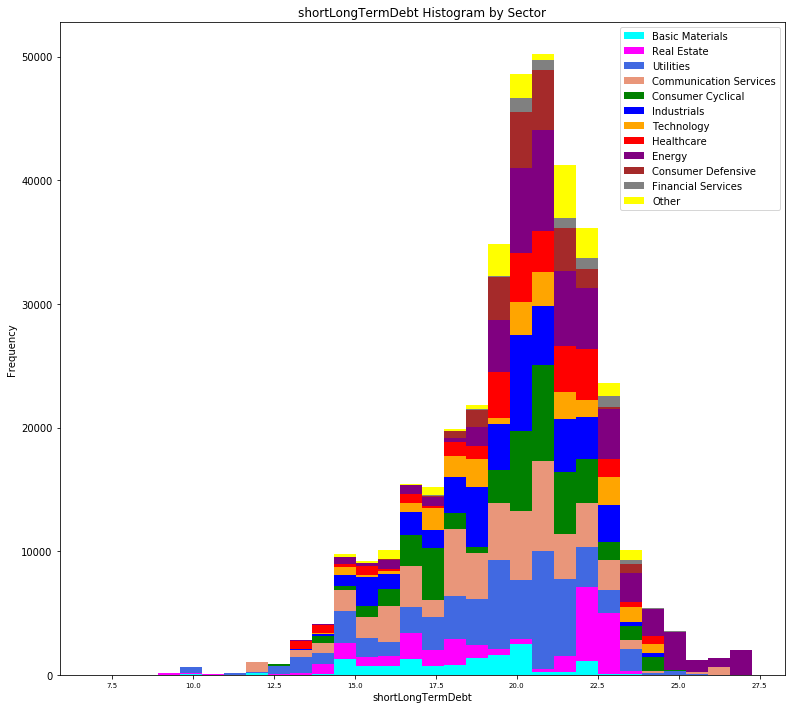

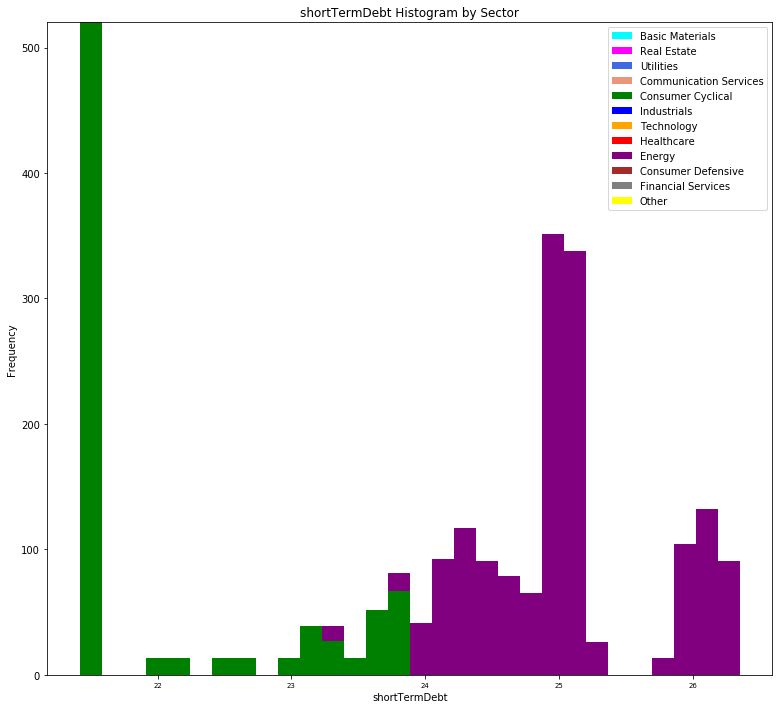

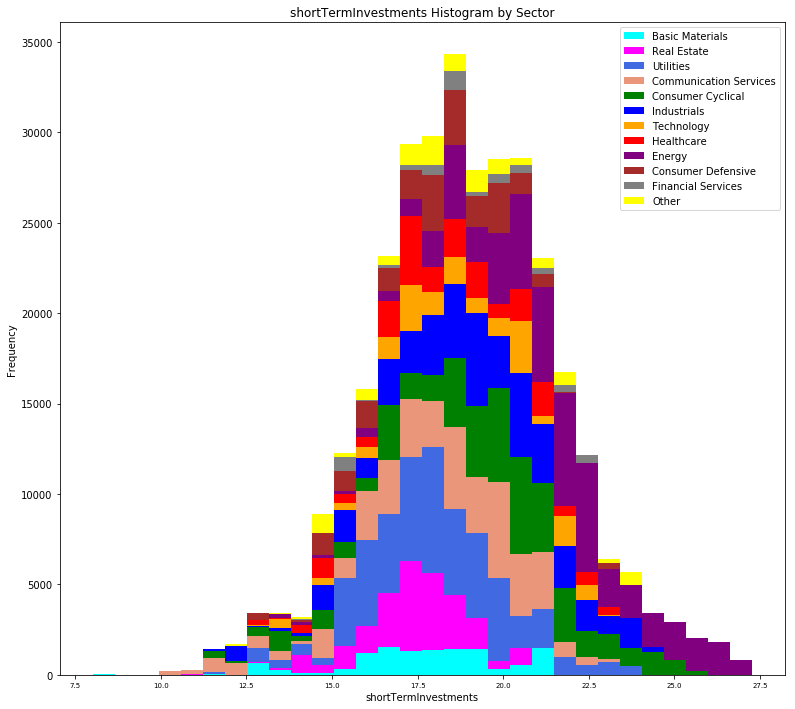

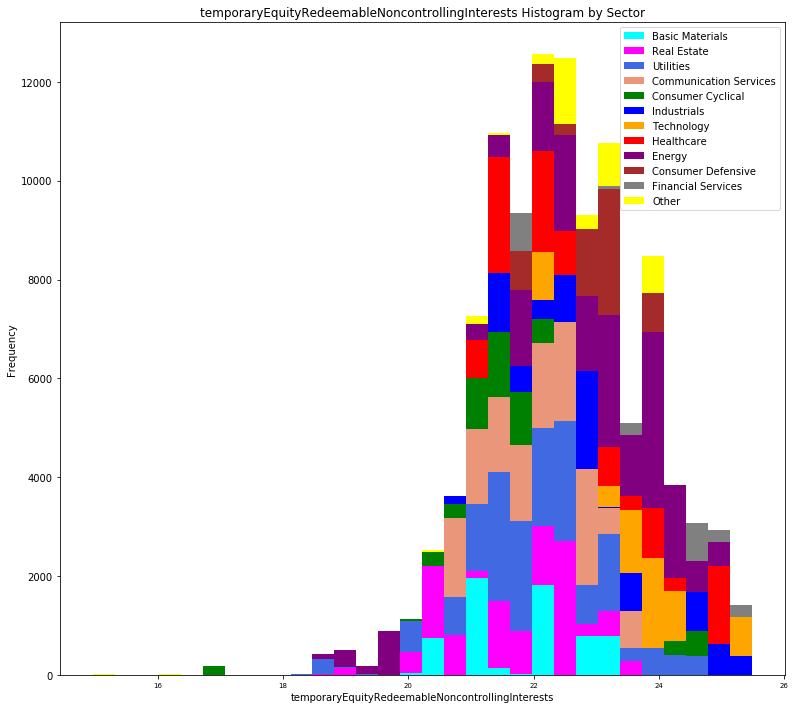

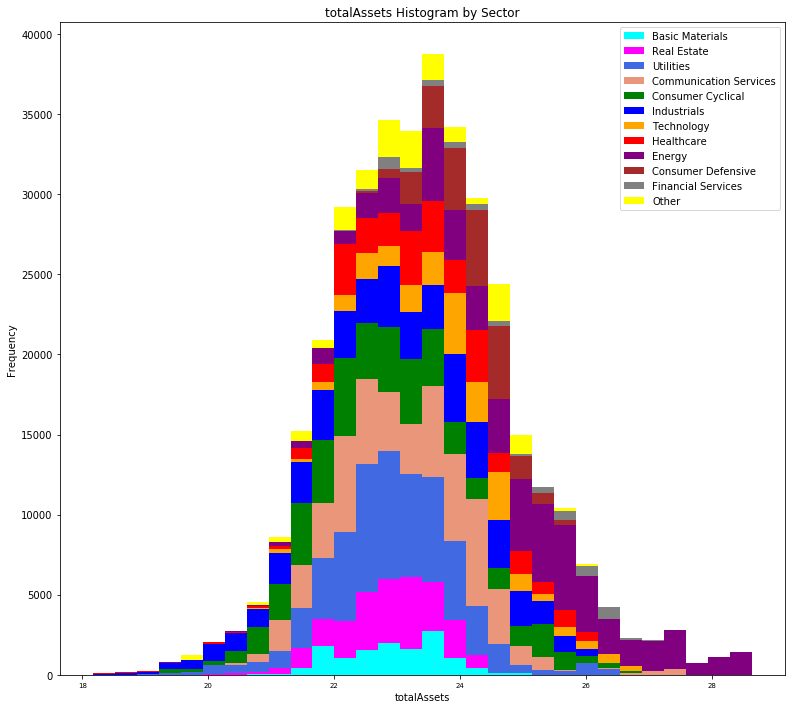

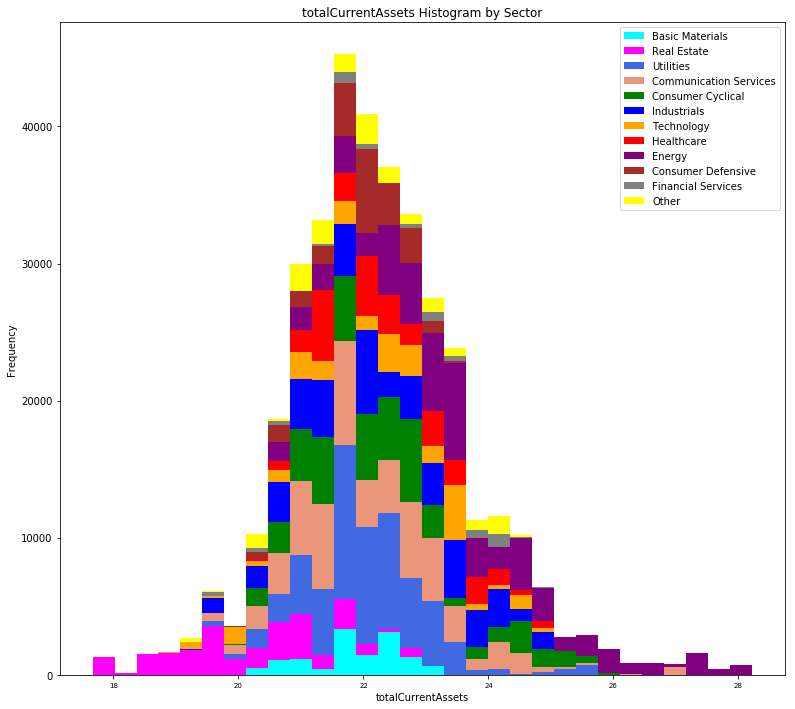

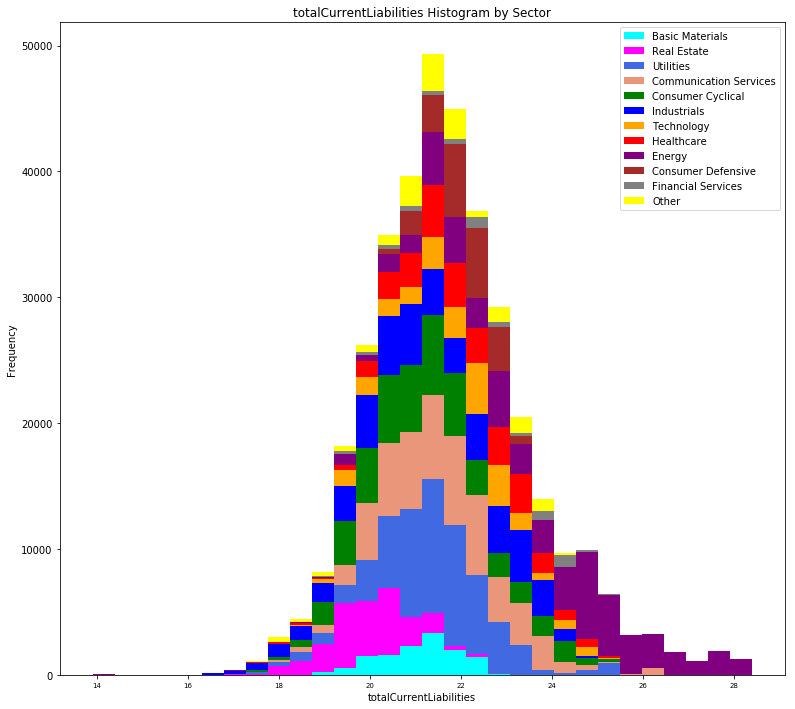

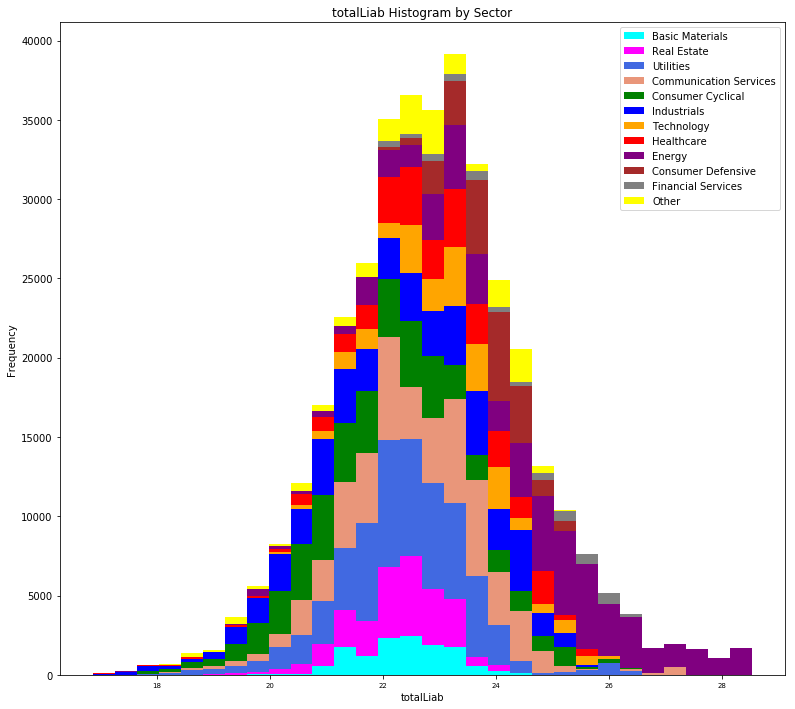

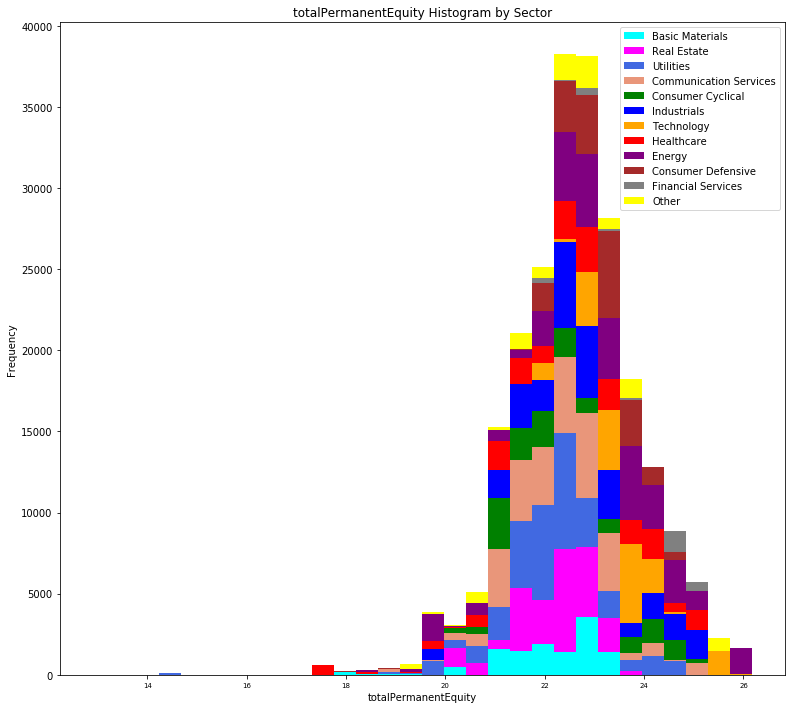

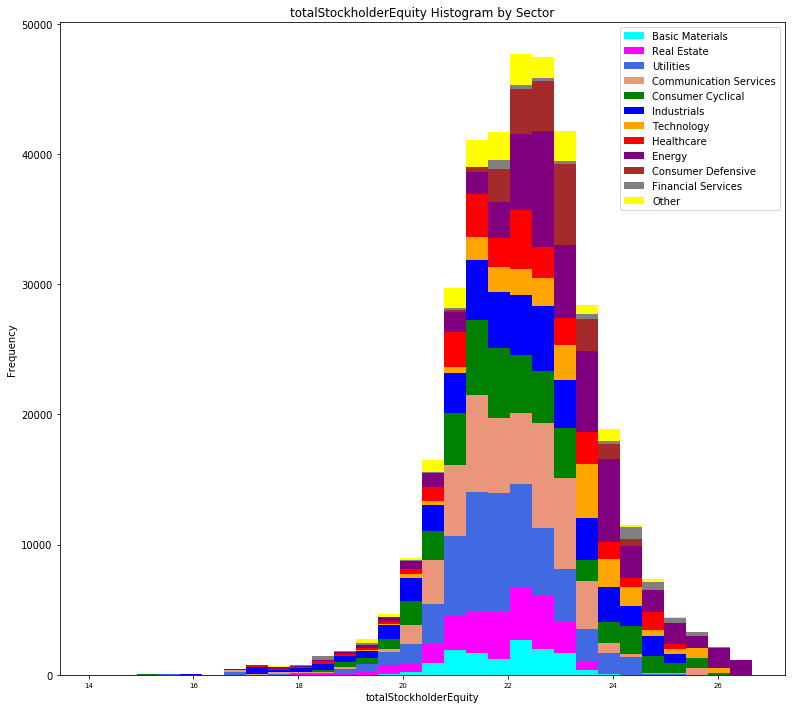

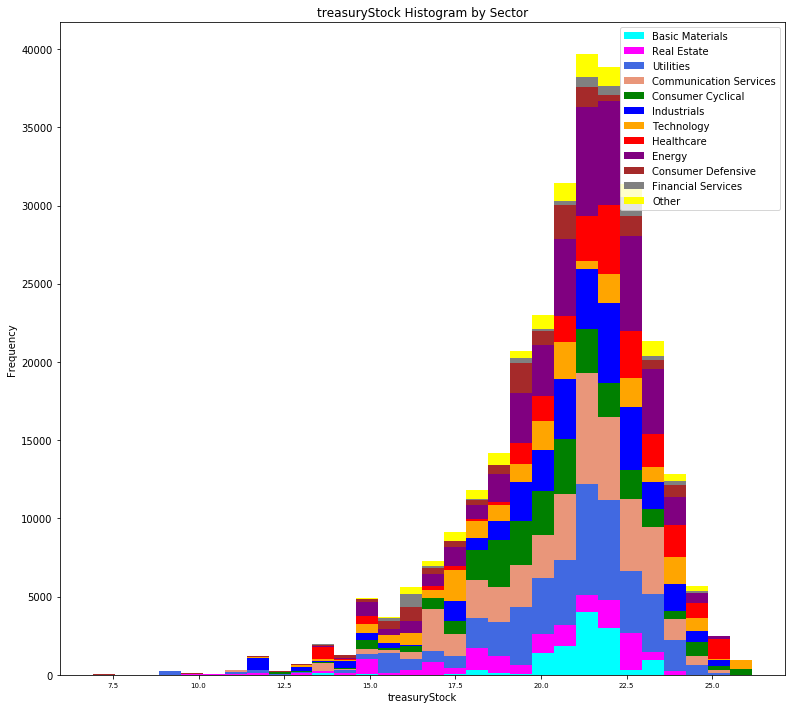

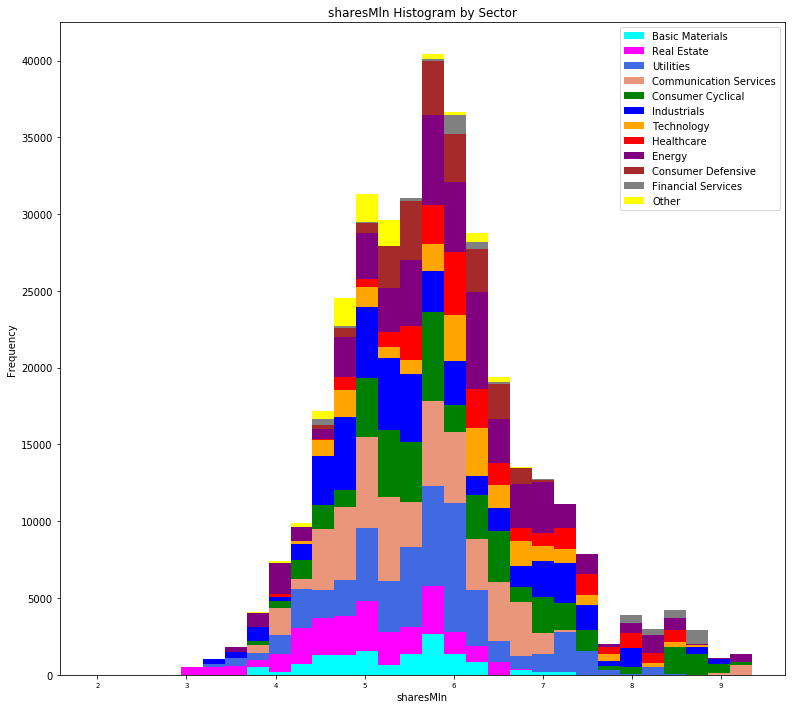

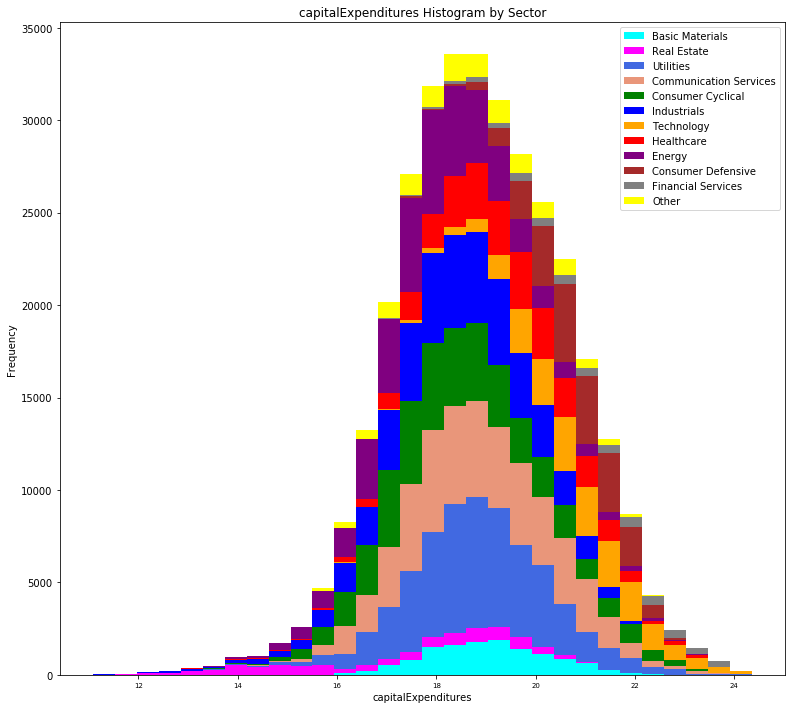

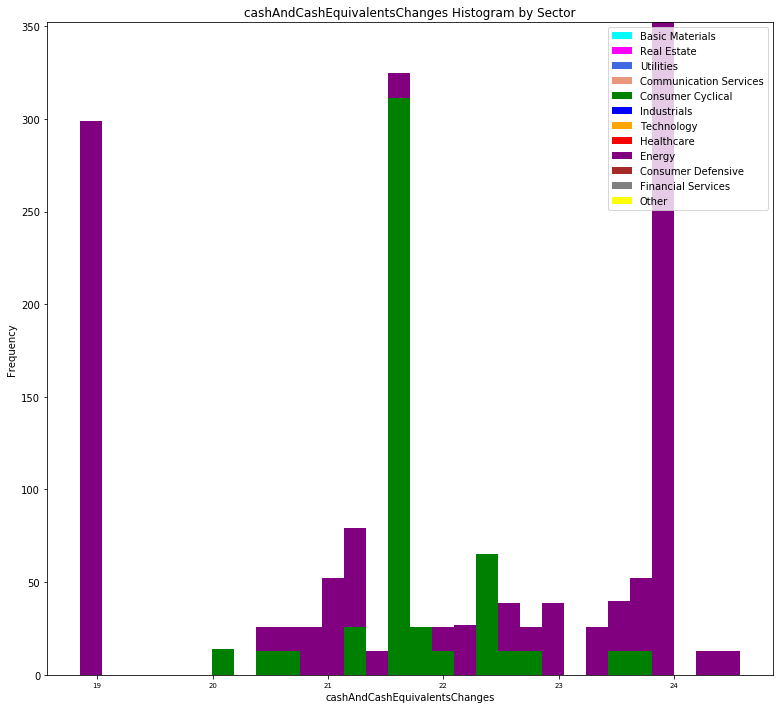

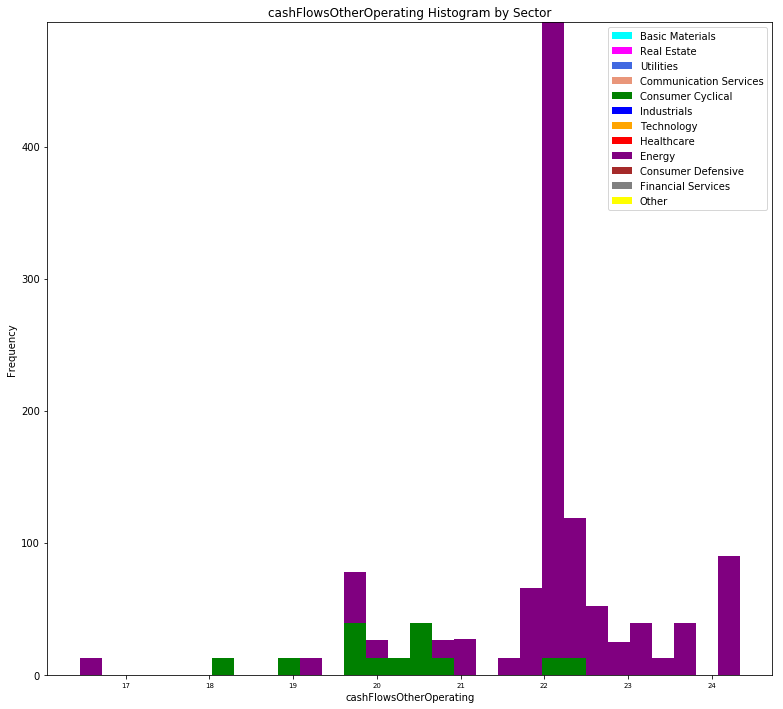

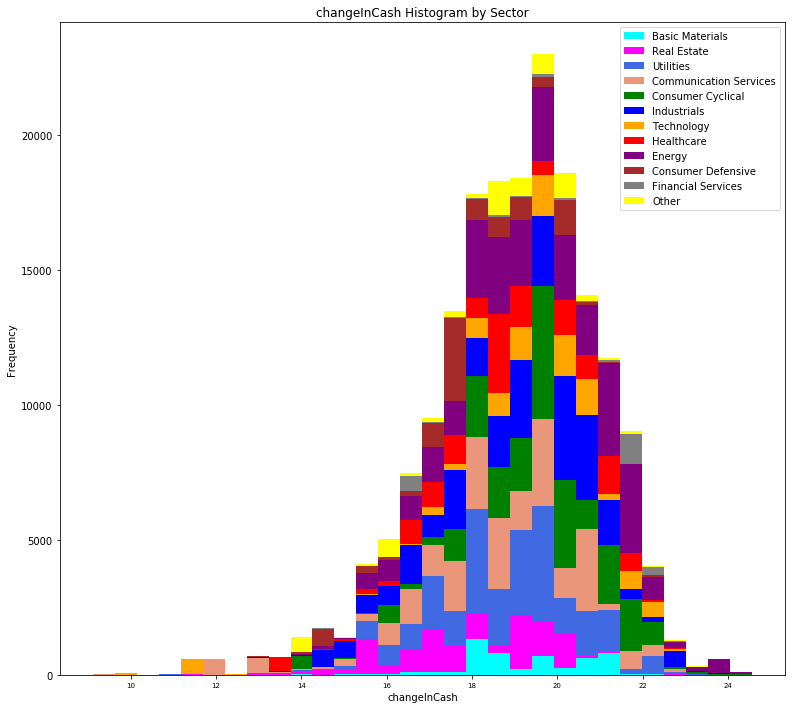

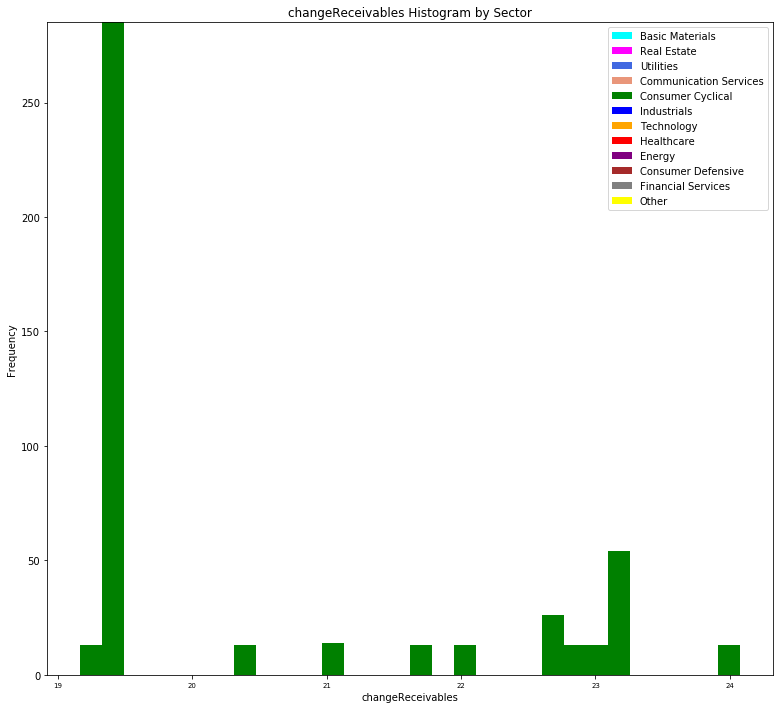

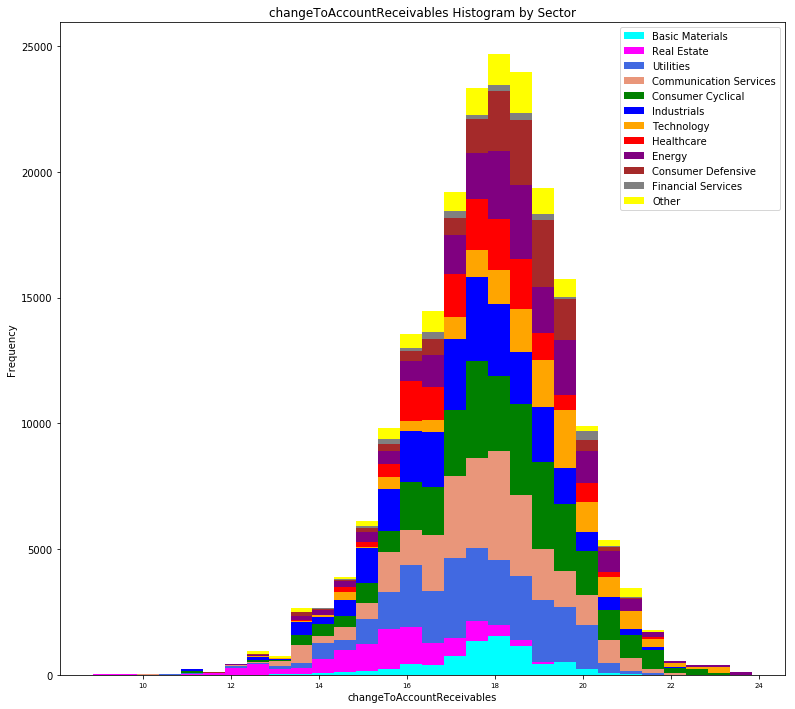

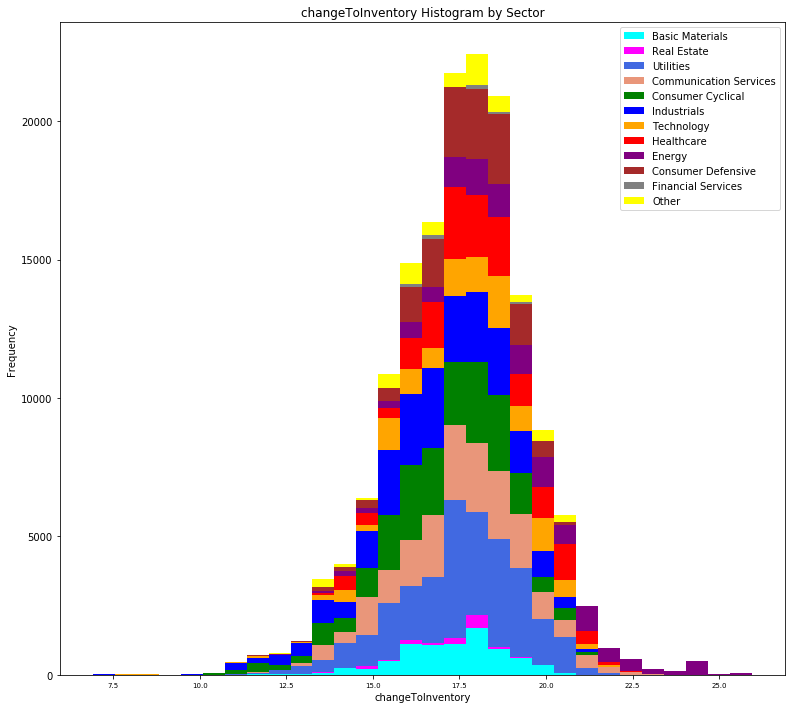

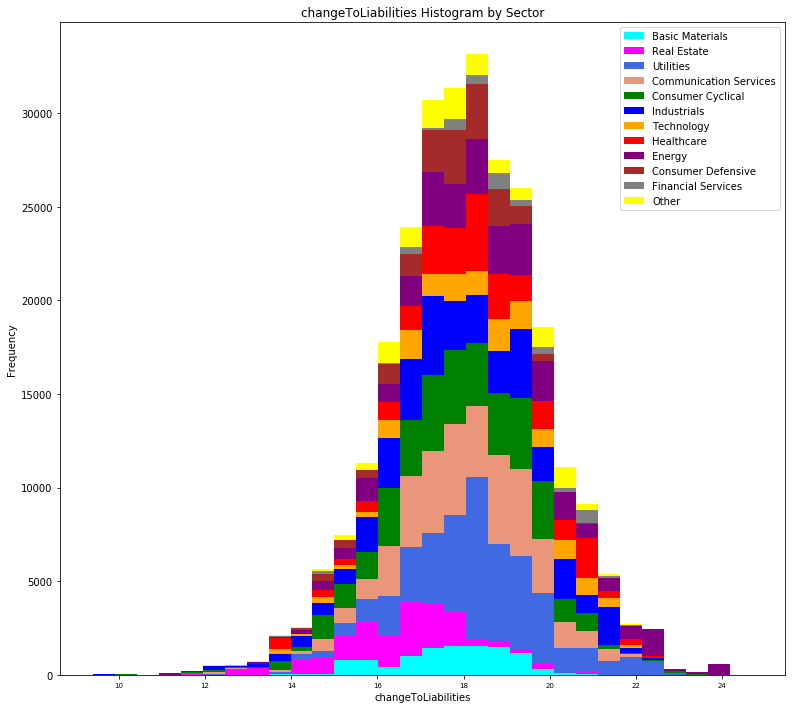

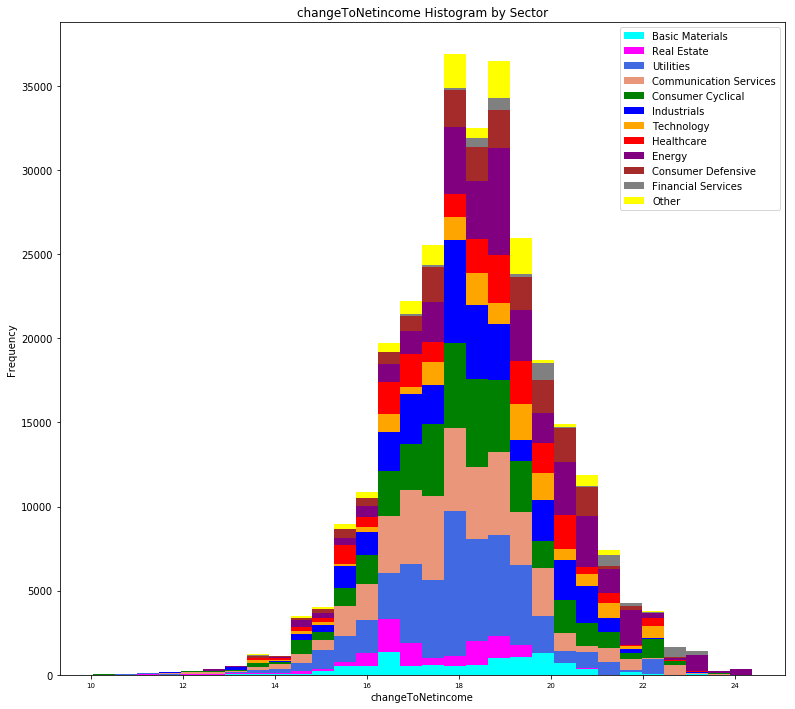

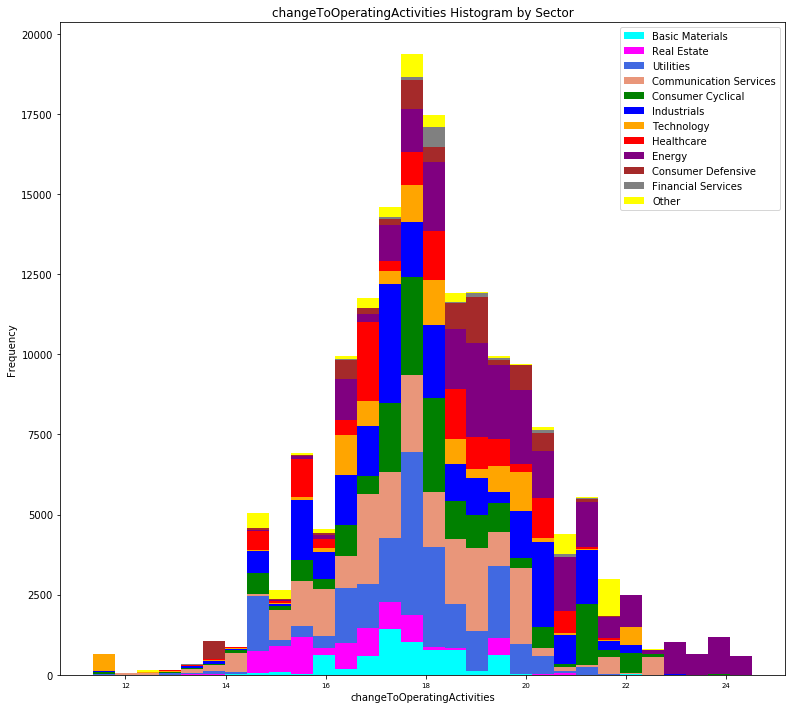

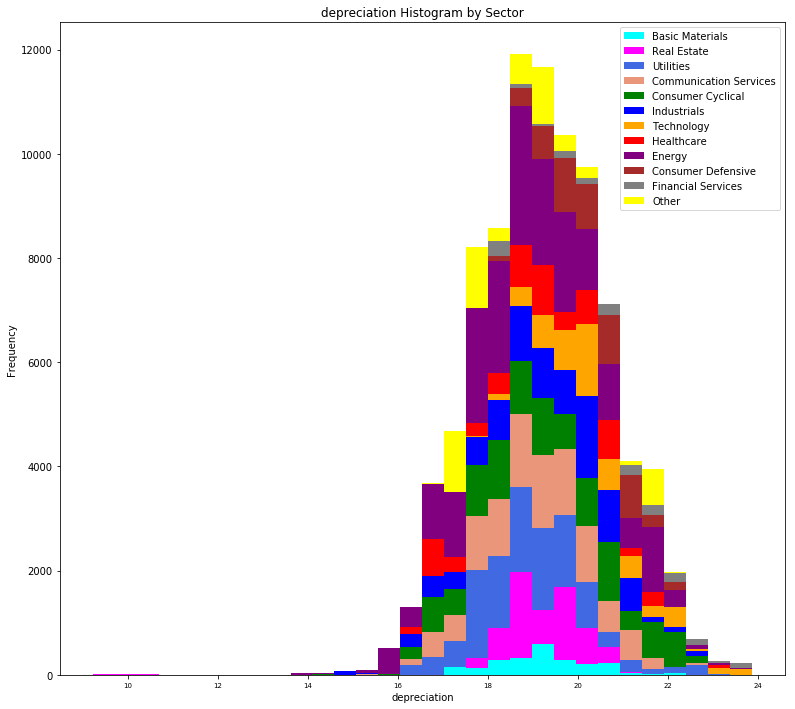

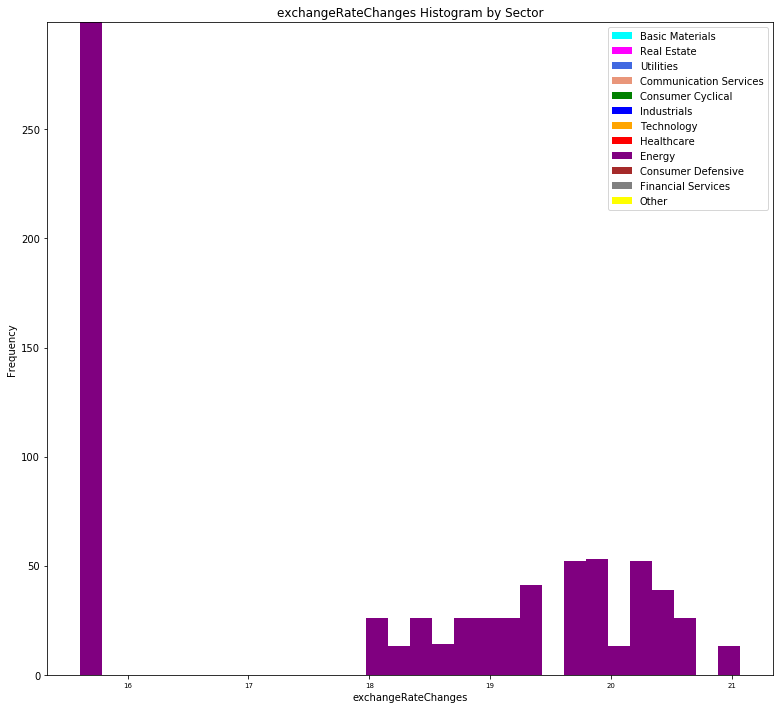

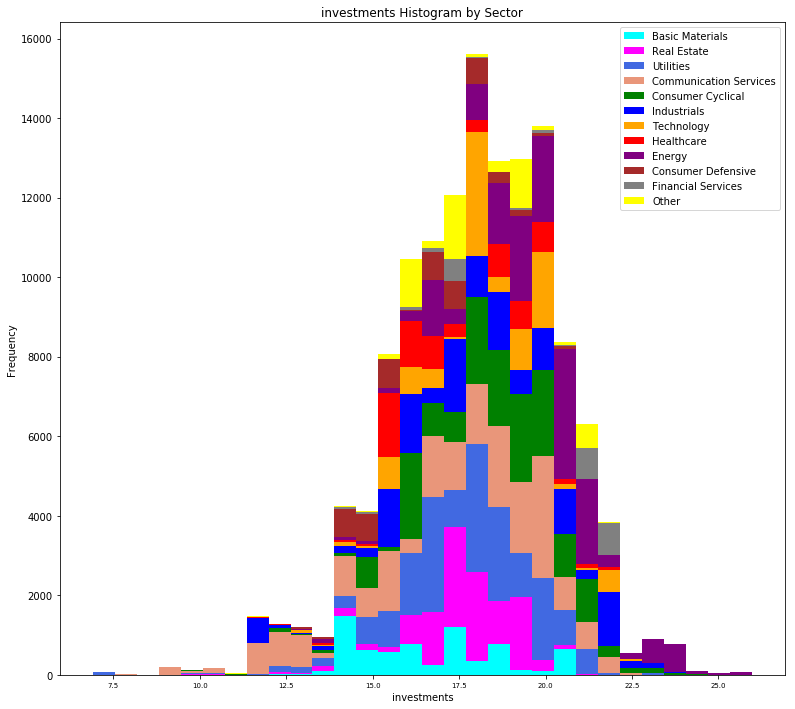

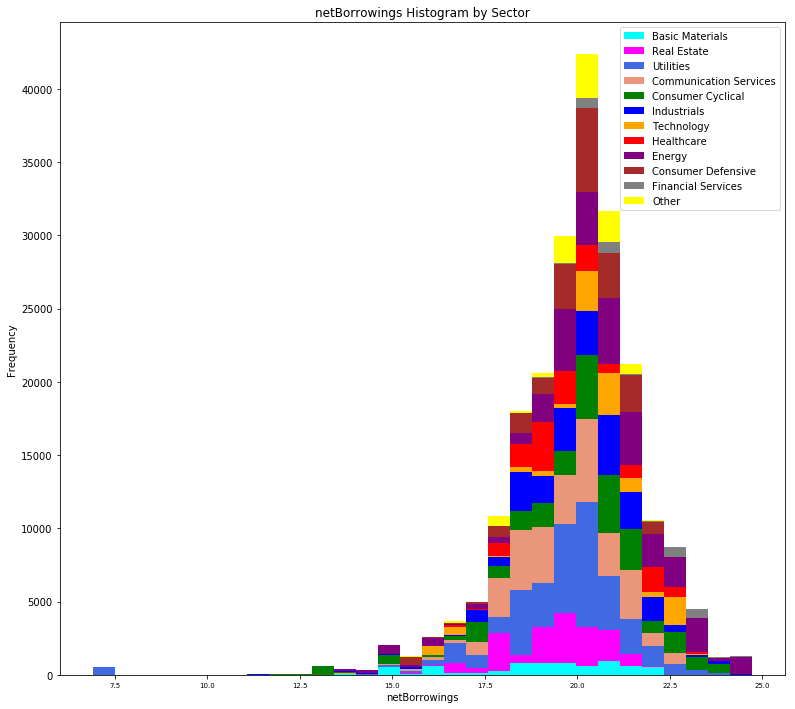

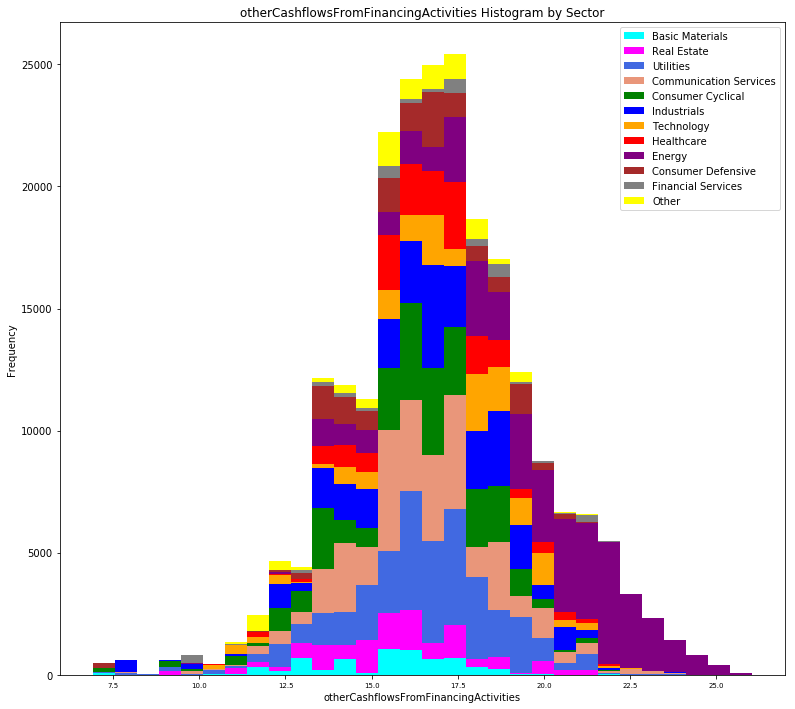

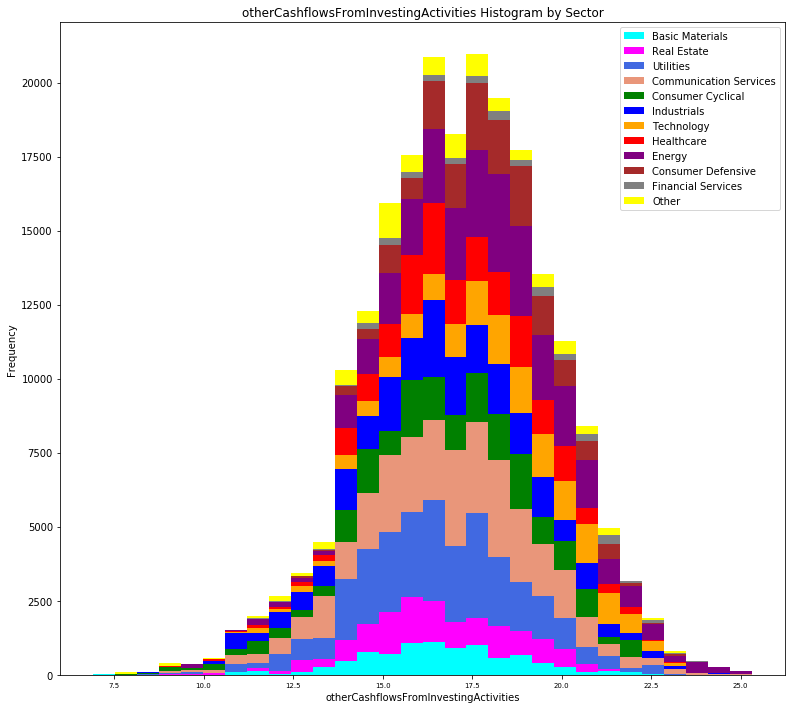

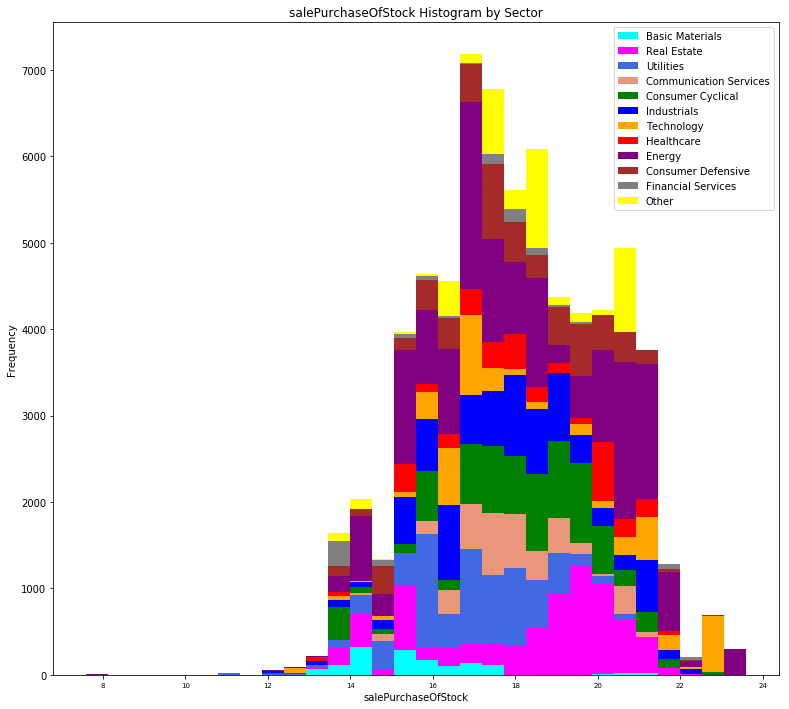

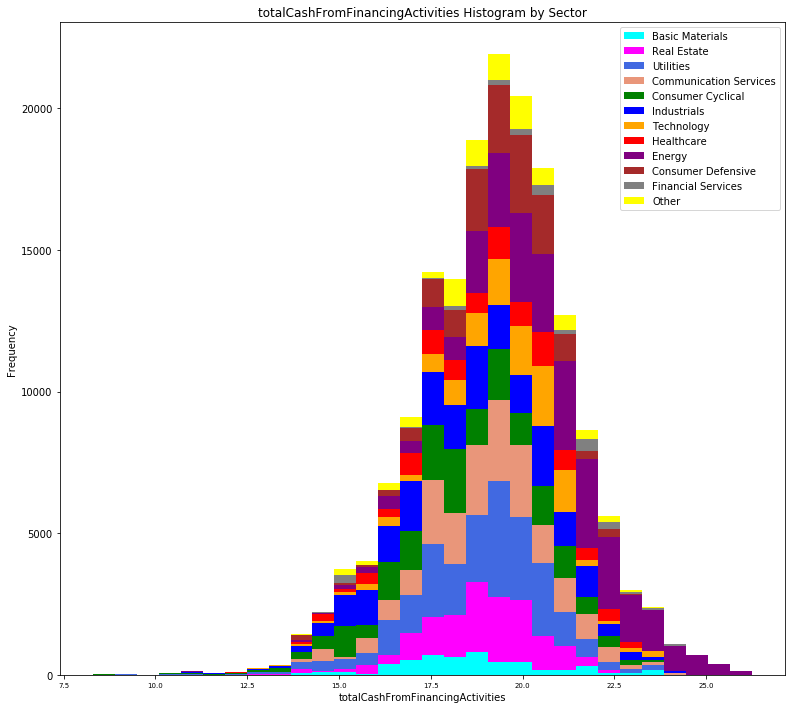

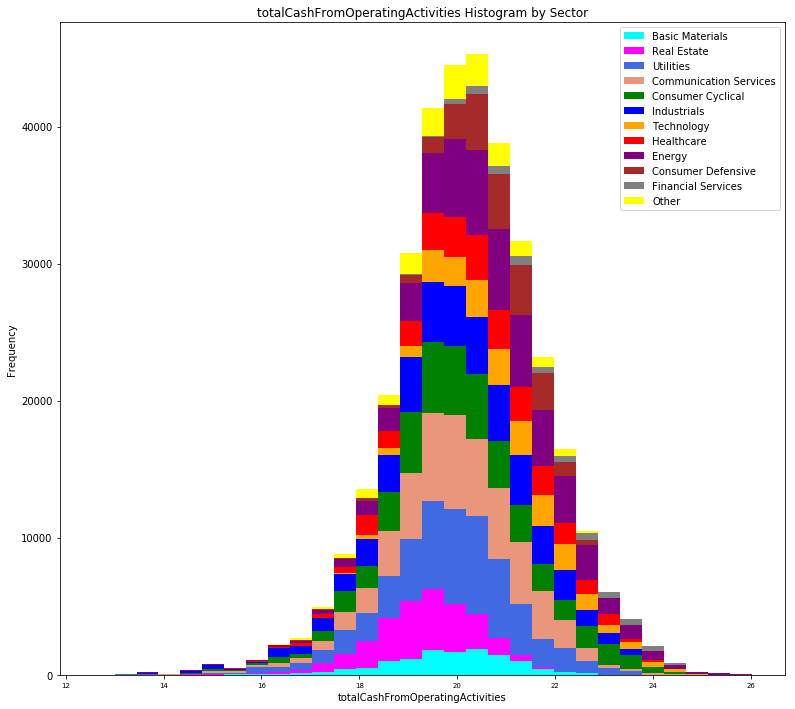

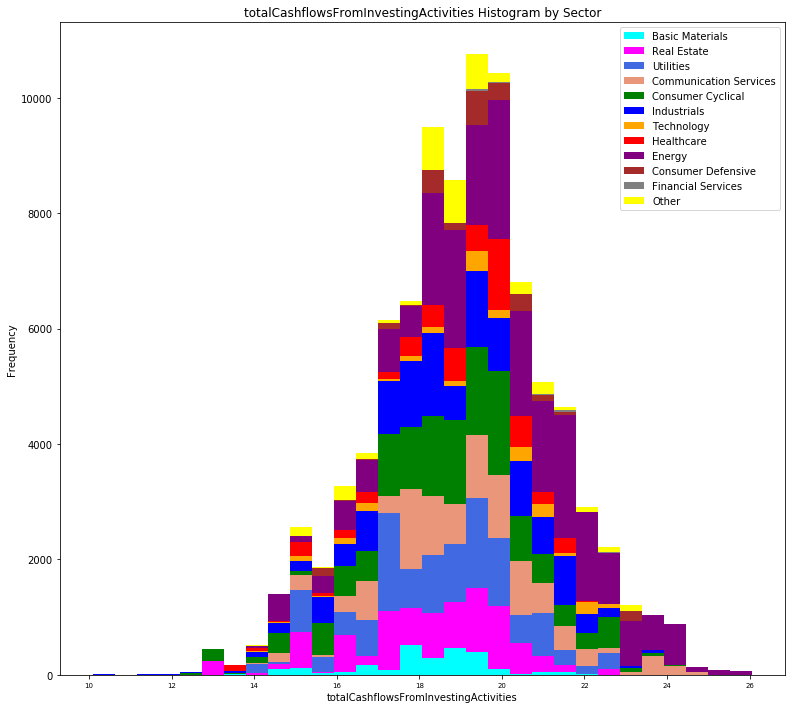

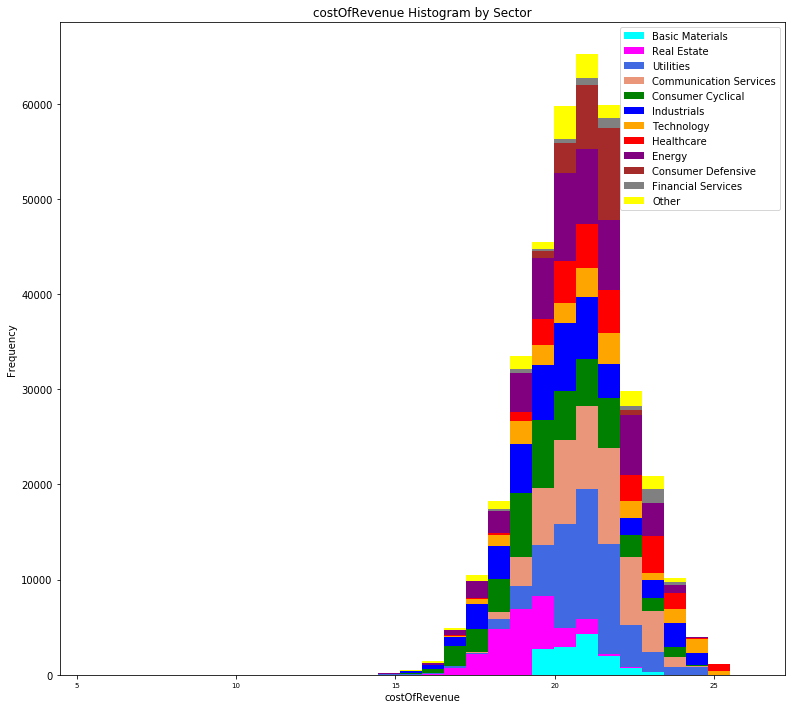

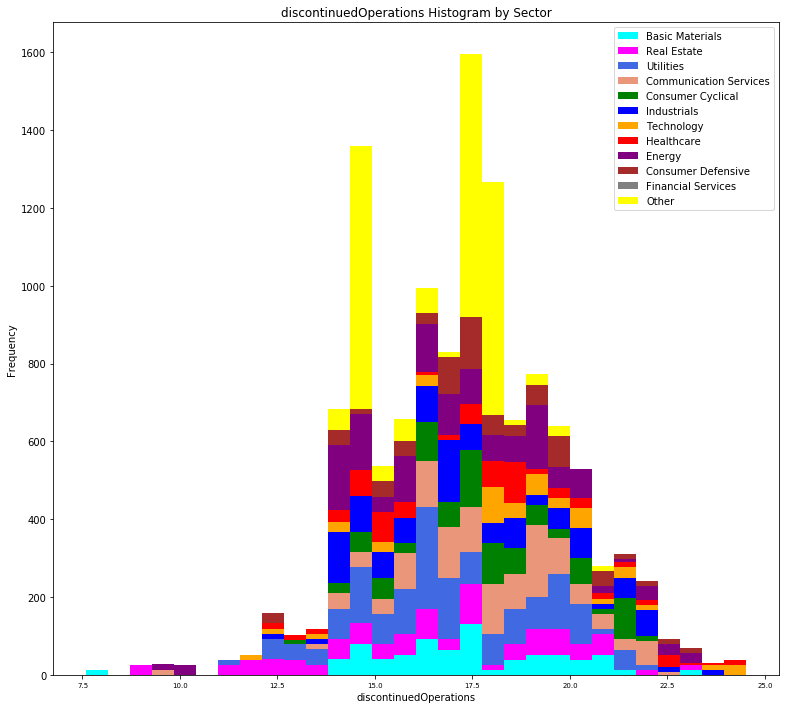

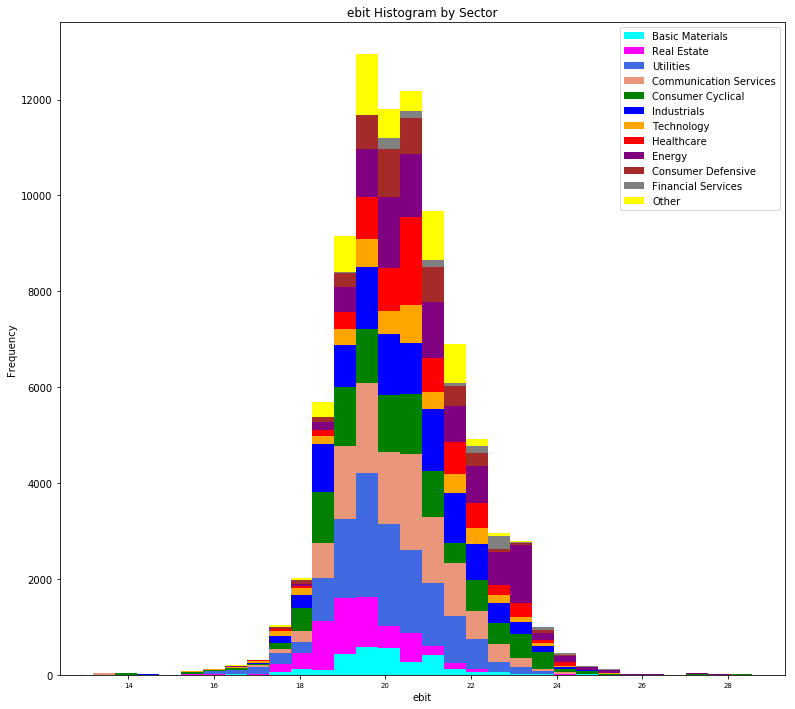

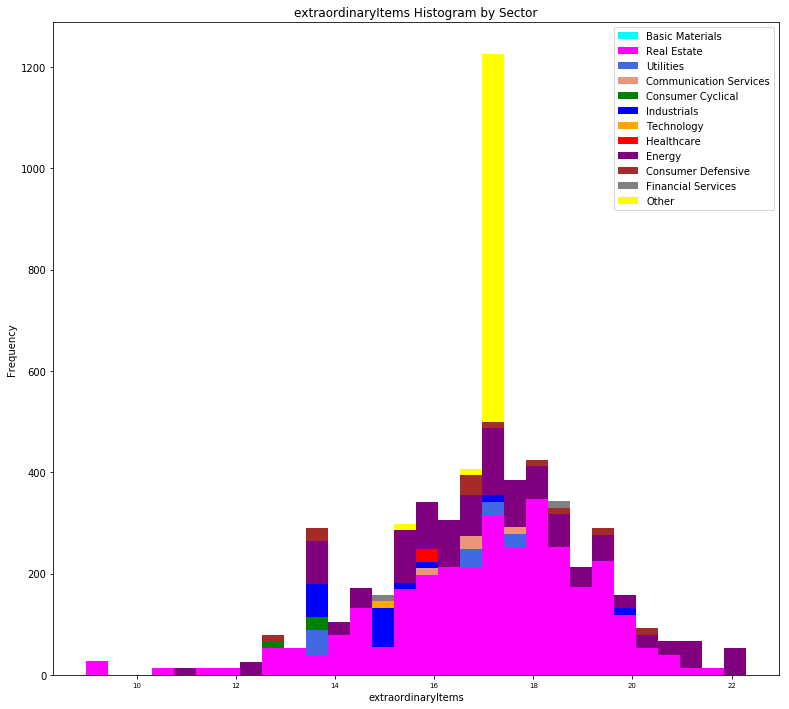

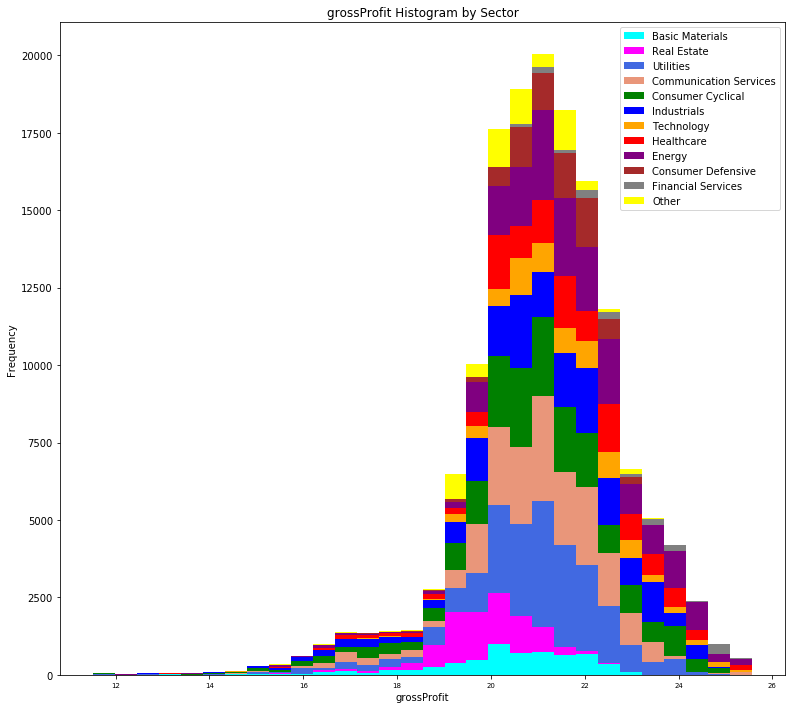

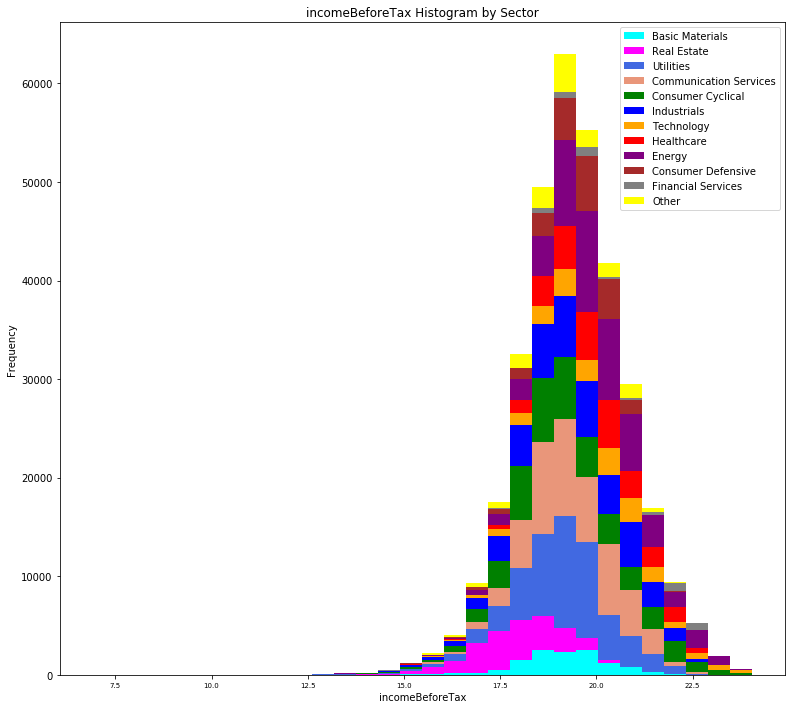

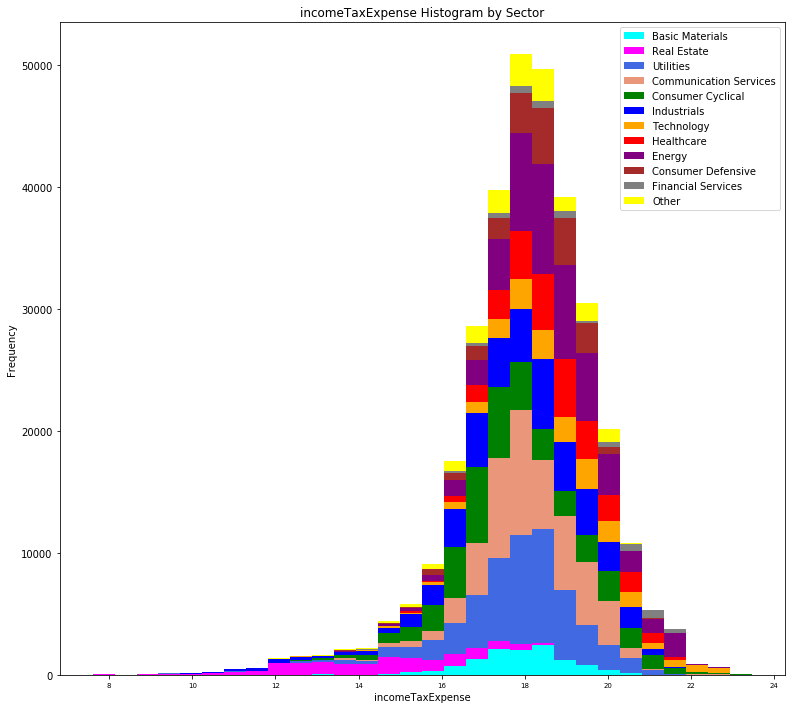

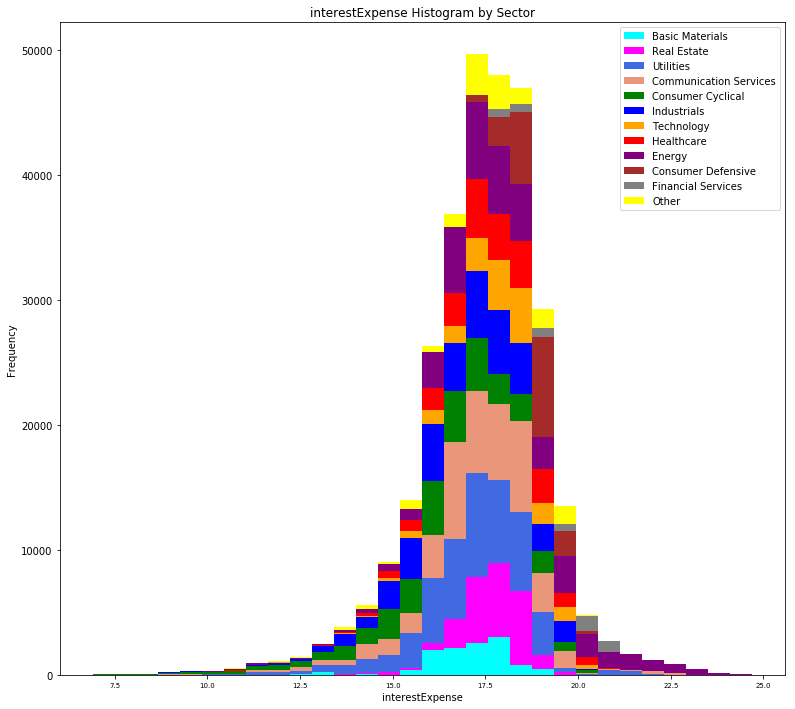

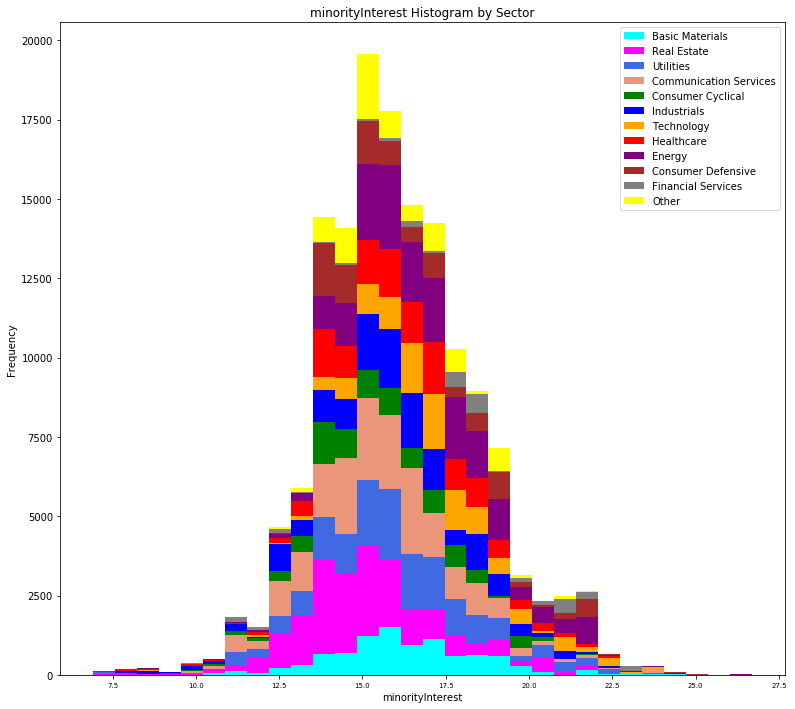

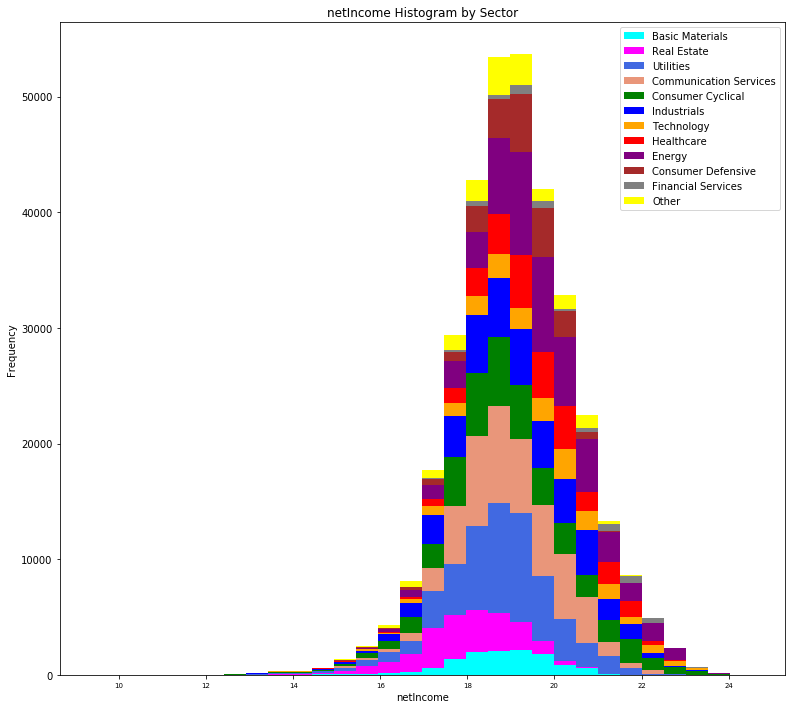

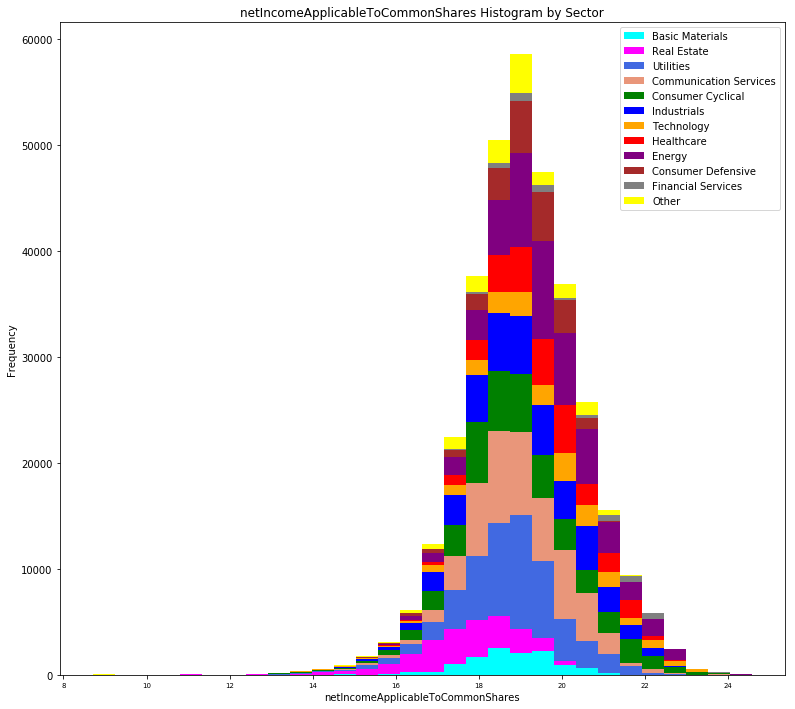

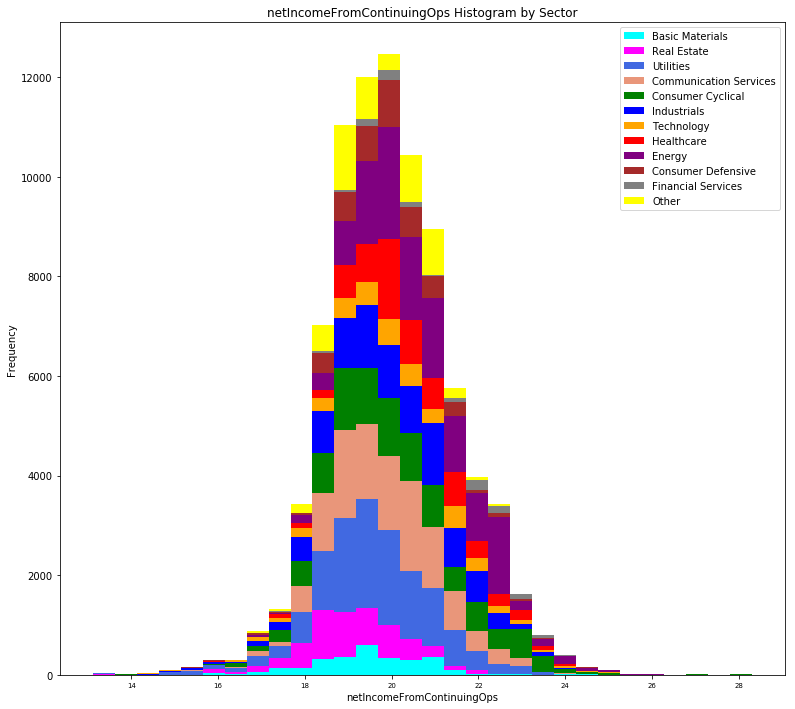

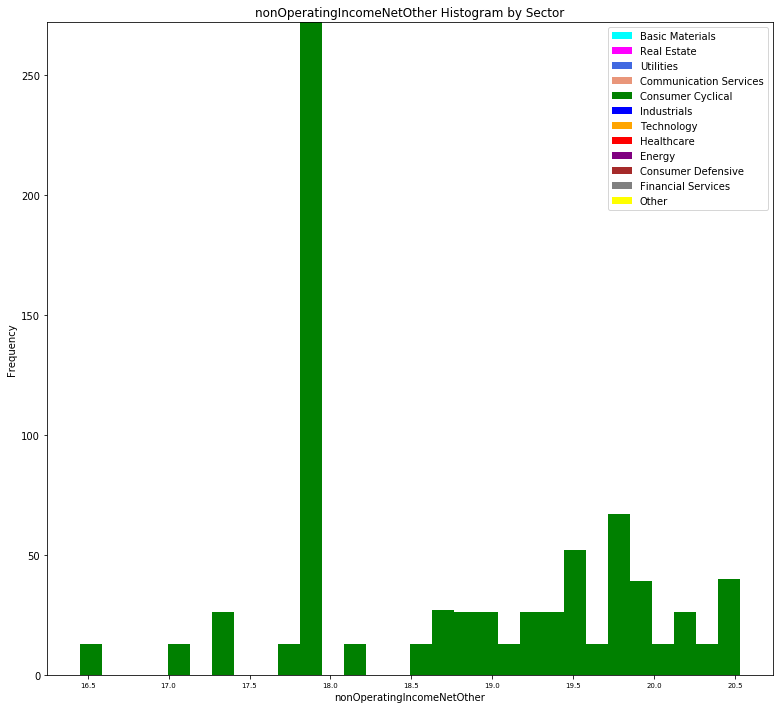

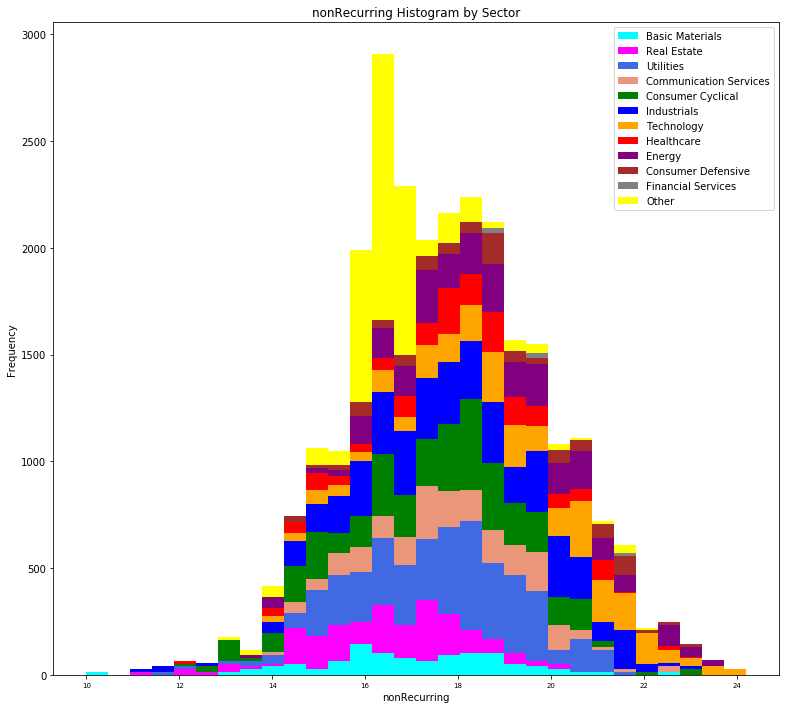

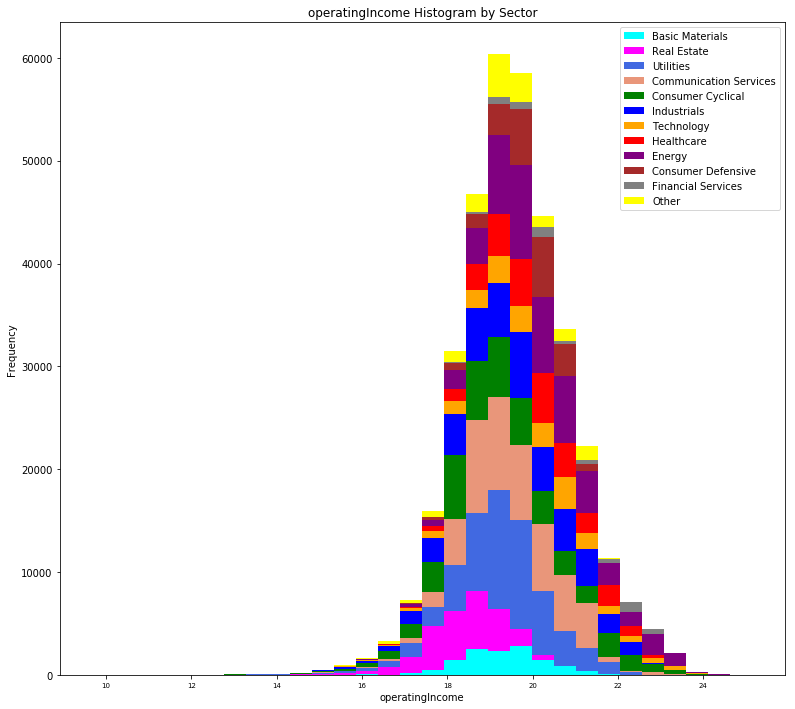

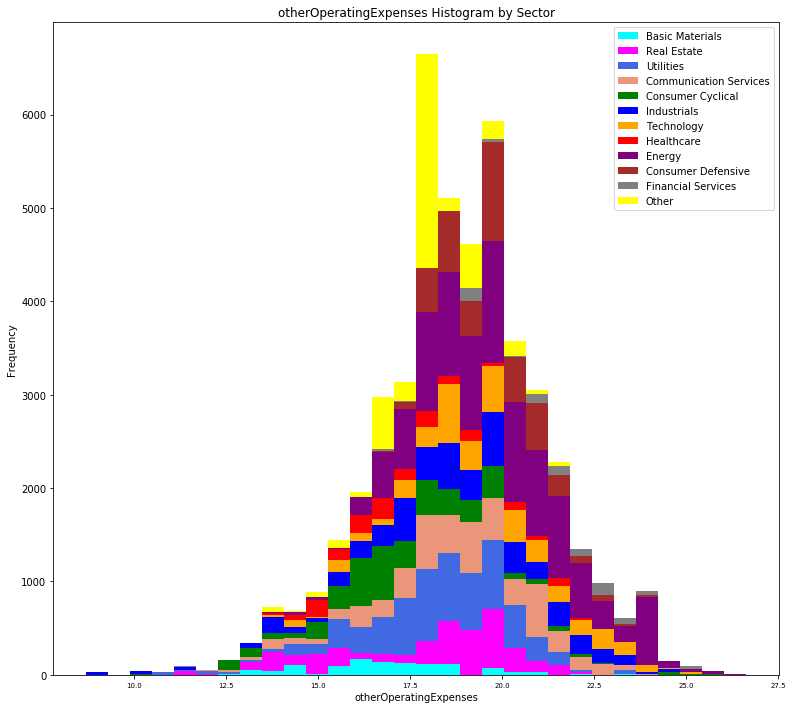

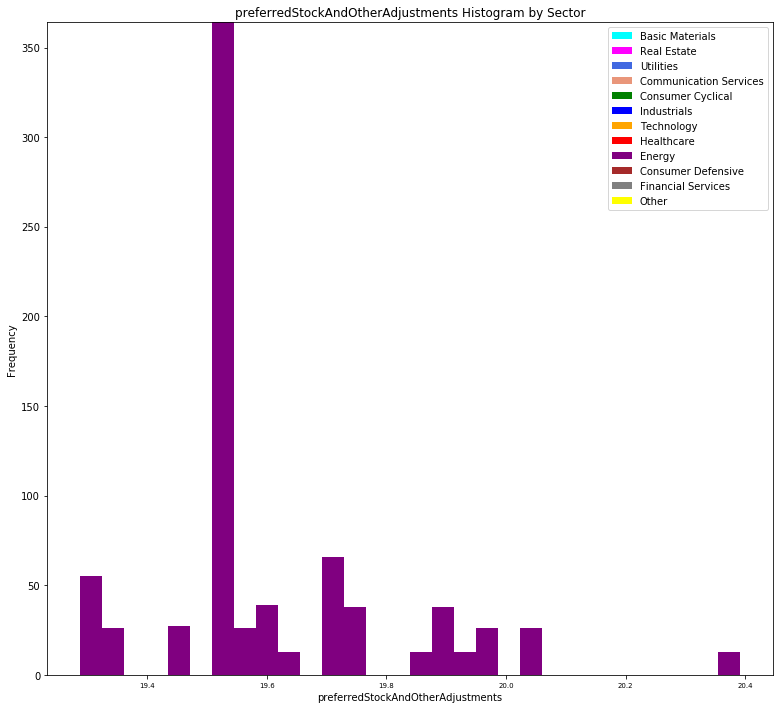

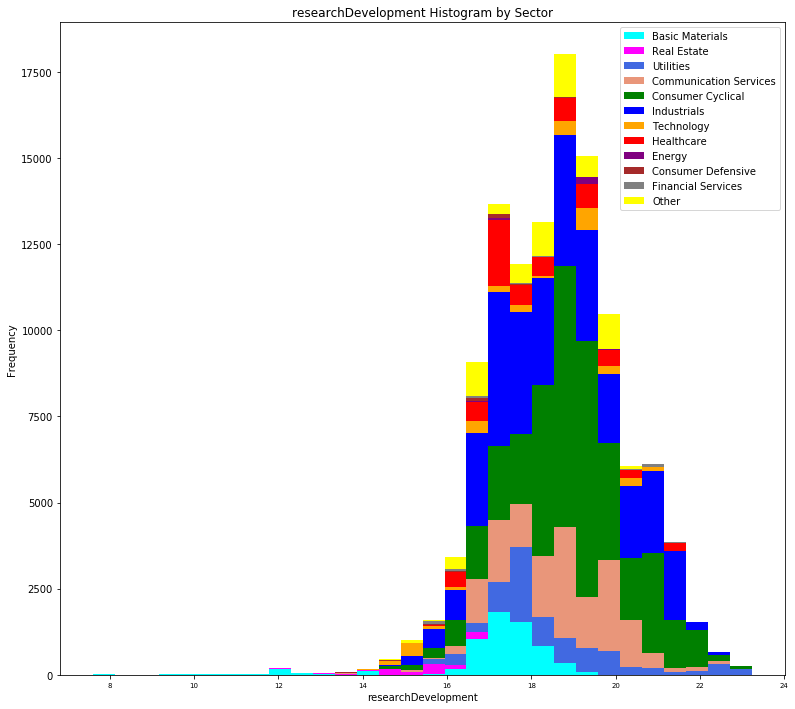

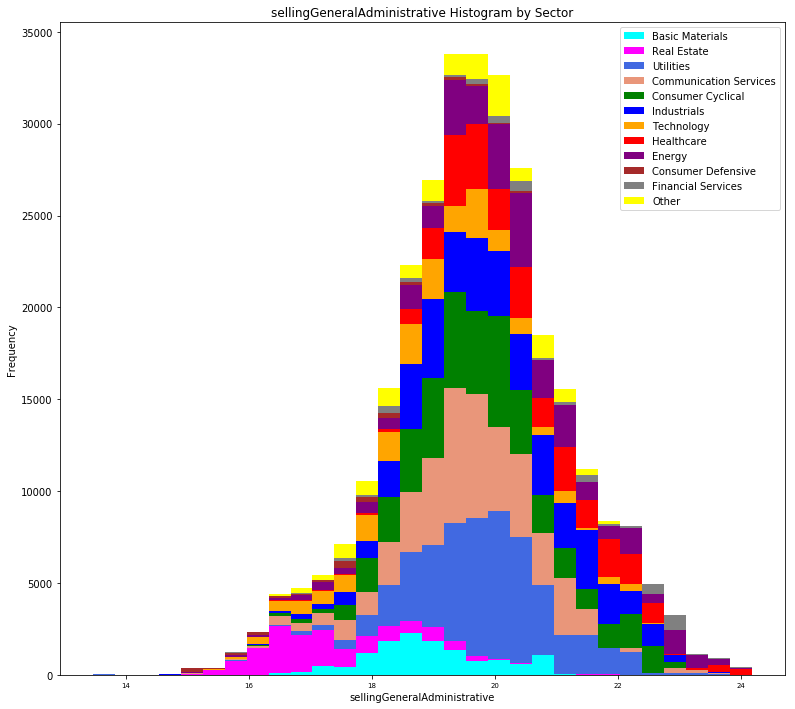

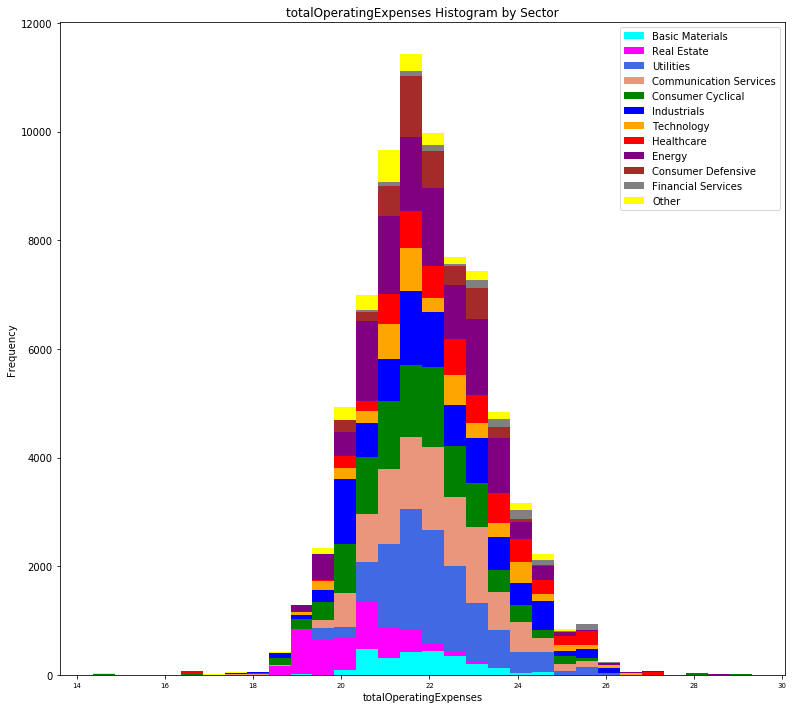

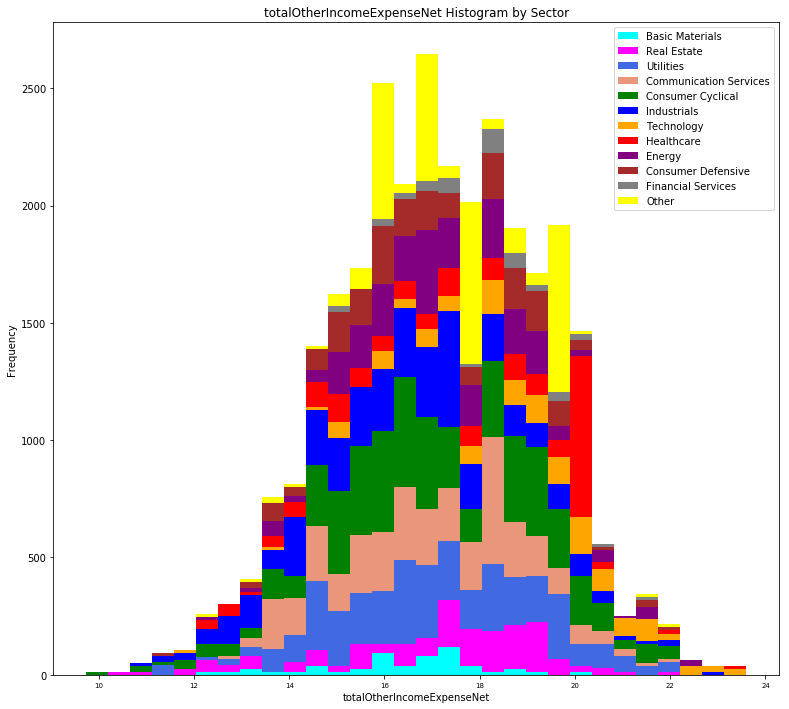

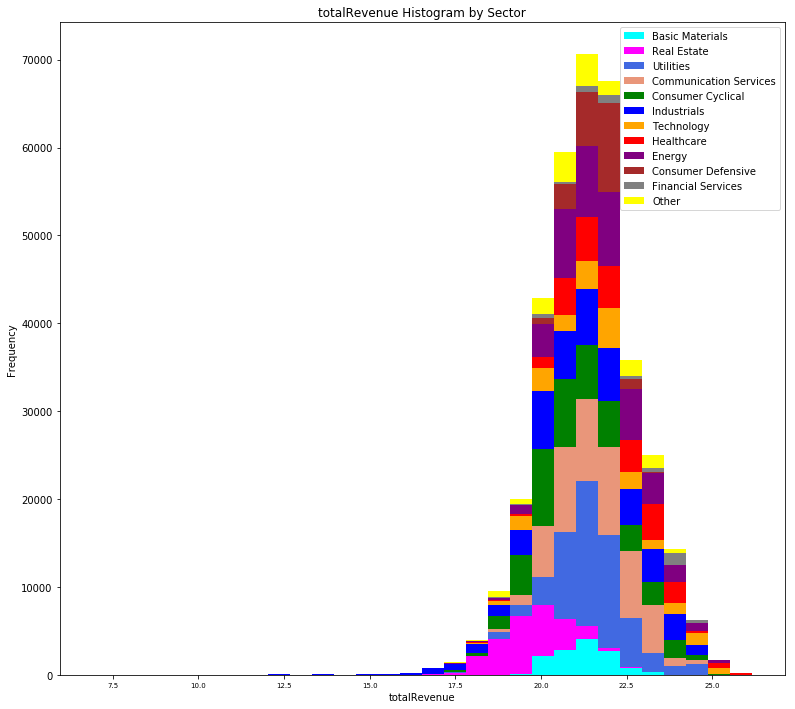

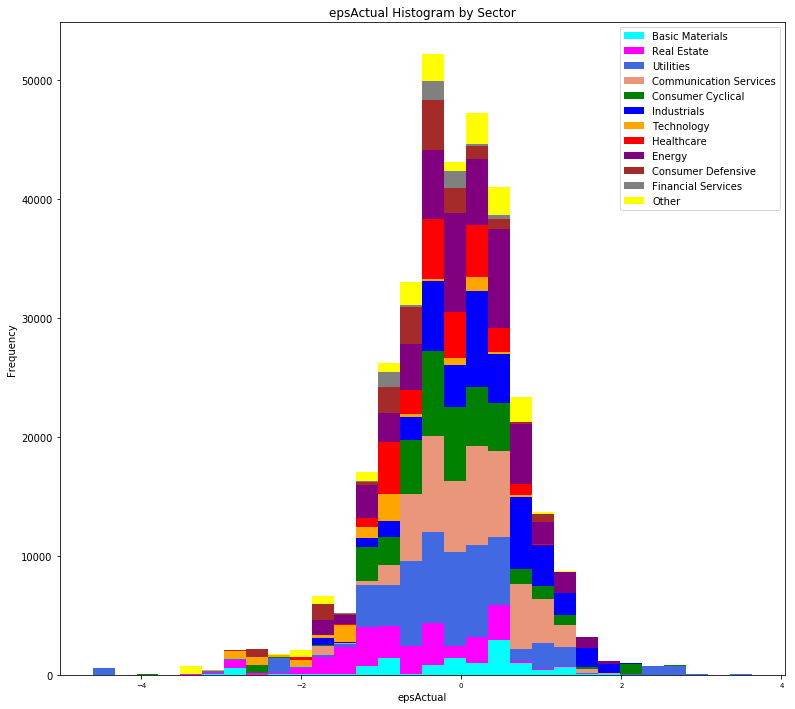

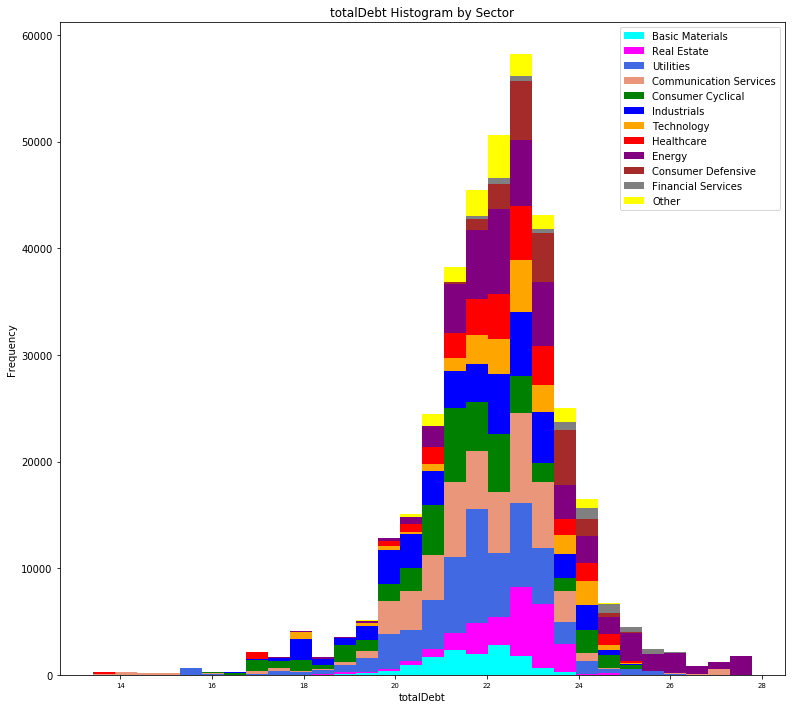

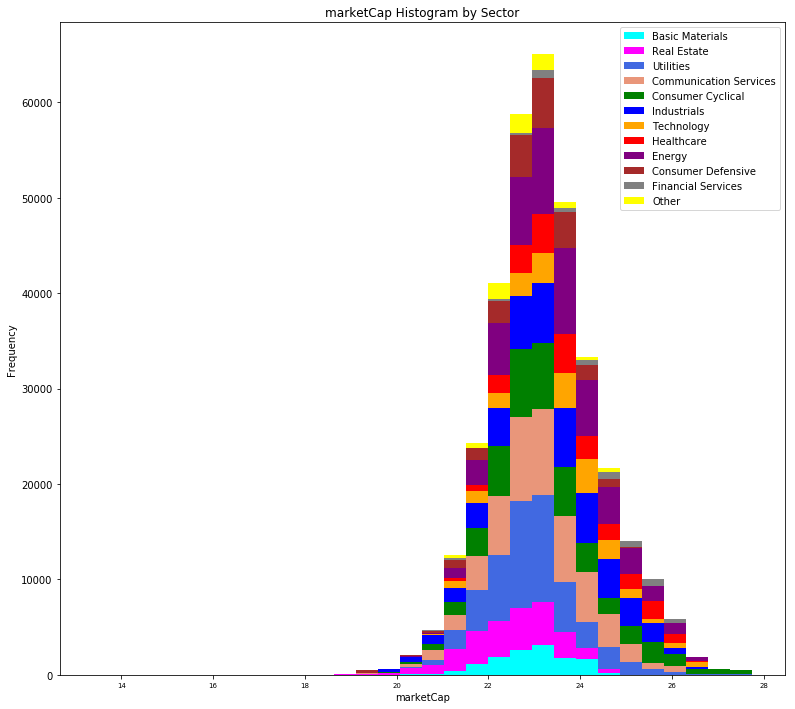

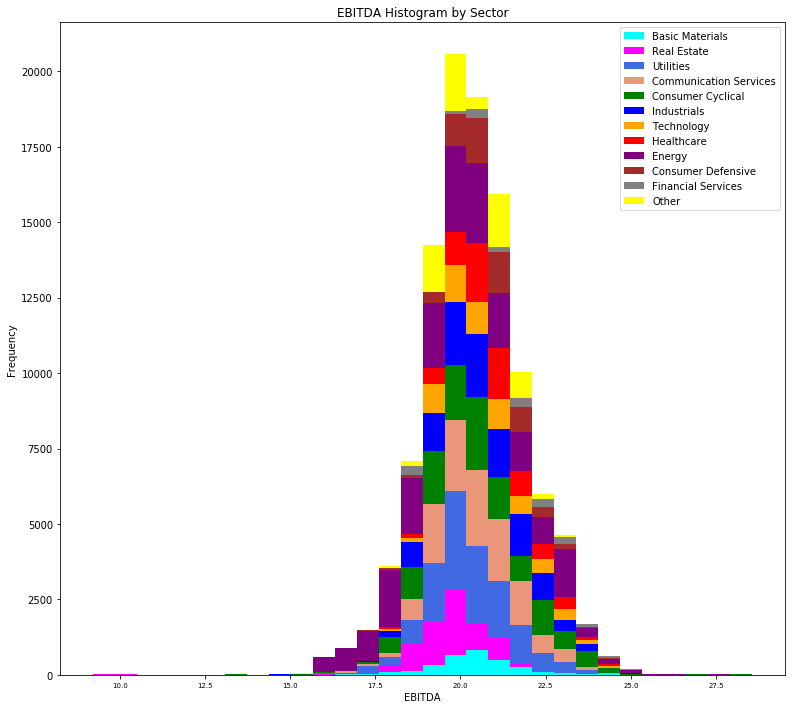

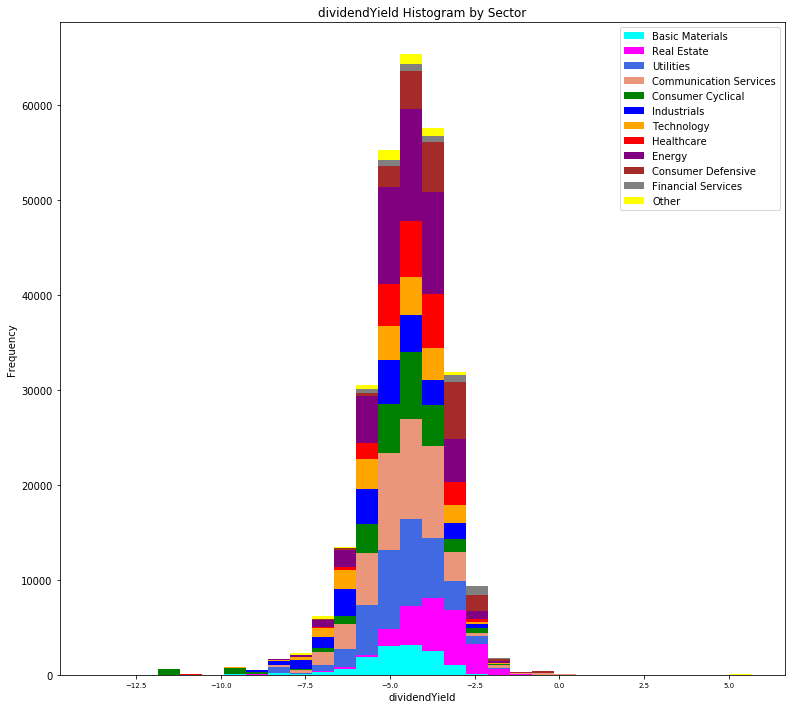

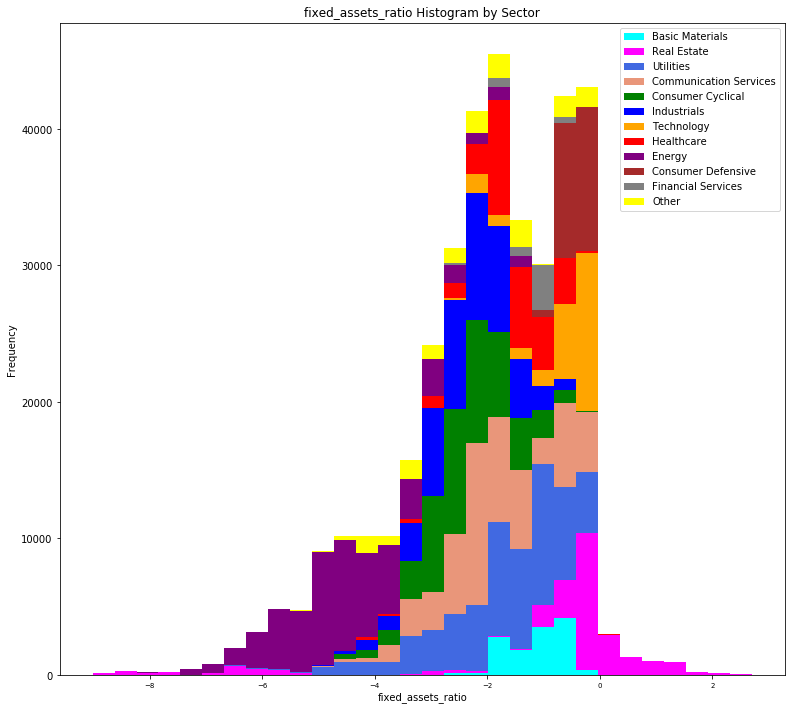

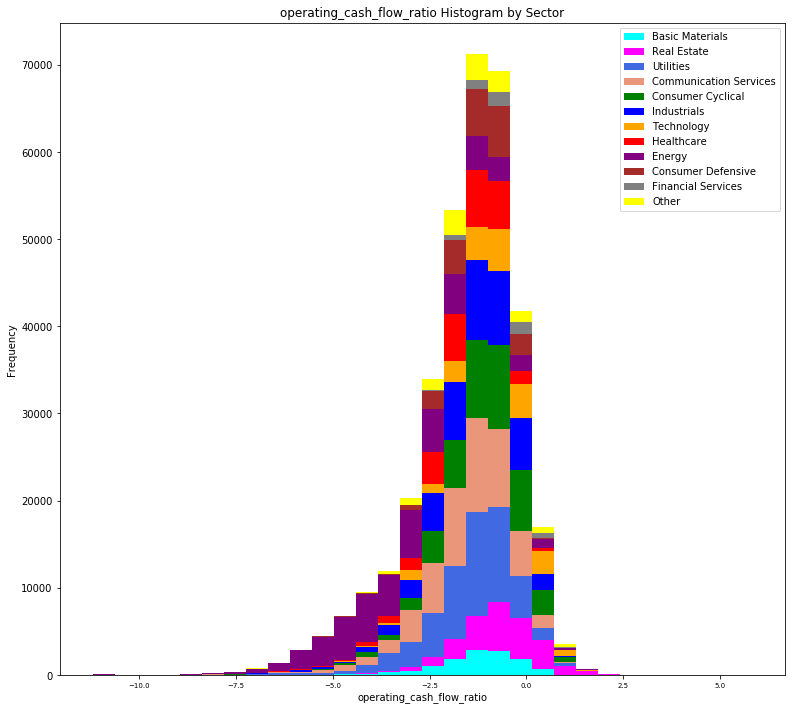

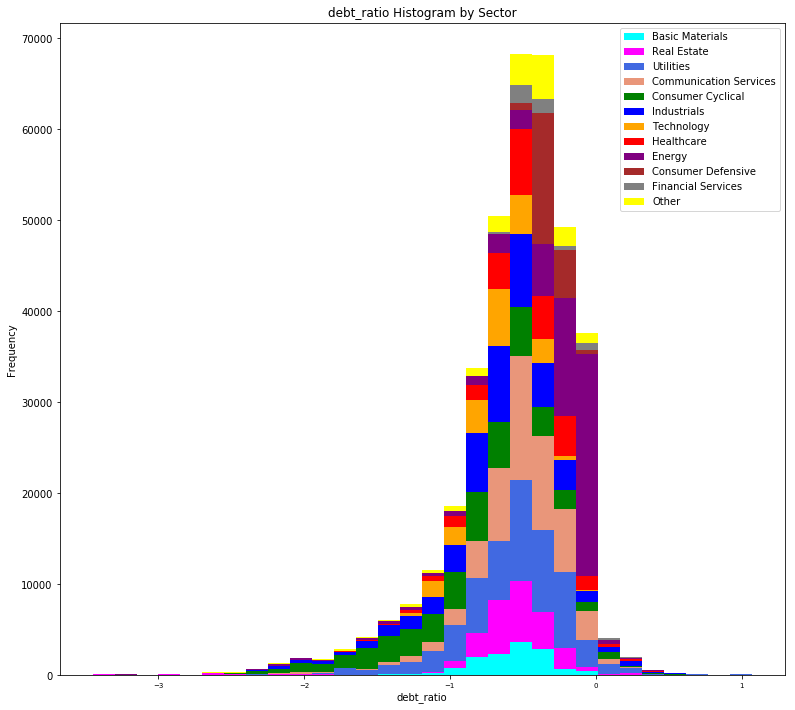

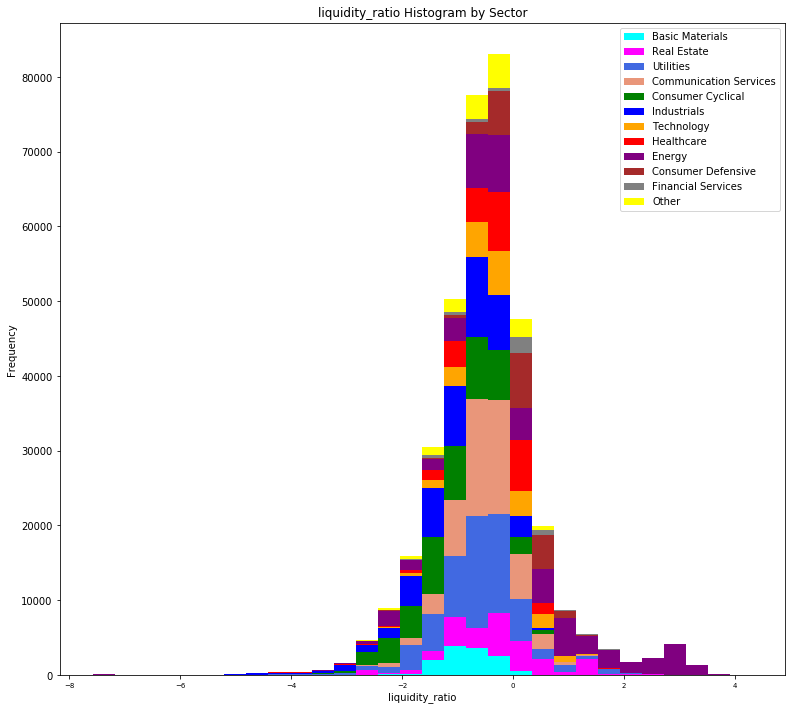

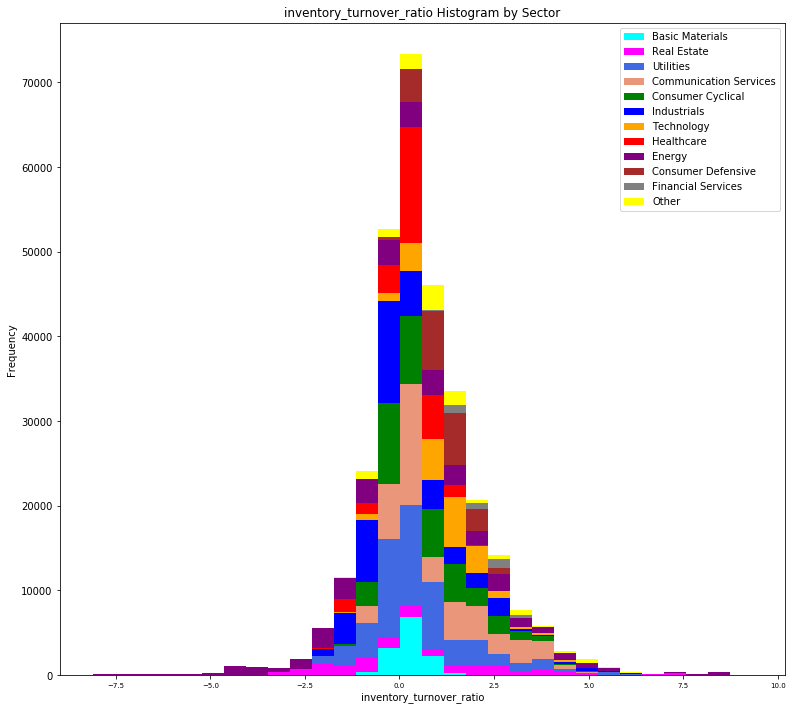

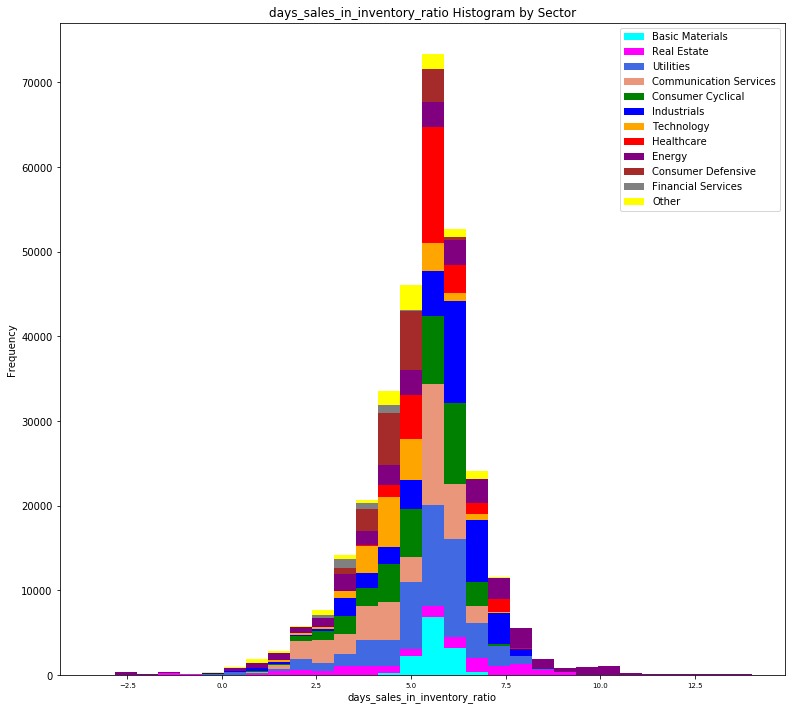

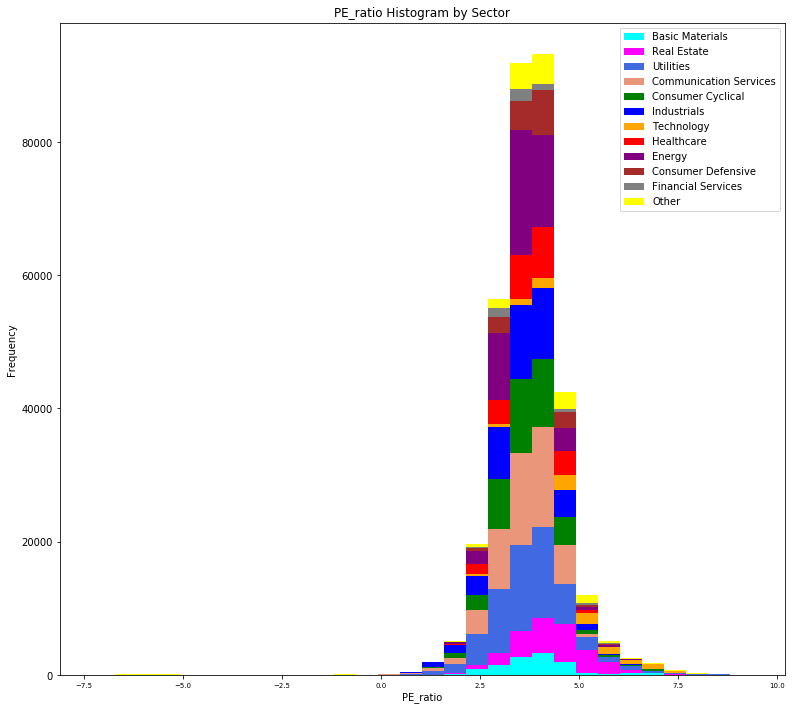

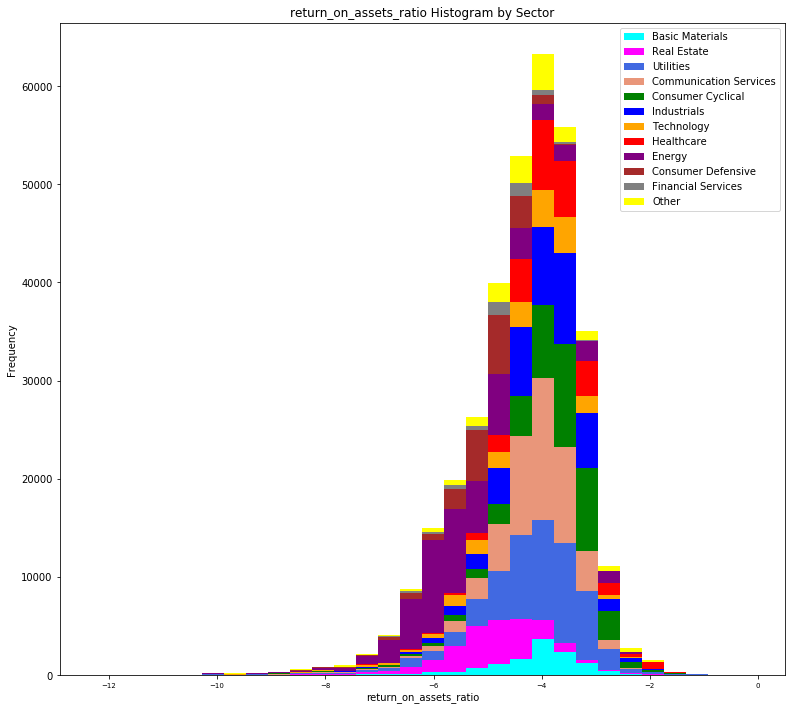

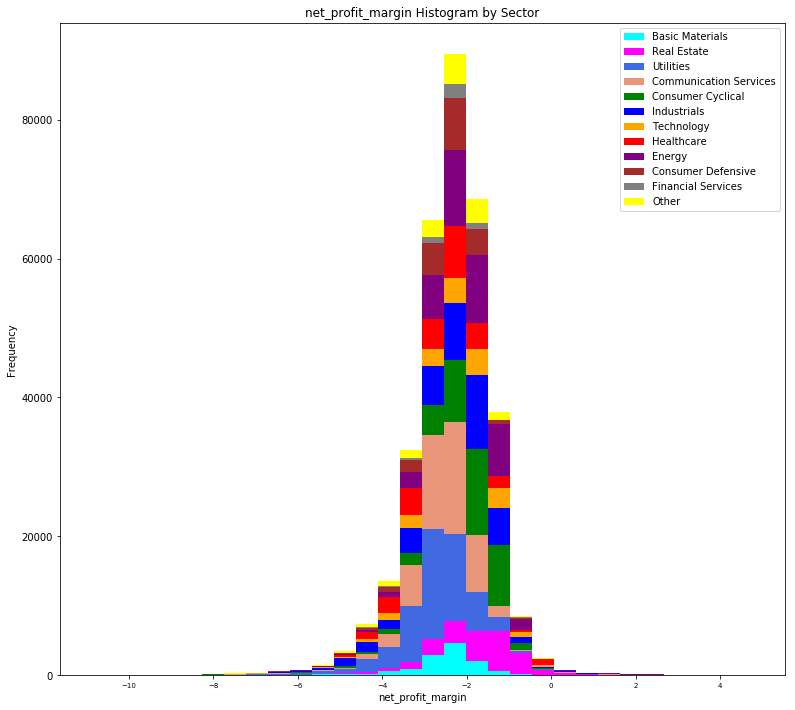

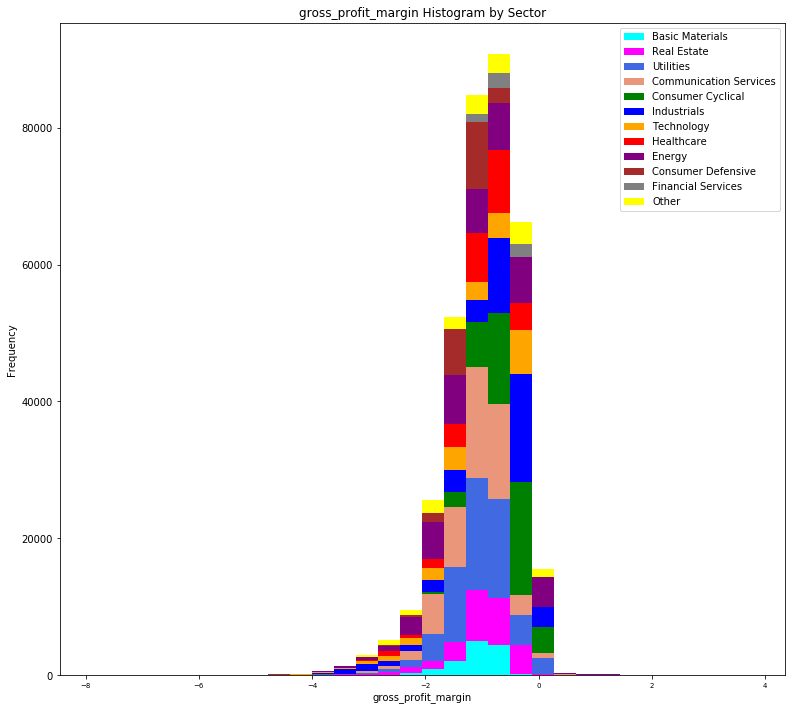

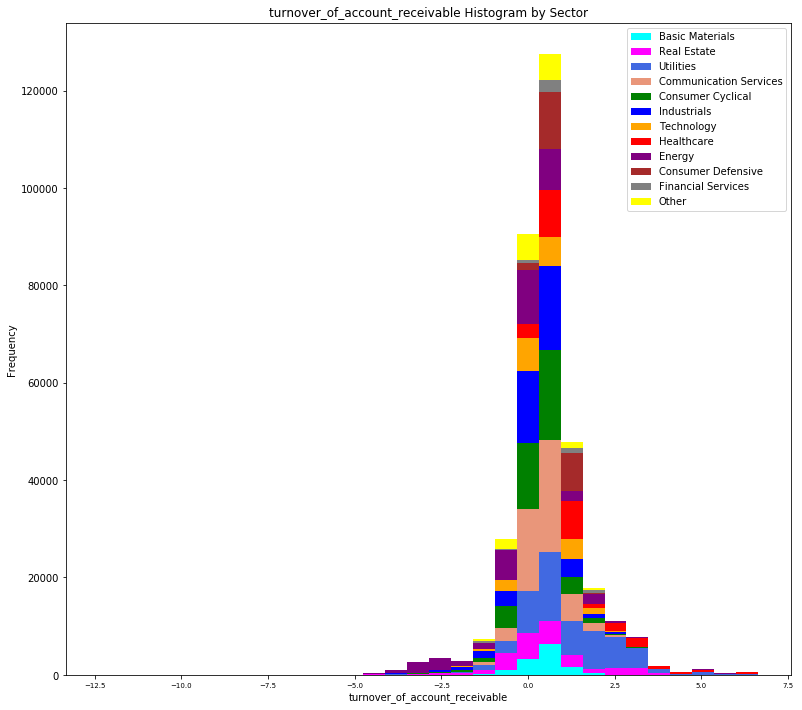

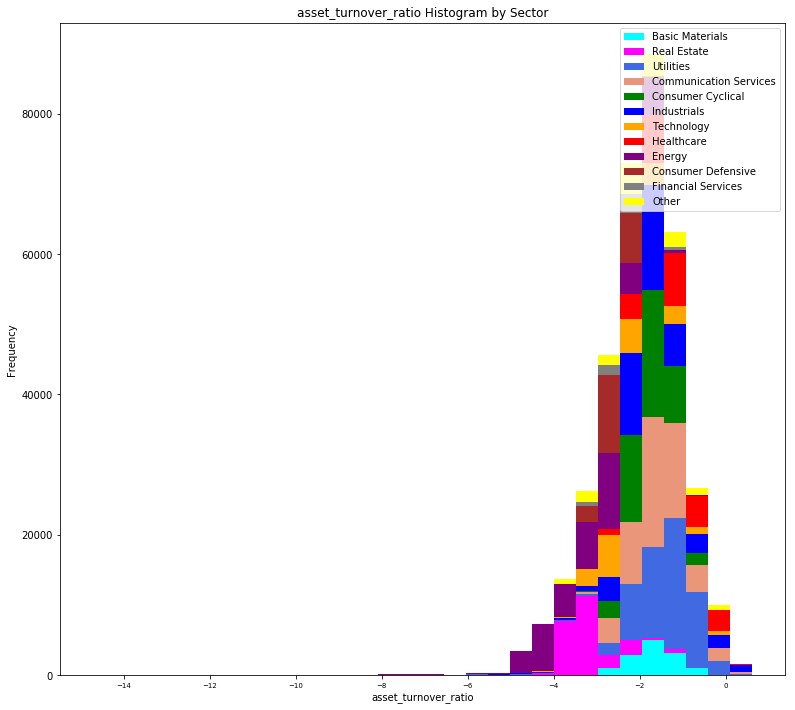

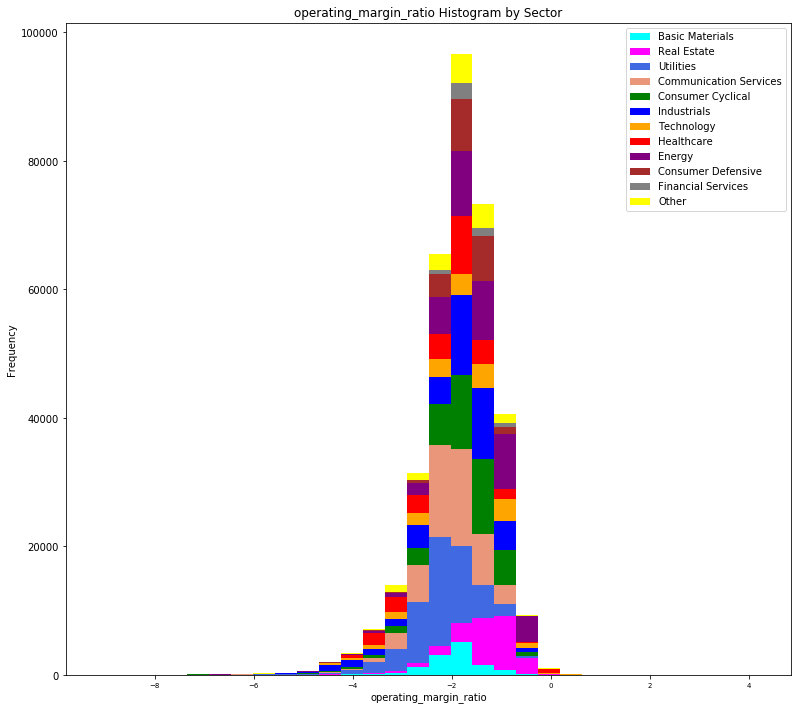

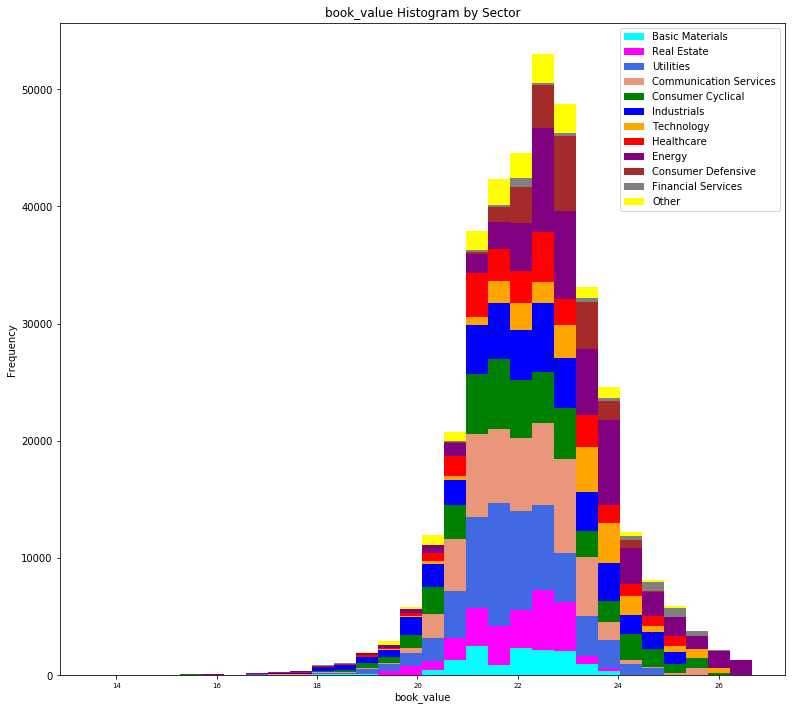

In [20]:
s_graph(list(range(5,112))) 

Here, there are 14 cases of histograms that are not performing well under natural log transformation due to their polarized distribution of values. We could consider to drop them from our study.